In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [2]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [3]:
#Import the data
df  = pd.read_csv('DataCoSupplyChainDataset.csv',encoding='ISO-8859-1')
df.head()

Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     DEBIT                         3                              4   
1  TRANSFER                         5                              4   
2      CASH                         4                              4   
3     DEBIT                         3                              4   
4   PAYMENT                         2                              4   

   Benefit per order  Sales per customer   Delivery Status  \
0          91.250000          314.640015  Advance shipping   
1        -249.089996          311.359985     Late delivery   
2        -247.779999          309.720001  Shipping on time   
3          22.860001          304.809998  Advance shipping   
4         134.210007          298.250000  Advance shipping   

   Late_delivery_risk  Category Id   Category Name Customer City  \
0                   0           73  Sporting Goods        Caguas   
1                   1           73  Sporting Goods        Caguas   
2                   0           73  Sporting Goods      San Jose   
3                   0           73  Sporting Goods   Los Angeles   
4                   0           73  Sporting Goods        Caguas   

  Customer Country Customer Email Customer Fname  Customer Id Customer Lname  \
0      Puerto Rico      XXXXXXXXX          Cally        20755       Holloway   
1      Puerto Rico      XXXXXXXXX          Irene        19492           Luna   
2          EE. UU.      XXXXXXXXX        Gillian        19491      Maldonado   
3          EE. UU.      XXXXXXXXX           Tana        19490           Tate   
4      Puerto Rico      XXXXXXXXX           Orli        19489      Hendricks   

  Customer Password Customer Segment Customer State           Customer Street  \
0         XXXXXXXXX         Consumer             PR  5365 Noble Nectar Island   
1         XXXXXXXXX         Consumer             PR          2679 Rustic Loop   
2         XXXXXXXXX         Consumer             CA      8510 Round Bear Gate   
3         XXXXXXXXX      Home Office             CA           3200 Amber Bend   
4         XXXXXXXXX        Corporate             PR  8671 Iron Anchor Corners   

   Customer Zipcode  Department Id Department Name   Latitude   Longitude  \
0             725.0              2         Fitness  18.251453  -66.037056   
1             725.0              2         Fitness  18.279451  -66.037064   
2           95125.0              2         Fitness  37.292233 -121.881279   
3           90027.0              2         Fitness  34.125946 -118.291016   
4             725.0              2         Fitness  18.253769  -66.037048   

         Market  Order City Order Country  Order Customer Id  \
0  Pacific Asia      Bekasi     Indonesia              20755   
1  Pacific Asia     Bikaner         India              19492   
2  Pacific Asia     Bikaner         India              19491   
3  Pacific Asia  Townsville     Australia              19490   
4  Pacific Asia  Townsville     Australia              19489   

  order date (DateOrders)  Order Id  Order Item Cardprod Id  \
0         1/31/2018 22:56     77202                    1360   
1         1/13/2018 12:27     75939                    1360   
2         1/13/2018 12:06     75938                    1360   
3         1/13/2018 11:45     75937                    1360   
4         1/13/2018 11:24     75936                    1360   

   Order Item Discount  Order Item Discount Rate  Order Item Id  \
0            13.110000                      0.04         180517   
1            16.389999                      0.05         179254   
2            18.030001                      0.06         179253   
3            22.940001                      0.07         179252   
4            29.500000                      0.09         179251   

   Order Item Product Price  Order Item Profit Ratio  Order Item Quantity  \
0                    327.75                     0.29                    1   
1                    327.75             

In [4]:
# Creating a dataframe to summarize the dataset information
data_info = pd.DataFrame({
    "Data Type": df.dtypes,
    "Unique Values": df.nunique(),
    "Missing Values": df.isnull().sum(),
    "Missing Values %": (df.isnull().sum() / len(df)) * 100
})

data_info


Data Type  Unique Values  Missing Values  \
Type                             object              4               0   
Days for shipping (real)          int64              7               0   
Days for shipment (scheduled)     int64              4               0   
Benefit per order               float64          21998               0   
Sales per customer              float64           2927               0   
Delivery Status                  object              4               0   
Late_delivery_risk                int64              2               0   
Category Id                       int64             51               0   
Category Name                    object             50               0   
Customer City                    object            563               0   
Customer Country                 object              2               0   
Customer Email                   object              1               0   
Customer Fname                   object            782               0   
Customer Id                       int64          20652               0   
Customer Lname                   object           1109               8   
Customer Password                object              1               0   
Customer Segment                 object              3               0   
Customer State                   object             46               0   
Customer Street                  object           7458               0   
Customer Zipcode                float64            995               3   
Department Id                     int64             11               0   
Department Name                  object             11               0   
Latitude                        float64          11250               0   
Longitude                       float64           4487               0   
Market                           object              5               0   
Order City                       object           3597               0   
Order Country                    object            164               0   
Order Customer Id                 int64          20652               0   
order date (DateOrders)          object          65752               0   
Order Id                          int64          65752               0   
Order Item Cardprod Id            int64            118               0   
Order Item Discount             float64           1017               0   
Order Item Discount Rate        float64             18               0   
Order Item Id                     int64         180519               0   
Order Item Product Price        float64             75               0   
Order Item Profit Ratio         float64            162               0   
Order Item Quantity               int64              5               0   
Sales                           float64            193               0   
Order Item Total                float64           2927               0   
Order Profit Per Order          float64          21998               0   
Order Region                     object             23               0   
Order State                      object           1089               0   
Order Status                     object              9               0   
Order Zipcode                   float64            609          155679   
Product Card Id                   int64            118               0   
Product Category Id               int64             51               0   
Product Description             float64              0          180519   
Product Image                    object            118               0   
Product Name                     object            118               0   
Product Price                   float64             75               0   
Product Status                    int64              1               0   
shipping date (DateOrders)       object          63701               0   
Shipping Mode                    object              4               0   

                               Mi

Here's a summary of the dataset:

1. **Data Types and Uniqueness:** The dataset comprises various data types like object, int64, and float64. Several columns have a high number of unique values, indicating a wide range of data (e.g., 'Benefit per order' has 21,998 unique values).

2. **Missing Values:** Certain columns have missing values, with 'Order Zipcode' having the highest percentage of missing data (86.24%). 'Product Description' is entirely empty (100% missing values).

3. **Potential Redundancies:** Some columns, like 'Customer Email' and 'Customer Password', have only one unique value, indicating potential redundancy.

4. **Inconsistencies:** There are inconsistencies in columns like 'Customer Lname' and 'Customer Zipcode', which have missing values despite being key customer information.

Based on this summary, we need to carefully handle missing data, consider dropping columns with no variation or high percentages of missing values, and ensure proper data type conversion where necessary.

In [5]:
# Removing columns with 0 or 1 unique values and specific customer-related columns
columns_to_drop = data_info[data_info['Unique Values'] <= 1].index.tolist()
columns_to_drop.extend(['Customer Email', 'Customer Fname', 'Customer Lname', 'Customer Password', 'Customer Street','Customer Zipcode','Product Image','Order Zipcode' ])

# Dropping the columns from the dataframe
df = df.drop(columns=columns_to_drop)

# Display the first few rows of the modified dataframe
df.head()


Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     DEBIT                         3                              4   
1  TRANSFER                         5                              4   
2      CASH                         4                              4   
3     DEBIT                         3                              4   
4   PAYMENT                         2                              4   

   Benefit per order  Sales per customer   Delivery Status  \
0          91.250000          314.640015  Advance shipping   
1        -249.089996          311.359985     Late delivery   
2        -247.779999          309.720001  Shipping on time   
3          22.860001          304.809998  Advance shipping   
4         134.210007          298.250000  Advance shipping   

   Late_delivery_risk  Category Id   Category Name Customer City  \
0                   0           73  Sporting Goods        Caguas   
1                   1           73  Sporting Goods        Caguas   
2                   0           73  Sporting Goods      San Jose   
3                   0           73  Sporting Goods   Los Angeles   
4                   0           73  Sporting Goods        Caguas   

  Customer Country  Customer Id Customer Segment Customer State  \
0      Puerto Rico        20755         Consumer             PR   
1      Puerto Rico        19492         Consumer             PR   
2          EE. UU.        19491         Consumer             CA   
3          EE. UU.        19490      Home Office             CA   
4      Puerto Rico        19489        Corporate             PR   

   Department Id Department Name   Latitude   Longitude        Market  \
0              2         Fitness  18.251453  -66.037056  Pacific Asia   
1              2         Fitness  18.279451  -66.037064  Pacific Asia   
2              2         Fitness  37.292233 -121.881279  Pacific Asia   
3              2         Fitness  34.125946 -118.291016  Pacific Asia   
4              2         Fitness  18.253769  -66.037048  Pacific Asia   

   Order City Order Country  Order Customer Id order date (DateOrders)  \
0      Bekasi     Indonesia              20755         1/31/2018 22:56   
1     Bikaner         India              19492         1/13/2018 12:27   
2     Bikaner         India              19491         1/13/2018 12:06   
3  Townsville     Australia              19490         1/13/2018 11:45   
4  Townsville     Australia              19489         1/13/2018 11:24   

   Order Id  Order Item Cardprod Id  Order Item Discount  \
0     77202                    1360            13.110000   
1     75939                    1360            16.389999   
2     75938                    1360            18.030001   
3     75937                    1360            22.940001   
4     75936                    1360            29.500000   

   Order Item Discount Rate  Order Item Id  Order Item Product Price  \
0                      0.04         180517                    327.75   
1                      0.05         179254                    327.75   
2                      0.06         179253                    327.75   
3                      0.07         179252                    327.75   
4                      0.09         179251                    327.75   

   Order Item Profit Ratio  Order Item Quantity   Sales  Order Item Total  \
0                     0.29                    1  327.75        314.640015   
1                    -0.80                    1  327.75        311.359985   
2                    -0.80                    1  327.75        309.720001   
3                     0.08                    1  327.75        304.809998   
4                     0.45                    1  327.75        298.250000   

   Order Profit Per Order    Order Region      Order State     Order Status  \
0               91.250000  Southeast Asia  Java Occidental         COMPLETE   
1             -249.089996      South Asia         Rajastán          PENDING   
2          

The dataset has been updated with the following modifications:

1. **Columns Removed:** Columns with 0 or 1 unique values, as well as specific customer-related columns like 'Customer Email', 'Customer Fname', 'Customer Lname', 'Customer Password', and 'Customer Street','Customer Zipcode' have been removed. This helps to streamline the dataset by eliminating redundant or unnecessary information.

2. **Reduced Column Count:** The dataset now consists of 46 columns, reduced from the original count. This should make the dataset more manageable and relevant for further analysis or modeling.

3. **Preserved Essential Information:** Key columns related to shipping, sales, product details, and order information have been retained, ensuring that crucial aspects of the supply chain data are still available for analysis.

4. **Data Integrity Maintained:** The removal of these columns should not affect the integrity of the remaining data, allowing for accurate analysis or predictive modeling

Next steps in preprocessing could include further handling of missing values and check if any further columns can be removed.

In [6]:
# Rounding all float variables to 2 decimal places except for Latitude and Longitude
float_columns = df.select_dtypes(include=['float64']).columns
float_columns = [col for col in float_columns if col not in ['Latitude', 'Longitude']]

df[float_columns] = df[float_columns].round(2)

# Display the first few rows of the modified dataframe
df.head()


Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     DEBIT                         3                              4   
1  TRANSFER                         5                              4   
2      CASH                         4                              4   
3     DEBIT                         3                              4   
4   PAYMENT                         2                              4   

   Benefit per order  Sales per customer   Delivery Status  \
0              91.25              314.64  Advance shipping   
1            -249.09              311.36     Late delivery   
2            -247.78              309.72  Shipping on time   
3              22.86              304.81  Advance shipping   
4             134.21              298.25  Advance shipping   

   Late_delivery_risk  Category Id   Category Name Customer City  \
0                   0           73  Sporting Goods        Caguas   
1                   1           73  Sporting Goods        Caguas   
2                   0           73  Sporting Goods      San Jose   
3                   0           73  Sporting Goods   Los Angeles   
4                   0           73  Sporting Goods        Caguas   

  Customer Country  Customer Id Customer Segment Customer State  \
0      Puerto Rico        20755         Consumer             PR   
1      Puerto Rico        19492         Consumer             PR   
2          EE. UU.        19491         Consumer             CA   
3          EE. UU.        19490      Home Office             CA   
4      Puerto Rico        19489        Corporate             PR   

   Department Id Department Name   Latitude   Longitude        Market  \
0              2         Fitness  18.251453  -66.037056  Pacific Asia   
1              2         Fitness  18.279451  -66.037064  Pacific Asia   
2              2         Fitness  37.292233 -121.881279  Pacific Asia   
3              2         Fitness  34.125946 -118.291016  Pacific Asia   
4              2         Fitness  18.253769  -66.037048  Pacific Asia   

   Order City Order Country  Order Customer Id order date (DateOrders)  \
0      Bekasi     Indonesia              20755         1/31/2018 22:56   
1     Bikaner         India              19492         1/13/2018 12:27   
2     Bikaner         India              19491         1/13/2018 12:06   
3  Townsville     Australia              19490         1/13/2018 11:45   
4  Townsville     Australia              19489         1/13/2018 11:24   

   Order Id  Order Item Cardprod Id  Order Item Discount  \
0     77202                    1360                13.11   
1     75939                    1360                16.39   
2     75938                    1360                18.03   
3     75937                    1360                22.94   
4     75936                    1360                29.50   

   Order Item Discount Rate  Order Item Id  Order Item Product Price  \
0                      0.04         180517                    327.75   
1                      0.05         179254                    327.75   
2                      0.06         179253                    327.75   
3                      0.07         179252                    327.75   
4                      0.09         179251                    327.75   

   Order Item Profit Ratio  Order Item Quantity   Sales  Order Item Total  \
0                     0.29                    1  327.75            314.64   
1                    -0.80                    1  327.75            311.36   
2                    -0.80                    1  327.75            309.72   
3                     0.08                    1  327.75            304.81   
4                     0.45                    1  327.75            298.25   

   Order Profit Per Order    Order Region      Order State     Order Status  \
0                   91.25  Southeast Asia  Java Occidental         COMPLETE   
1                 -249.09      South Asia         Rajastán          PENDING   
2          

In [7]:
# Replace '/' with '-' in 'order date (DateOrders)' and 'shipping date (DateOrders)'
df['order date (DateOrders)'] = df['order date (DateOrders)'].str.replace('/', '-')
df['shipping date (DateOrders)'] = df['shipping date (DateOrders)'].str.replace('/', '-')

# Converting 'order date (DateOrders)' and 'shipping date (DateOrders)' to datetime format
df['order date (DateOrders)'] = pd.to_datetime(df['order date (DateOrders)'], format="%m-%d-%Y %H:%M")
df['shipping date (DateOrders)'] = pd.to_datetime(df['shipping date (DateOrders)'], format="%m-%d-%Y %H:%M")

# Extracting date and time for 'order date (DateOrders)'
df['Order Date'] = df['order date (DateOrders)'].dt.date
df['Order Time'] = df['order date (DateOrders)'].dt.time

# Extracting date and time for 'shipping date (DateOrders)'
df['Shipping Date'] = df['shipping date (DateOrders)'].dt.date
df['Shipping Time'] = df['shipping date (DateOrders)'].dt.time

# Remove the original datetime columns
df = df.drop(columns=['order date (DateOrders)', 'shipping date (DateOrders)'])

# Display the first few rows of the modified dataframe
df.head()


Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     DEBIT                         3                              4   
1  TRANSFER                         5                              4   
2      CASH                         4                              4   
3     DEBIT                         3                              4   
4   PAYMENT                         2                              4   

   Benefit per order  Sales per customer   Delivery Status  \
0              91.25              314.64  Advance shipping   
1            -249.09              311.36     Late delivery   
2            -247.78              309.72  Shipping on time   
3              22.86              304.81  Advance shipping   
4             134.21              298.25  Advance shipping   

   Late_delivery_risk  Category Id   Category Name Customer City  \
0                   0           73  Sporting Goods        Caguas   
1                   1           73  Sporting Goods        Caguas   
2                   0           73  Sporting Goods      San Jose   
3                   0           73  Sporting Goods   Los Angeles   
4                   0           73  Sporting Goods        Caguas   

  Customer Country  Customer Id Customer Segment Customer State  \
0      Puerto Rico        20755         Consumer             PR   
1      Puerto Rico        19492         Consumer             PR   
2          EE. UU.        19491         Consumer             CA   
3          EE. UU.        19490      Home Office             CA   
4      Puerto Rico        19489        Corporate             PR   

   Department Id Department Name   Latitude   Longitude        Market  \
0              2         Fitness  18.251453  -66.037056  Pacific Asia   
1              2         Fitness  18.279451  -66.037064  Pacific Asia   
2              2         Fitness  37.292233 -121.881279  Pacific Asia   
3              2         Fitness  34.125946 -118.291016  Pacific Asia   
4              2         Fitness  18.253769  -66.037048  Pacific Asia   

   Order City Order Country  Order Customer Id  Order Id  \
0      Bekasi     Indonesia              20755     77202   
1     Bikaner         India              19492     75939   
2     Bikaner         India              19491     75938   
3  Townsville     Australia              19490     75937   
4  Townsville     Australia              19489     75936   

   Order Item Cardprod Id  Order Item Discount  Order Item Discount Rate  \
0                    1360                13.11                      0.04   
1                    1360                16.39                      0.05   
2                    1360                18.03                      0.06   
3                    1360                22.94                      0.07   
4                    1360                29.50                      0.09   

   Order Item Id  Order Item Product Price  Order Item Profit Ratio  \
0         180517                    327.75                     0.29   
1         179254                    327.75                    -0.80   
2         179253                    327.75                    -0.80   
3         179252                    327.75                     0.08   
4         179251                    327.75                     0.45   

   Order Item Quantity   Sales  Order Item Total  Order Profit Per Order  \
0                    1  327.75            314.64                   91.25   
1                    1  327.75            311.36                 -249.09   
2                    1  327.75            309.72                 -247.78   
3                    1  327.75            304.81                   22.86   
4                    1  327.75            298.25                  134.21   

     Order Region      Order State     Order Status  Product Card Id  \
0  Southeast Asia  Java Occidental         COMPLETE             1360   
1      South Asia         Rajastán          PENDING             1360   
2      South Asia         Rajast

By converting the original datetime columns to separate date and time components, we aim to enhance the dataset's granularity and facilitate more in-depth analysis. Reordering the columns ensures the information remains organized, while removing the redundant original datetime columns streamlines the dataset, making it more suitable for analysis

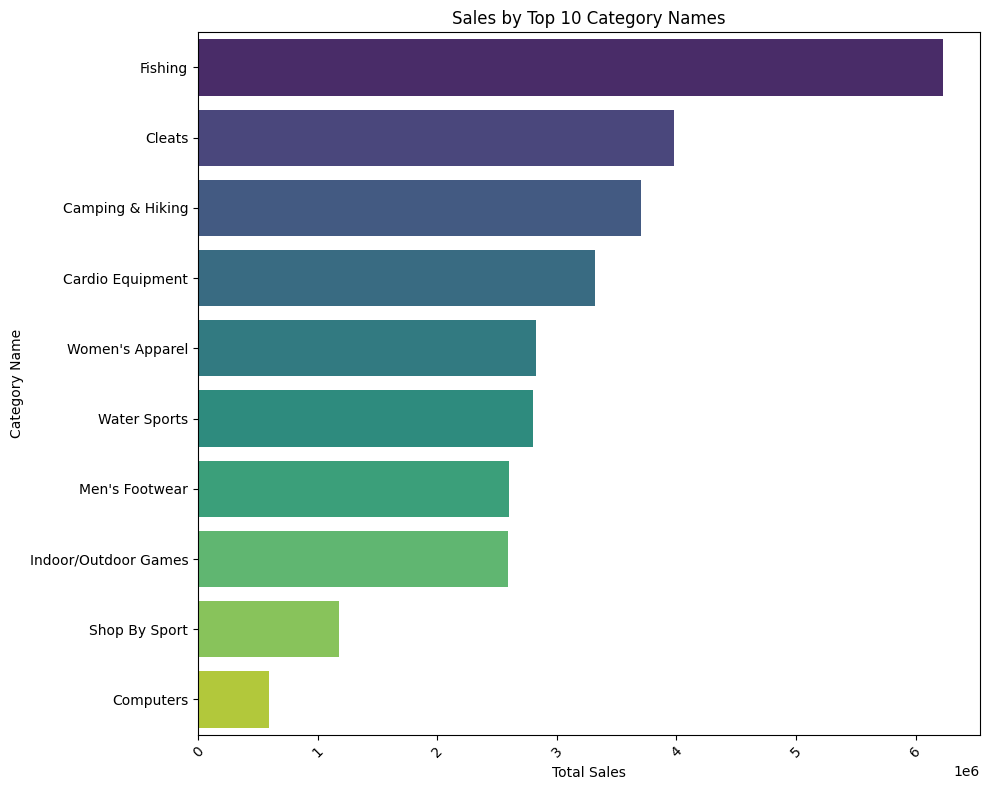

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate sales per customer by category name
sales_by_category = df.groupby('Category Name')['Sales per customer'].sum().sort_values(ascending=False)

# Select the top 10 categories
top_10_categories = sales_by_category.head(10)

# Create a bar chart for the top 10 categories
plt.figure(figsize=(10, 8))
sns.barplot(x=top_10_categories.values, y=top_10_categories.index, palette='viridis')
plt.title('Sales by Top 10 Category Names')
plt.xlabel('Total Sales')
plt.ylabel('Category Name')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()



### Interpretation of Data in the Graph
The graph illustrates a clear hierarchy in sales performance across different categories, with certain categories dominating in terms of sales volume. This suggests that customer preferences are concentrated in specific areas, possibly due to trends, product quality, or marketing effectiveness.

### Business Implications
1. **Focus Areas for Inventory and Marketing**: Categories with higher sales should be prioritized for inventory stocking and marketing campaigns. This focus could help in capitalizing on existing customer preferences and trends.
2. **Potential for Diversification**: Categories with lower sales present opportunities for analysis. Understanding why these categories underperform—whether due to lack of awareness, insufficient stock variety, or other reasons—can inform strategies to boost their sales.

### Recommendations
1. **Enhance Marketing and Promotions**: For high-performing categories, consider increasing marketing efforts and promotional activities to maximize sales potential. This could include online advertising, in-store displays, or seasonal sales.
2. **Market Research for Underperforming Categories**: Conduct market research to understand the barriers to higher sales in underperforming categories. Customer feedback, competitive analysis, and sales data can guide product development, pricing strategies, and marketing to improve performance.


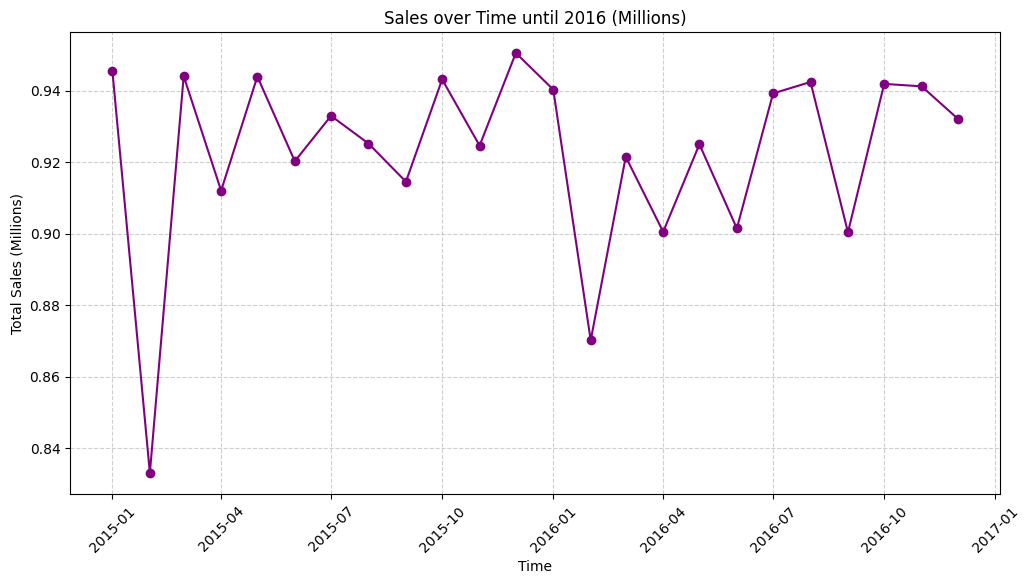

In [26]:
import numpy as np

# Filter data for years up to 2016
sales_over_time_until_2016 = sales_over_time[sales_over_time.index.year <= 2016]

# Scale down sales units to 1 * 10^6
sales_over_time_scaled = sales_over_time_until_2016 / 1e6

# Create a figure and axes for the line graph
fig, ax = plt.subplots(figsize=(12, 6))

# Line Graph of Sales over Time until 2016
ax.plot(sales_over_time_scaled.index.to_timestamp(), sales_over_time_scaled.values, marker='o', linestyle='-', color='purple', label='Sales (Millions)')

# Additional formatting for the line graph
ax.set_title('Sales over Time until 2016 (Millions)')
ax.set_xlabel('Time')
ax.set_ylabel('Total Sales (Millions)')

ax.tick_params(axis='x', rotation=45)
ax.grid(True, linestyle='--', alpha=0.6)

# Show the line graph
plt.show()


### Line Graph of Sales over Time: Insights and Analysis

#### Interpretation
The line graph illustrates the trend of sales over time, showcasing how sales volumes have fluctuated across different periods. Peaks and troughs in the graph may correspond to seasonal variations, marketing campaigns, or other external factors affecting sales.

#### Business Implications
1. **Trend Identification**: Identifying upward or downward trends in sales over time can help in understanding the overall market dynamics and the effectiveness of sales strategies.
2. **Seasonality and Event Impact**: The graph helps in pinpointing periods of high and low sales, which may be influenced by seasonality, holidays, or promotional events, offering insights into consumer behavior.

#### Recommendations
1. **Strategic Planning for Seasonality**: Prepare for expected seasonal fluctuations by adjusting inventory levels, staffing, and marketing efforts to match anticipated demand.
2. **Marketing and Promotions Analysis**: Evaluate the impact of marketing campaigns and promotions by analyzing spikes in sales, and use these insights to plan future marketing activities more effectively.
3. **Long-term Strategy Development**: Use insights from sales trends to inform long-term business strategies, such as market expansion, product development, and customer engagement initiatives.

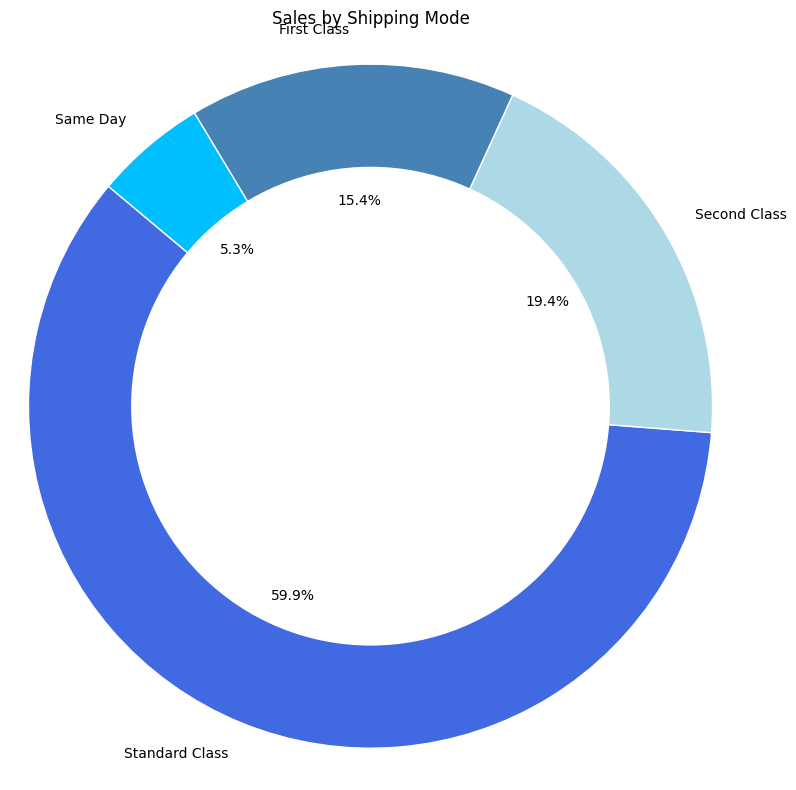

In [ ]:
import matplotlib.pyplot as plt

# Aggregate sales by shipping mode
sales_by_shipping_mode = df.groupby('Shipping Mode')['Sales per customer'].sum().sort_values(ascending=False)

# Create a donut chart for Sales by Shipping Mode
plt.figure(figsize=(8, 8))
colors = ['royalblue', 'lightblue', 'steelblue', 'deepskyblue']
plt.pie(sales_by_shipping_mode.values, labels=sales_by_shipping_mode.index, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'white'})

# Draw a white circle in the center to create the donut effect
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Add a title
plt.title('Sales by Shipping Mode')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.tight_layout()

plt.show()


#### Business Implications
1. **Customer Preferences**: The most popular shipping modes may reflect customer priorities, such as delivery speed, cost, or convenience.
2. **Operational Efficiency**: High-performing shipping modes in terms of sales might also indicate areas where the operational process is efficient and well-received by customers.

#### Recommendations
1. **Optimize Popular Shipping Modes**: Further invest in and optimize the shipping modes that generate the most sales. This could involve improving delivery times, reducing costs, or enhancing the customer experience.
2. **Evaluate Underperforming Shipping Modes**: For shipping modes that contribute less to overall sales, consider whether improvements could make them more attractive or if resources would be better allocated elsewhere.
3. **Customer Feedback and Analysis**: Conduct customer surveys or analyze purchase behavior to understand why certain shipping modes are preferred. Use this feedback to tailor shipping options more closely to customer preferences.

This analysis helps to align shipping strategies with customer expectations and operational capabilities, potentially leading to improved customer satisfaction and increased sales.


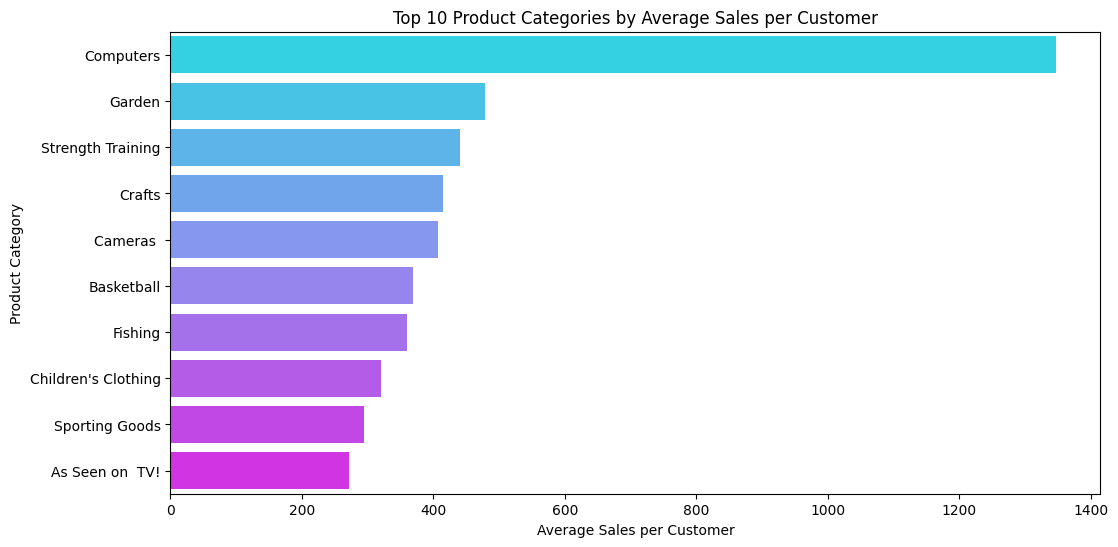

In [ ]:
# Calculate average sales per customer by product category
avg_sales_by_category = df.groupby('Category Name')['Sales per customer'].mean().sort_values(ascending=False).head(10)

# Prepare data for the box plot
days_for_shipping_real = df[['Days for shipping (real)', 'Shipping Mode']]

# Generating Average Sales per Customer by Product Category
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_sales_by_category.values, y=avg_sales_by_category.index, palette='cool')
plt.title('Top 10 Product Categories by Average Sales per Customer')
plt.xlabel('Average Sales per Customer')
plt.ylabel('Product Category')

plt.show()



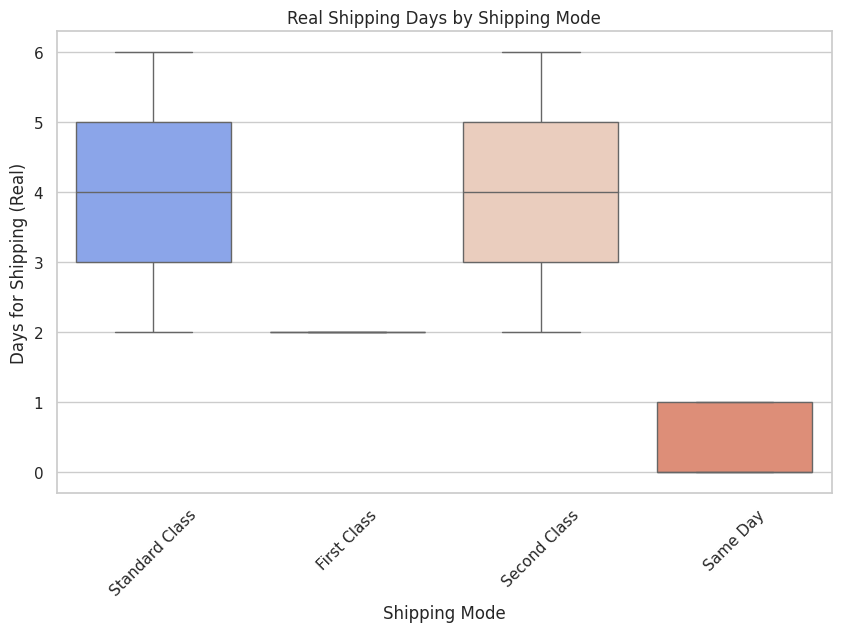

In [ ]:
#  Box Plot of Days for shipping (real) by Shipping Mode
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Shipping Mode", y="Days for shipping (real)", palette="coolwarm")
plt.title('Real Shipping Days by Shipping Mode')
plt.xlabel('Shipping Mode')
plt.ylabel('Days for Shipping (Real)')
plt.xticks(rotation=45)
plt.show()



###  Real Shipping Days by Shipping Mode

**Explanation of Results:**
1. The box plot shows significant variation in "Days for shipping (real)" across different "Shipping Modes," with Standard Class having the widest interquartile range.
2. Premium delivery modes like "Same Day" and "First Class" show tighter distributions, indicating more consistent delivery times.
3. Outliers in "Standard Class" and "Second Class" suggest occasional significant delays beyond typical delivery times.

**Business Implications:**
1. **Standard Class Vulnerabilities:** The high variability in delivery times for Standard Class shipping could lead to customer dissatisfaction and unreliable service perceptions.
2. **Premium Delivery Reliability:** Customers using premium shipping options are likely experiencing more reliable delivery times, which could justify higher shipping fees.
3. **Operational Efficiency:** The presence of outliers, especially in slower shipping modes, points to operational inefficiencies that need addressing.

**Recommendations:**
1. **Improve Standard Class Consistency:** Implement measures to reduce variability in Standard Class delivery times, possibly through better logistics planning and carrier partnerships.
2. **Promote Premium Shipping:** Highlight the reliability of premium shipping modes in marketing communications to encourage uptake among customers seeking faster delivery.
3. **Analyze and Address Delays:** Conduct a thorough analysis of cases behind significant shipping delays and develop targeted strategies to mitigate such issues in the future.

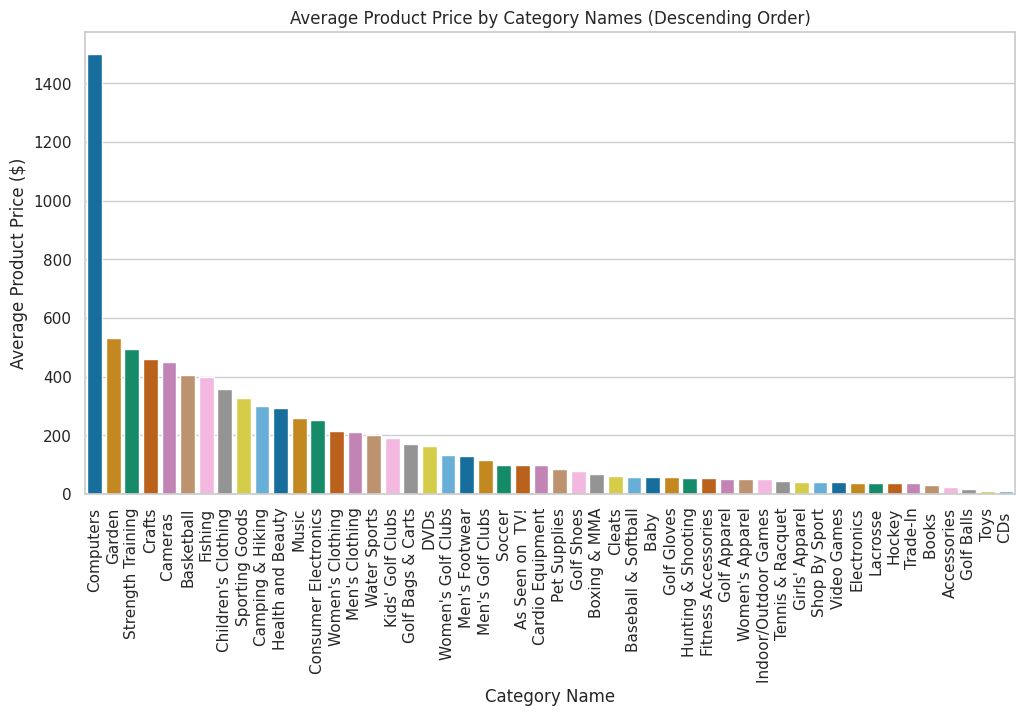

In [ ]:

# Calculate the average Product Price by Category Names and sort them in descending order
average_prices = df.groupby("Category Name")["Product Price"].mean().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=average_prices.index, y=average_prices.values, palette="colorblind")
plt.title('Average Product Price by Category Names (Descending Order)')
plt.xlabel('Category Name')
plt.ylabel('Average Product Price ($)')
plt.xticks(rotation=90)
plt.show()


### Graph: Average Product Price by Category Names (Descending Order)

**Explanation of Results:**
- The bar plot displays the average product price across different categories, sorted in descending order. Categories at the left have the highest average prices, indicating they might consist of premium products or those with higher production costs.

**Business Implications:**
1. **Product Positioning and Strategy:** Categories with higher average prices may be positioned as premium offerings. Understanding how pricing aligns with customer perception and market position is crucial for each category.
2. **Inventory and Stock Management:** Categories with higher average prices might require more capital to maintain inventory levels, impacting stock management and investment strategies.
3. **Sales and Marketing Focus:** The pricing strategy across categories will influence sales and marketing efforts. Categories with high average prices might require targeted marketing strategies to reach the right customer segments.

**Recommendations:**
1. **Review Pricing Strategies:** For categories with high average prices, ensure that pricing strategies are aligned with the target market's willingness to pay and perceived value.
2. **Customized Marketing:** Develop marketing campaigns that highlight the unique value or quality of products in higher-priced categories to justify their premium pricing.
3. **Competitive Analysis:** Conduct a competitive analysis to ensure that prices in each category remain competitive without sacrificing margins, especially in high-average-price categories.

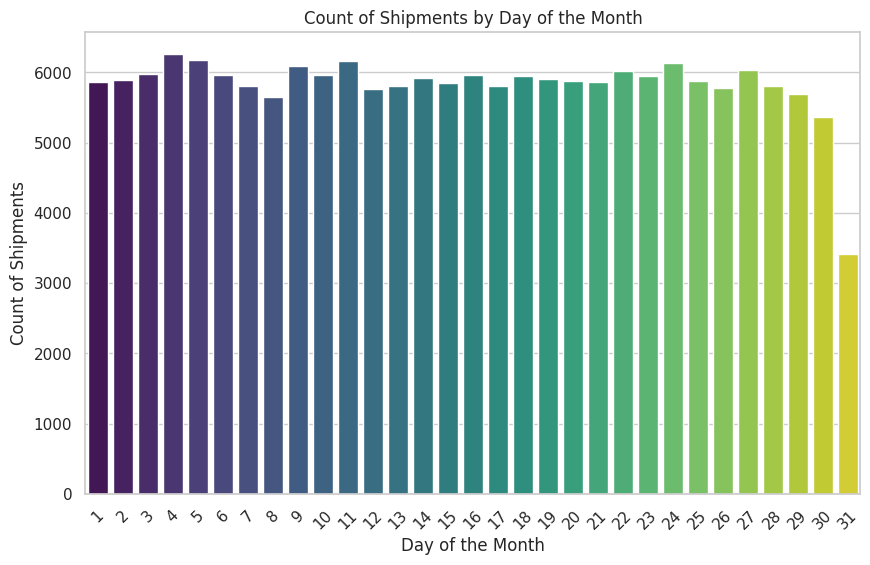

In [ ]:
# Convert 'Shipping Date' to datetime format
df['Shipping Date'] = pd.to_datetime(df['Shipping Date'])

# Extract hour of the day, day of the month, and month of the year
df['Shipping Hour'] = df['Shipping Date'].dt.hour
df['Shipping Day'] = df['Shipping Date'].dt.day
df['Shipping Month'] = df['Shipping Date'].dt.month

#  Count of Shipments by Day of the Month
plt.figure(figsize=(10, 6))
sns.countplot(x='Shipping Day', data=df, palette='viridis')
plt.title('Count of Shipments by Day of the Month')
plt.xlabel('Day of the Month')
plt.ylabel('Count of Shipments')
plt.xticks(rotation=45)
plt.show()





###  Count of Shipments by Day of the Month

**Explanation of Results:**
- The graph reveals how shipment volumes vary across different days of the month, with certain days showing higher activity.

**Business Implications:**
1. **Promotional Impact:** Peaks may coincide with promotional events or paydays, influencing customer purchasing behavior.
2. **Inventory Management:** Anticipating days with higher shipment volumes can guide inventory restocking and management strategies.
3. **Resource Allocation:** Knowing which days are busiest for shipments allows for more effective resource allocation and scheduling.

**Recommendations:**
1. **Promotional Planning:** Schedule promotions or sales events in alignment with historical shipment peaks to capitalize on high customer activity.
2. **Improve Inventory Turnover:** Prepare for high shipment days by ensuring adequate inventory levels and optimizing turnover rates.
3. **Enhance Customer Experience:** Ensure customer service and support are adequately staffed on peak shipment days to maintain service quality.

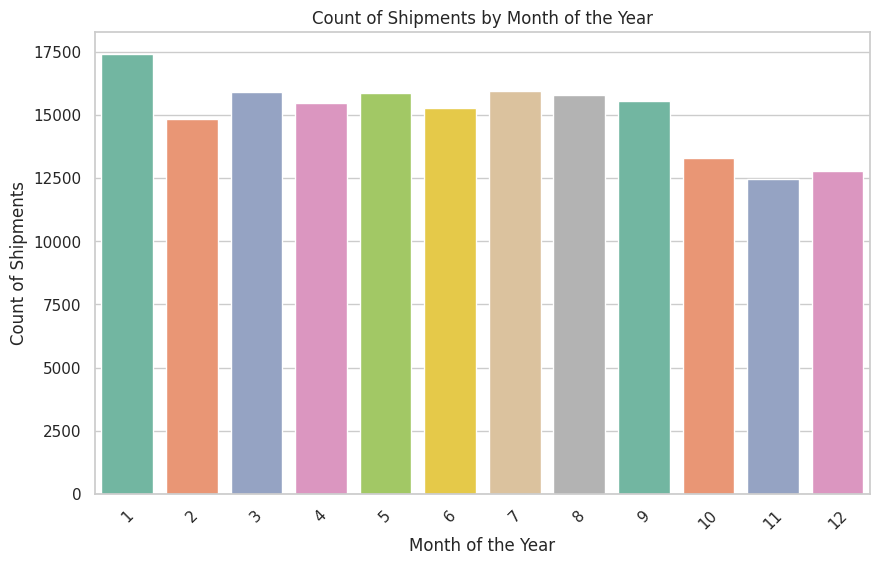

In [ ]:
# Count of Shipments by Month of the Year
plt.figure(figsize=(10, 6))
sns.countplot(x='Shipping Month', data=df, palette='Set2')
plt.title('Count of Shipments by Month of the Year')
plt.xlabel('Month of the Year')
plt.ylabel('Count of Shipments')
plt.xticks(rotation=45)
plt.show()

### Count of Shipments by Month of the Year

**Explanation of Results:**
- This visualization indicates which months experience the highest number of shipments, potentially reflecting seasonal purchasing trends or promotional impacts.

**Business Implications:**
1. **Seasonal Sales Trends:** High shipment volumes during specific months may reflect seasonal buying patterns, important for marketing and sales strategy.
2. **Strategic Planning:** Planning for months with high shipment volumes by adjusting marketing efforts, inventory levels, and logistics operations is crucial.
3. **Yearly Performance Analysis:** Understanding monthly shipment trends contributes to evaluating overall yearly performance and planning for future growth.

**Recommendations:**
1. **Seasonal Marketing Campaigns:** Tailor marketing campaigns and promotions to precede expected peak shipment months, maximizing sales opportunities.
2. **Logistics and Supply Chain Adjustments:** Prepare for months with historically high shipment volumes by optimizing supply chain and logistics operations in advance.
3. **Yearly Review and Planning:** Use insights from monthly shipment trends for yearly strategic planning, aiming to smooth out demand or capitalize on peak periods.

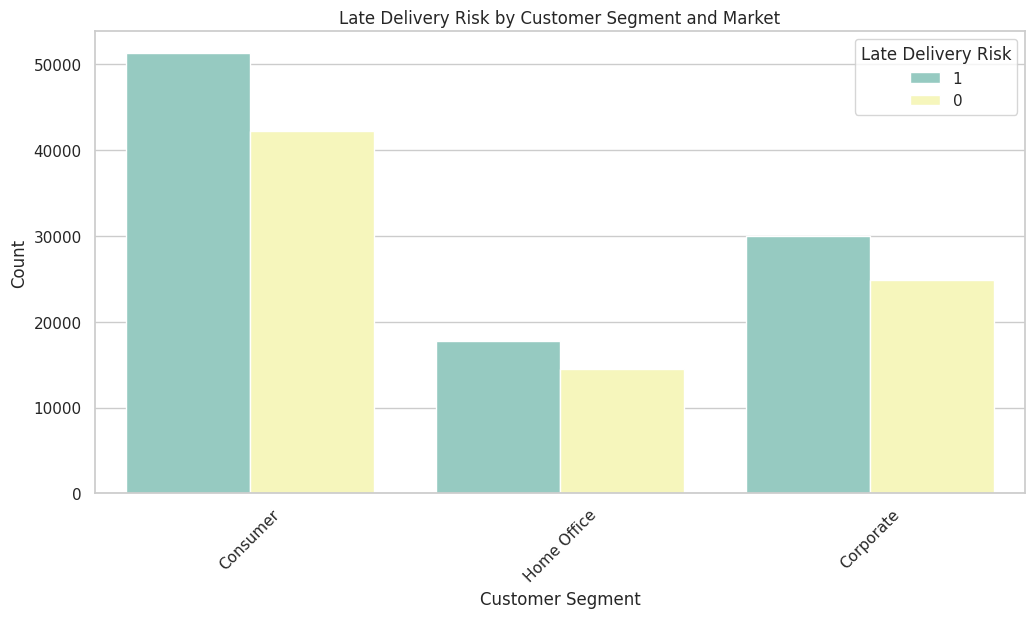

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Customer Segment', hue='Late_delivery_risk', data=df, palette="Set3", hue_order=[1, 0])
plt.title('Late Delivery Risk by Customer Segment and Market')
plt.xlabel('Customer Segment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Late Delivery Risk')
plt.show()


### Interpretations:
1. **Customer Segment Distribution**: There is a significant number of late deliveries in all customer segments, with the 'Consumer' segment showing the highest count of both late (risk = 1) and on-time (risk = 0) deliveries.
2. **Late Delivery Incidence**: Late deliveries are prevalent across all customer segments. However, the 'Home Office' segment has a proportionally higher risk of late delivery compared to the 'Consumer' and 'Corporate' segments.
3. **Market Performance**: The chart does not differentiate by market, but the title suggests that market data might be relevant. If market data were included, one could assess if certain markets have higher late delivery risks.

### Business Implications:
1. **Customer Satisfaction**: Late deliveries across all segments can negatively impact customer satisfaction, repeat business, and brand reputation, especially in segments where late delivery is proportionally higher.
2. **Operational Efficiency**: The prevalence of late deliveries implies potential inefficiencies in logistics, inventory management, or demand forecasting, especially in the 'Home Office' segment.
3. **Segment-Specific Strategies**: Different customer segments may have different expectations and delivery requirements. Tailoring logistics strategies to each segment could improve delivery performance.

### Recommendations:
1. **Enhance Logistics for Home Office Segment**: Given the higher late delivery risk, the 'Home Office' segment may benefit from a dedicated logistics review and improvement program.
2. **Segment-Based Analysis**: Perform a more granular analysis of delivery performance within each segment to identify specific pain points and develop targeted solutions.
3. **Customer Communication and Expectation Management**: Improve communication with customers regarding expected delivery times, and consider offering compensations or incentives for late deliveries to maintain customer relations.

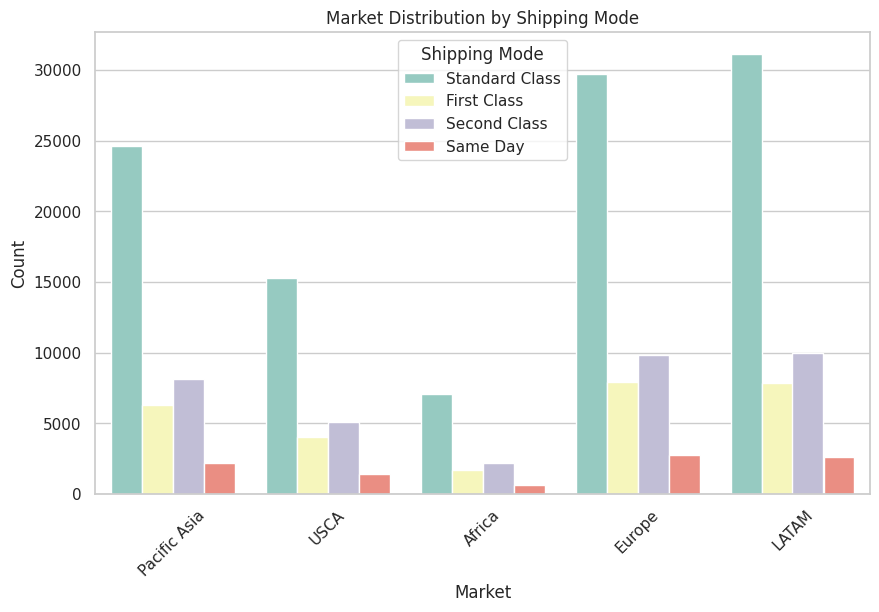

In [ ]:
# This bar plot explores the distribution of markets for different shipping modes.
plt.figure(figsize=(10, 6))
sns.countplot(x='Market', hue='Shipping Mode', data=df, palette='Set3')
plt.title('Market Distribution by Shipping Mode')
plt.xlabel('Market')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Shipping Mode')
plt.show()



### Interpretations:
1. **Dominance of Standard Class**: Standard Class shipping is the most used mode across all markets, indicating that customers prioritize cost over speed or are satisfied with the delivery time it offers.
2. **Variation by Market**: There are noticeable differences in the use of shipping modes by market. The Pacific Asia and LATAM markets show a significant preference for Standard Class, with very little use of Same Day shipping.
3. **Limited Same Day Shipping**: Same Day shipping is the least used mode in all markets, which could be due to higher costs, limited availability, or lesser demand for such expedited services.

### Business Implications:
1. **Market Preferences**: Different markets have distinct preferences or requirements for shipping speed, potentially influenced by local infrastructure, customer expectations, or shipping costs.
2. **Cost Sensitivity**: The preference for Standard Class suggests that cost may be a significant factor for customers when choosing shipping options, possibly more so than delivery speed.
3. **Opportunity for Premium Services**: The low use of Same Day shipping could indicate an under-served segment of the market that might be willing to pay for faster delivery if the option is marketed effectively.

### Recommendations:
1. **Expand Premium Shipping Options**: Investigate the feasibility and demand for faster shipping options like First Class and Same Day in markets where they're underutilized.
2. **Market-Specific Strategies**: Develop tailored marketing and logistics strategies that align with the shipping preferences of each market, perhaps offering promotions on underused shipping modes to gauge interest.
3. **Cost-Benefit Analysis**: Conduct a cost-benefit analysis to understand the implications of introducing or expanding expedited shipping services, considering factors like potential revenue increase, operational changes, and customer retention.


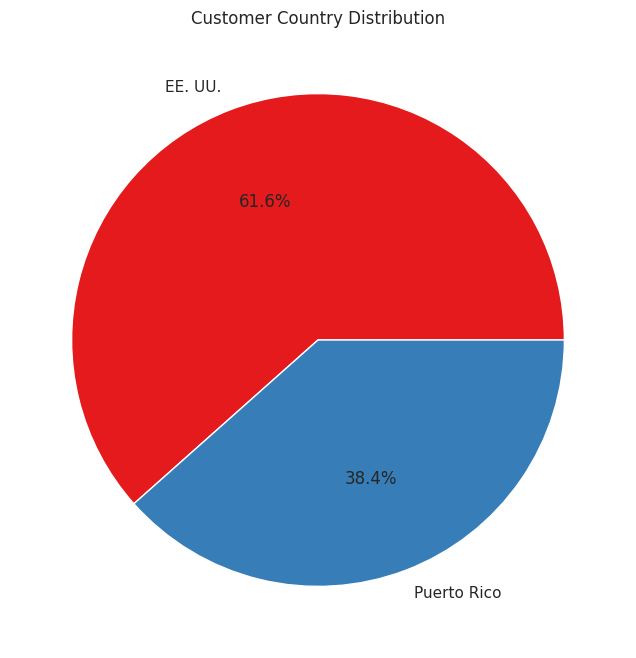

In [ ]:
# This pie chart visualizes the distribution of customer countries in the dataset.

plt.figure(figsize=(8, 8))
customer_country_counts = df['Customer Country'].value_counts()
plt.pie(customer_country_counts, labels=customer_country_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set1'))
plt.title('Customer Country Distribution')
plt.show()


### Interpretations:
1. **Customer Distribution**: 61.6% of the customers are from the United States, while 38.4% are from Puerto Rico, indicating a substantial customer base in both locations.
2. **Market Size**: The United States represents a larger market in terms of customer base compared to Puerto Rico.

### Business Implications:
1. **Market Focus**: The larger customer base in the United States suggests the potential for greater revenue generation, but it also implies a need for larger-scale logistics and customer service operations.
2. **Localized Strategies**: The significant customer presence in Puerto Rico indicates the importance of developing localized strategies that cater to this market's specific needs and preferences.
3. **Diversification**: The distribution suggests a diversified customer base, which could help mitigate market-specific risks.

### Recommendations:
1. **Tailored Marketing**: Create marketing campaigns that are tailored to the cultural and economic contexts of each country.
2. **Logistics Optimization**: Optimize logistics and supply chain strategies for each market to handle the differences in scale and customer distribution effectively.
3. **Localized Product Offerings**: Consider offering products or services that cater to the specific preferences and needs of customers in both the United States and Puerto Rico.

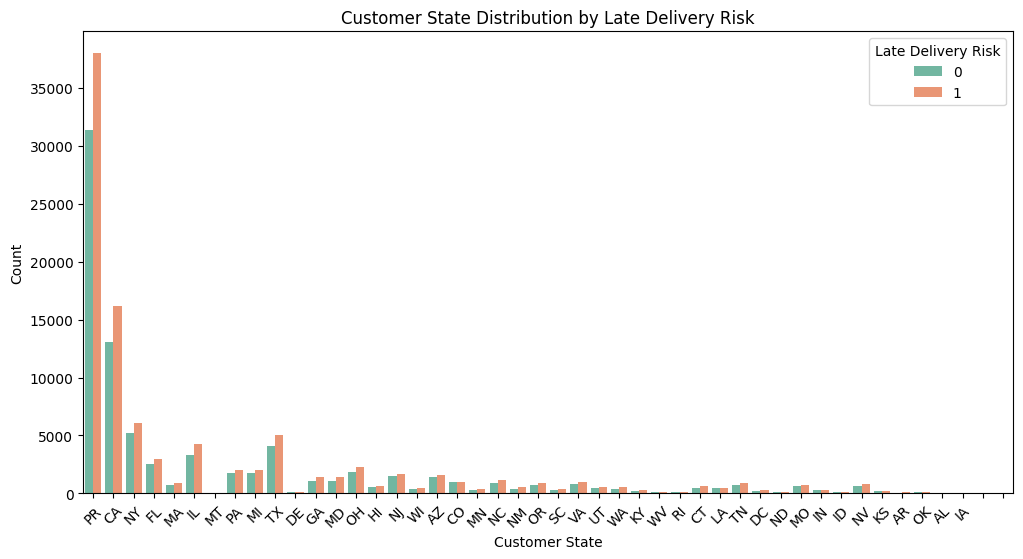

In [27]:
# This bar plot explores the distribution of customer states and their association with late delivery risk.
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Customer State', hue='Late_delivery_risk', data=df, palette='Set2')
plt.title('Customer State Distribution by Late Delivery Risk')
plt.xlabel('Customer State')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Get current tick labels
labels = [item.get_text() for item in ax.get_xticklabels()]

# Remove specific numbers from the tick labels
labels = [label if label not in ['95758', '91732'] else '' for label in labels]

# Set the modified tick labels
ax.set_xticklabels(labels)

plt.legend(title='Late Delivery Risk')
plt.show()


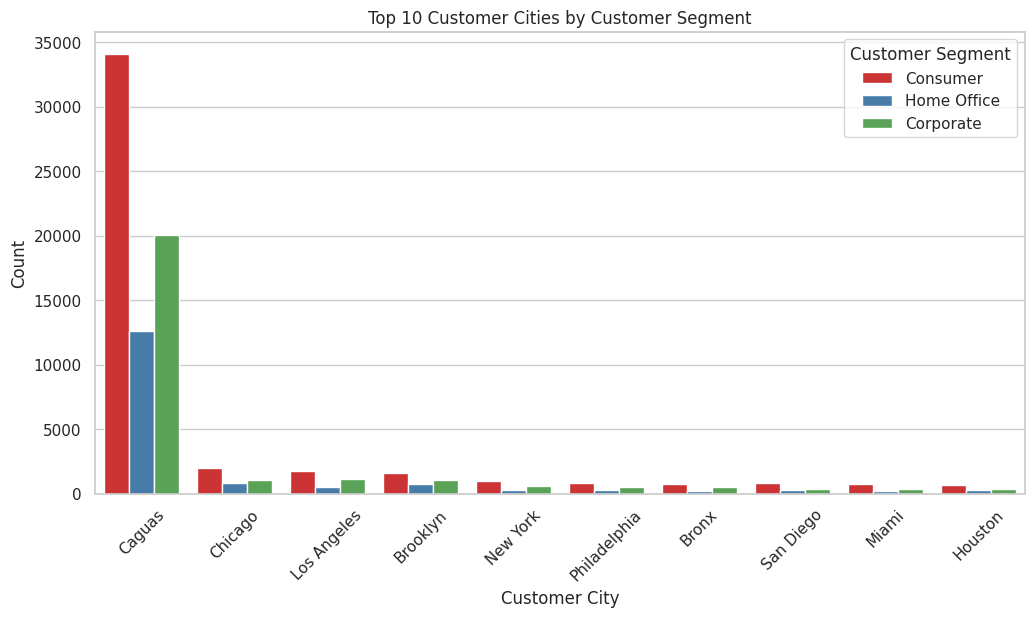

In [ ]:
# Bar Plot of Customer City Distribution by Customer Segment
plt.figure(figsize=(12, 6))
sns.countplot(x='Customer City', hue='Customer Segment', data=df, palette='Set1', order=df['Customer City'].value_counts().iloc[:10].index)
plt.title('Top 10 Customer Cities by Customer Segment')
plt.xlabel('Customer City')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Customer Segment')
plt.show()



#### Interpretations:
1. **City-wise Customer Distribution**: The majority of customers are concentrated in a few cities, with Caguas showing a significantly higher customer count.
2. **Segment Concentration in Cities**: While Consumer customers dominate in most cities, there is a notable presence of Corporate and Home Office segments in certain areas.
3. **Urban vs. Rural Distribution**: The data suggests that urban areas may have a higher concentration of customers across all segments.

#### Business Implications:
1. **Targeted Marketing**: Urban areas, particularly those with high customer counts, could be targeted for specific marketing campaigns and product launches.
2. **Distribution Optimization**: Distribution centers and logistics strategies may need to be optimized for efficiency in cities with high customer concentrations.
3. **Segment-Specific Strategies**: The presence of different segments in these cities could indicate a need for varied strategies that cater to the unique needs of each segment.

#### Recommendations:
1. **Localized Marketing Initiatives**: Create marketing initiatives that are tailored to the top cities, considering the unique demographics and customer behaviors in each.
2. **Infrastructure Investment**: Invest in supply chain infrastructure in cities with high customer density to improve delivery times and reduce late delivery risk.
3. **Customer Outreach Programs**: Develop community engagement and outreach programs in these cities to build brand presence and loyalty.

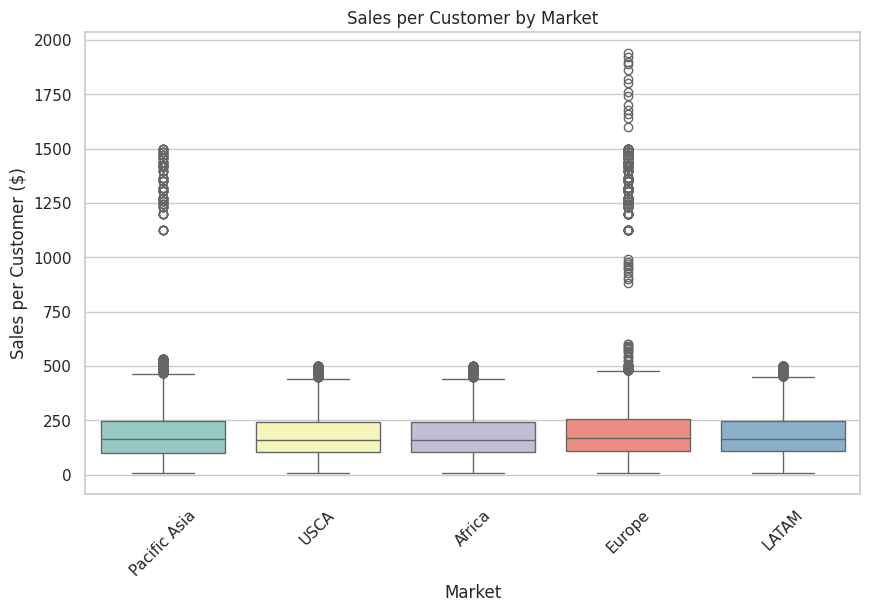

In [ ]:
# Boxplot of Sales per Customer by Market
plt.figure(figsize=(10, 6))
sns.boxplot(x='Market', y='Sales per customer', data=df, palette='Set3')
plt.title('Sales per Customer by Market')
plt.xlabel('Market')
plt.ylabel('Sales per Customer ($)')
plt.xticks(rotation=45)
plt.show()



#### Interpretations:
1. **Sales Distribution**: The median sales per customer are relatively consistent across markets, but there are noticeable outliers, especially in the Pacific Asia market, suggesting some customers have very high purchase amounts.
2. **Market Consistency**: The interquartile ranges are similar across markets, indicating a degree of consistency in customer spending within each market.
3. **Potential for Growth**: The presence of outliers may indicate untapped potential for increased sales in specific markets or with certain customers.

#### Business Implications:
1. **Targeted Marketing**: Understanding the distribution of sales can help tailor marketing efforts to capitalize on markets with higher spending outliers.
2. **Customer Segmentation**: There may be an opportunity to segment customers based on their spending and create customized offerings.
3. **Risk of Market Volatility**: Markets with greater sales variability may be more susceptible to fluctuations in customer spending habits.

#### Recommendations:
1. **High-Value Customer Programs**: Develop loyalty programs or personalized services for customers that represent the outliers in sales.
2. **Market-Specific Strategies**: Adapt sales strategies to account for the sales distribution in each market, potentially focusing on upselling and cross-selling where the interquartile range is higher.
3. **Customer Behavior Analysis**: Conduct in-depth analysis on the spending patterns of customers, especially in markets with significant outliers, to better understand their preferences and needs.


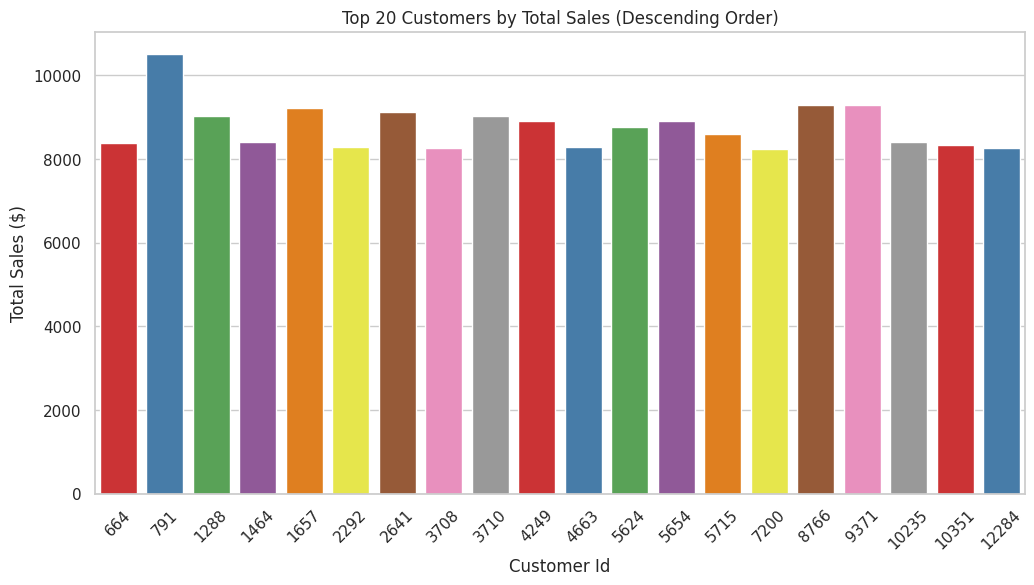

In [ ]:
# Calculate Total Sales per Customer
total_sales_per_customer = df.groupby('Customer Id')['Sales'].sum().sort_values(ascending=False)

# Select the Top 20 Customers in descending order
top_20_customers = total_sales_per_customer.head(20)[::-1]

# Create a Bar Plot for the Top 20 Customers
plt.figure(figsize=(12, 6))
sns.barplot(x=top_20_customers.index, y=top_20_customers.values, palette='Set1')
plt.title('Top 20 Customers by Total Sales (Descending Order)')
plt.xlabel('Customer Id')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.show()


#### Interpretations:
1. **Customer Value**: There's a clear indication of the value that the top customers bring, with some contributing significantly more to total sales than others.
2. **Sales Concentration**: A small group of customers is responsible for a substantial amount of sales, suggesting a high customer concentration.
3. **Revenue Dependency**: The company might be heavily reliant on these top customers for its revenue, indicating potential risks if these customers' loyalty wanes.

#### Business Implications:
1. **Customer Retention**: It's crucial to retain these top customers as they contribute significantly to the revenue.
2. **Customer Relationship Management**: Building strong relationships with these key customers could be vital for sustained business.
3. **Diversification**: There's a need for diversification to reduce dependency on a small customer base.

#### Recommendations:
1. **Key Account Management**: Assign dedicated account managers to maintain the relationship with these top customers.
2. **Customized Incentives**: Offer personalized incentives to ensure the continued loyalty of top customers.
3. **Expand Customer Base**: Strategies to broaden the customer base should be developed to reduce the risk associated with dependency on a few customers.



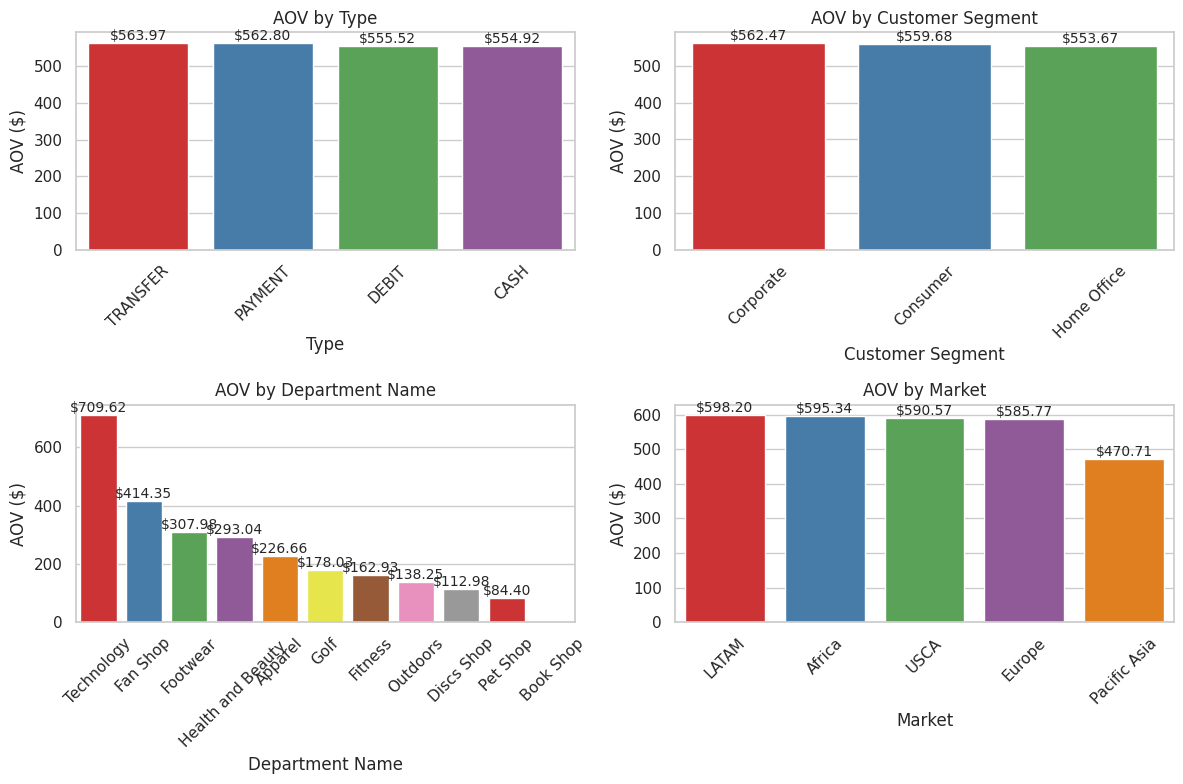

In [ ]:
# Define the categories for analysis
categories = ['Type', 'Customer Segment', 'Department Name', 'Market']

# Create a 2x2 grid of subplots with adjusted sizes
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.subplots_adjust(hspace=0.5, wspace=0.4)  # Adjust spacing between subplots

# Loop through categories and calculate AOV for each
for i, category in enumerate(categories):
    # Calculate Average Order Value (AOV) by Category
    aov = df.groupby(category)['Sales'].sum().nlargest(10) / df.groupby(category)['Order Id'].nunique()
    aov = aov.sort_values(ascending=False)

    # Plot AOV for the current category
    ax = axes[i // 2, i % 2]
    sns.barplot(x=aov.index, y=aov.values, palette='Set1', ax=ax)
    ax.set_title(f'AOV by {category}')
    ax.set_xlabel(f'{category}')
    ax.set_ylabel('AOV ($)')
    ax.tick_params(axis='x', rotation=45)

    # Add values on top of the bars with proper alignment
    for bar, value in zip(ax.patches, aov.values):
        ax.annotate(f'${value:.2f}', (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()



#### Interpretations:
1. **Payment Type Influence**: The AOV is slightly higher for transactions made via TRANSFER and PAYMENT methods, suggesting these might be preferred for larger purchases.
2. **Segment Spending Power**: The Corporate segment shows the highest AOV, indicating that corporate customers tend to spend more per order compared to Consumer and Home Office segments.
3. **Department Revenue**: The Technology department has a significantly higher AOV, suggesting it deals with higher-priced items or packages.

#### Business Implications:
1. **Payment Facilitation**: Offering a range of payment options might influence the AOV positively, particularly for high-value transactions.
2. **Segment-Specific Sales Strategy**: Different strategies may be required for each customer segment to increase the AOV based on their current spending levels.
3. **Product Strategy**: Higher AOV departments such as Technology may warrant more focus in terms of inventory, marketing, and sales efforts.

#### Recommendations:
1. **Enhance Payment Options**: Ensure smooth and secure payment processing for methods that correlate with higher AOV.
2. **Corporate Sales Team**: Invest in a specialized sales team focused on the Corporate segment to increase the AOV even further.
3. **Technology Department Promotion**: Given the high AOV, promote the Technology department's products through targeted campaigns and upselling strategies.



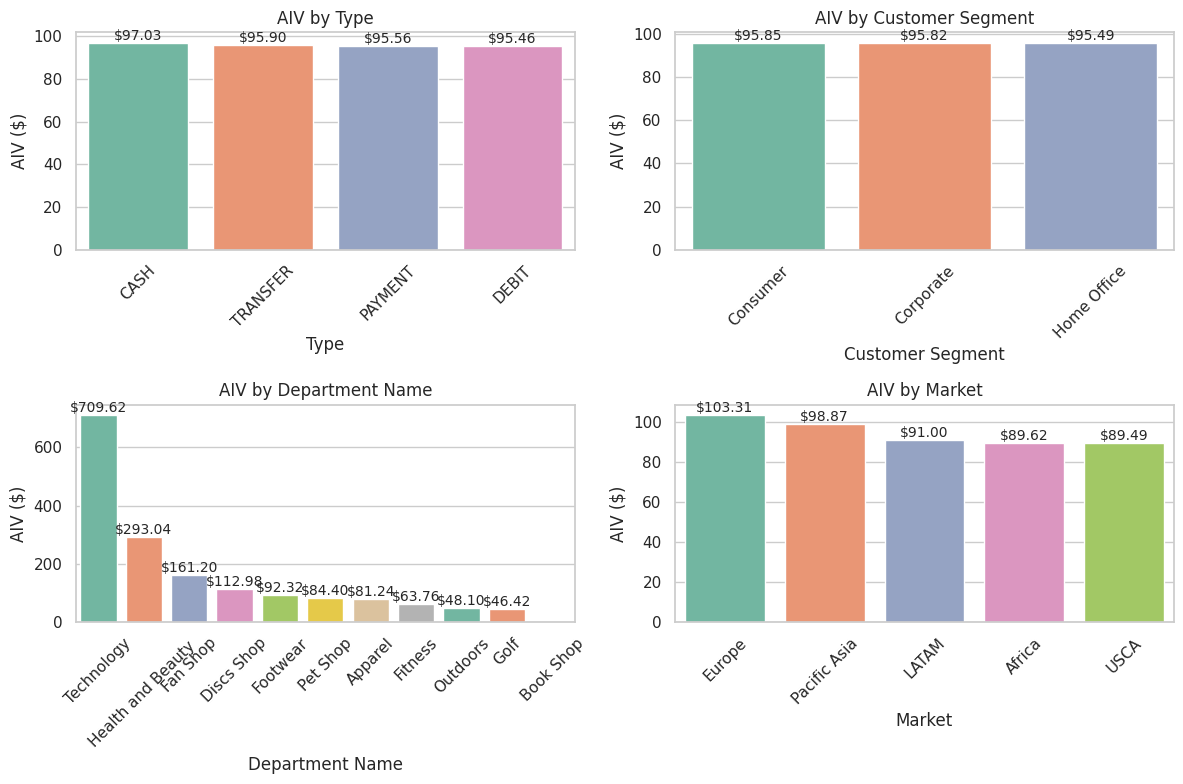

In [ ]:
# Define the categories for analysis
categories = ['Type', 'Customer Segment', 'Department Name', 'Market']

# Create a 2x2 grid of subplots with adjusted sizes
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.subplots_adjust(hspace=0.5, wspace=0.4)  # Adjust spacing between subplots

# Loop through categories and calculate AIV for each
for i, category in enumerate(categories):
    # Calculate Average Item Value (AIV) by Category
    aiv = df.groupby(category)['Sales'].sum().nlargest(10) / df.groupby(category)['Order Item Quantity'].sum()
    aiv = aiv.sort_values(ascending=False)

    # Plot AIV for the current category
    ax = axes[i // 2, i % 2]
    sns.barplot(x=aiv.index, y=aiv.values, palette='Set2', ax=ax)
    ax.set_title(f'AIV by {category}')
    ax.set_xlabel(f'{category}')
    ax.set_ylabel('AIV ($)')
    ax.tick_params(axis='x', rotation=45)

    # Add values on top of the bars with proper alignment
    for bar, value in zip(ax.patches, aiv.values):
        ax.annotate(f'${value:.2f}', (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()



### AIV by Type
1. **Interpretations**: Cash transactions have the highest AIV, followed closely by transfers and payments, with debit having the lowest. This could indicate that customers making cash payments tend to purchase more or higher-value items per transaction.
2. **Business Implications**: Higher AIV for cash transactions could imply a customer segment that is either not as sensitive to price or prefers to make significant purchases in a single transaction.
3. **Recommendations**: Encourage cash transactions if feasible for the business, considering security and operational aspects, as they may lead to higher per-transaction revenues.

### AIV by Customer Segment
1. **Interpretations**: AIV is relatively consistent across the 'Consumer', 'Corporate', and 'Home Office' segments, with 'Consumer' leading slightly.
2. **Business Implications**: The similarity in AIV suggests that all customer segments contribute equally to revenue on a per-invoice basis, which is beneficial for diversification.
3. **Recommendations**: Focus on balanced marketing strategies across all segments, ensuring that each segment's needs are addressed to maintain the uniform contribution to revenue.

### AIV by Department Name
1. **Interpretations**: The 'Technology' department has a significantly higher AIV compared to other departments, which is typical given the higher cost of technology products.
2. **Business Implications**: The high AIV in 'Technology' indicates a strong revenue stream but could also suggest a dependency on a single department for profitability.
3. **Recommendations**: While continuing to leverage the high AIV of the 'Technology' department, explore strategies to increase the AIV in other departments, such as bundling lower AIV items or improving cross-selling strategies.

### AIV by Market
1. **Interpretations**: Europe has the highest AIV, indicating that customers in this market spend more per transaction than in other regions.
2. **Business Implications**: The variation in AIV by market can guide market-specific strategies and indicate where higher-value sales strategies might be more successful.
3. **Recommendations**: Develop tailored strategies for the European market to capitalize on the higher AIV, and investigate the factors contributing to lower AIV in markets like LATAM and Africa to identify potential growth strategies.


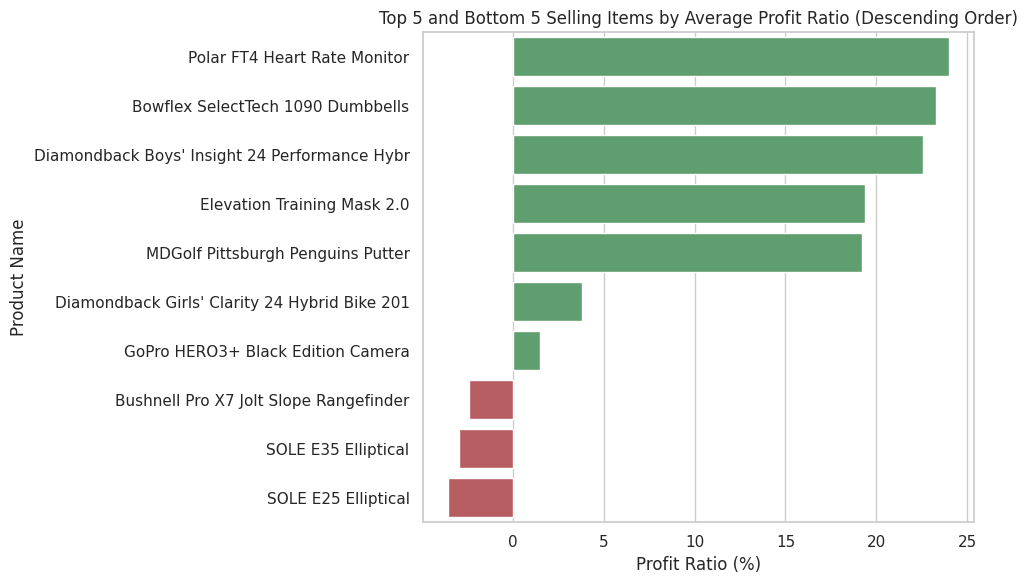

In [ ]:
# Calculate the average Order Item Profit Ratio as a percentage for each SKU
avg_profit_ratio_percent = df.groupby('Product Name')['Order Item Profit Ratio'].mean() * 100

# Sort the SKUs by average profit ratio in descending order
sorted_skus = avg_profit_ratio_percent.sort_values(ascending=False)

# Select the top 5 and bottom 5 SKUs
top_5_skus = sorted_skus.head(5)
bottom_5_skus = sorted_skus.tail(5)

# Concatenate the top and bottom SKUs for plotting
combined_skus = pd.concat([top_5_skus, bottom_5_skus])

# Create a color list for bars (green for profit, red for loss)
colors = ['g' if ratio >= 0 else 'r' for ratio in combined_skus]

# Create a bar plot for the combined SKUs
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=combined_skus.values, y=combined_skus.index, palette=colors)
plt.title('Top 5 and Bottom 5 Selling Items by Average Profit Ratio (Descending Order)')
plt.xlabel('Profit Ratio (%)')
plt.ylabel('Product Name')

# Show the plot
plt.tight_layout()
plt.show()


#### Interpretations:
1. **Profitability of Products**: The chart identifies which products yield higher average profit ratios, indicating their profitability relative to sales price.
2. **Product Performance**: High-profit ratio items, such as the Polar FT4 Heart Rate Monitor and Bowflex SelectTech 1090 Dumbbells, may have a low cost of goods sold or a high sales price, enhancing profitability.
3. **Concerning Products**: Products like the SOLE E25 and E35 Ellipticals show negative profit ratios, indicating a loss per sale which may be due to high costs, discounts, or pricing issues.

#### Business Implications:
1. **Strategic Focus**: High-profit ratio items may warrant more marketing and sales efforts due to their substantial contribution to overall profitability.
2. **Cost Management**: Negative profit ratios call for a review of cost structures, pricing strategies, and potentially the discontinuation of certain items.
3. **Inventory Optimization**: Stock levels of high-profit products should be optimized to meet demand without overstocking less profitable items.

#### Recommendations:
1. **Promote High-Profit Items**: Increase promotional activities for products with high-profit ratios to boost sales.
2. **Review Pricing Strategy**: For products with negative profit ratios, reevaluate pricing strategies, including considering price increases or cost reductions.
3. **Analyze Cost of Goods Sold**: Conduct an in-depth analysis of the cost of goods sold for low-profit or loss-making items to identify areas for potential savings.



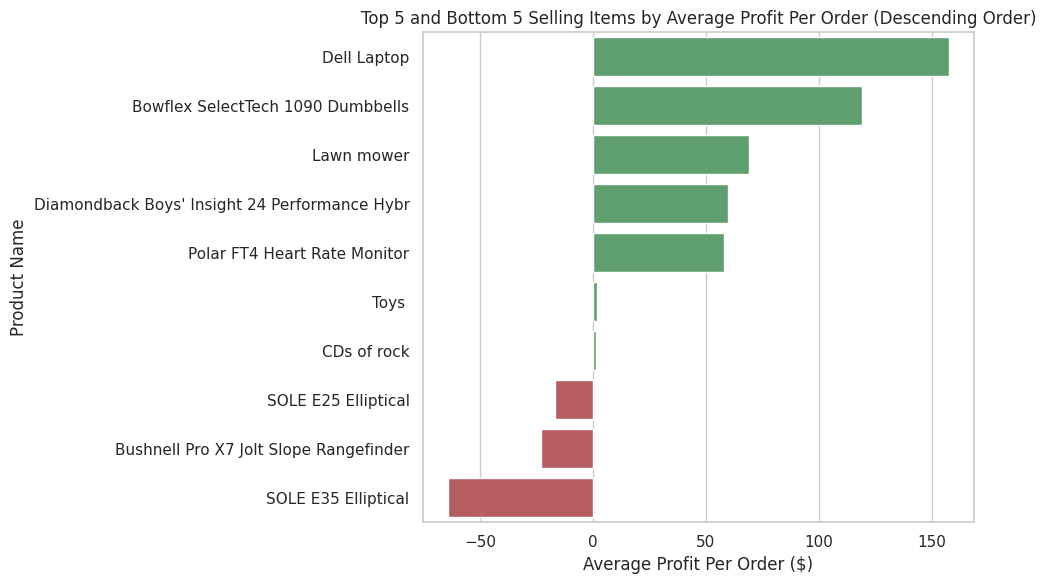

In [ ]:
# Calculate the average Order Profit Per Order for each SKU
avg_profit_per_order = df.groupby('Product Name')['Order Profit Per Order'].mean()

# Sort the SKUs by average profit per order in descending order
sorted_skus = avg_profit_per_order.sort_values(ascending=False)

# Select the top 5 and bottom 5 SKUs
top_5_skus = sorted_skus.head(5)
bottom_5_skus = sorted_skus.tail(5)

# Concatenate the top and bottom SKUs for plotting
combined_skus = pd.concat([top_5_skus, bottom_5_skus])

# Create a color list for bars (green for profit, red for loss)
colors = ['g' if profit >= 0 else 'r' for profit in combined_skus]

# Create a bar plot for the combined SKUs
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=combined_skus.values, y=combined_skus.index, palette=colors)
plt.title('Top 5 and Bottom 5 Selling Items by Average Profit Per Order (Descending Order)')
plt.xlabel('Average Profit Per Order ($)')
plt.ylabel('Product Name')

# Show the plot
plt.tight_layout()
plt.show()


#### Interpretations:
1. **Earnings Per Item**: This chart provides insight into the average profit generated per order for various items, which is crucial for understanding the impact of individual products on overall profitability.
2. **Product Profit Contribution**: Products like the Dell Laptop and Bowflex Dumbbells contribute significantly to profits on a per-order basis.
3. **Negative Impact Products**: The SOLE Ellipticals are again shown to negatively impact profits, which may indicate that these products are sold at a loss or associated with high costs.

#### Business Implications:
1. **Product Mix Optimization**: There may be a need to optimize the product mix to favor items that contribute more to profits.
2. **Pricing and Discounting Strategies**: Reassess pricing and discounting strategies, especially for items showing a loss to ensure each sale contributes positively to profits.
3. **Sales Strategy**: High-profit items might benefit from upselling and bundling strategies to increase the average order value.

#### Recommendations:
1. **Focus on High-Profit Products**: Allocate more resources to selling high-profit items, possibly through targeted advertising and sales incentives.
2. **Cost Reduction Measures**: For products causing a loss, identify cost reduction measures or consider discontinuing them if they are not strategically necessary.
3. **Monitor Sales and Profitability**: Regularly monitor the sales performance and profitability of all items to ensure the product portfolio remains healthy and profitable.



1. The distribution of customer locations primarily clusters within North America, with a particularly high concentration of points on the east coast of the United States. This suggests that the majority of the customer base resides within this region.

2. There are scattered customer locations across other continents, including Europe and Asia, with notable clusters in Western Europe and the coastal regions of South and East Asia. This secondary presence indicates a global reach of the business, though to a lesser extent compared to North America.

3. The absence of customer locations in large areas of Africa, South America, and Central Asia could indicate regions that are either not served by the business or have a significantly lower customer base. This might represent untapped markets or areas where the business has chosen not to operate.

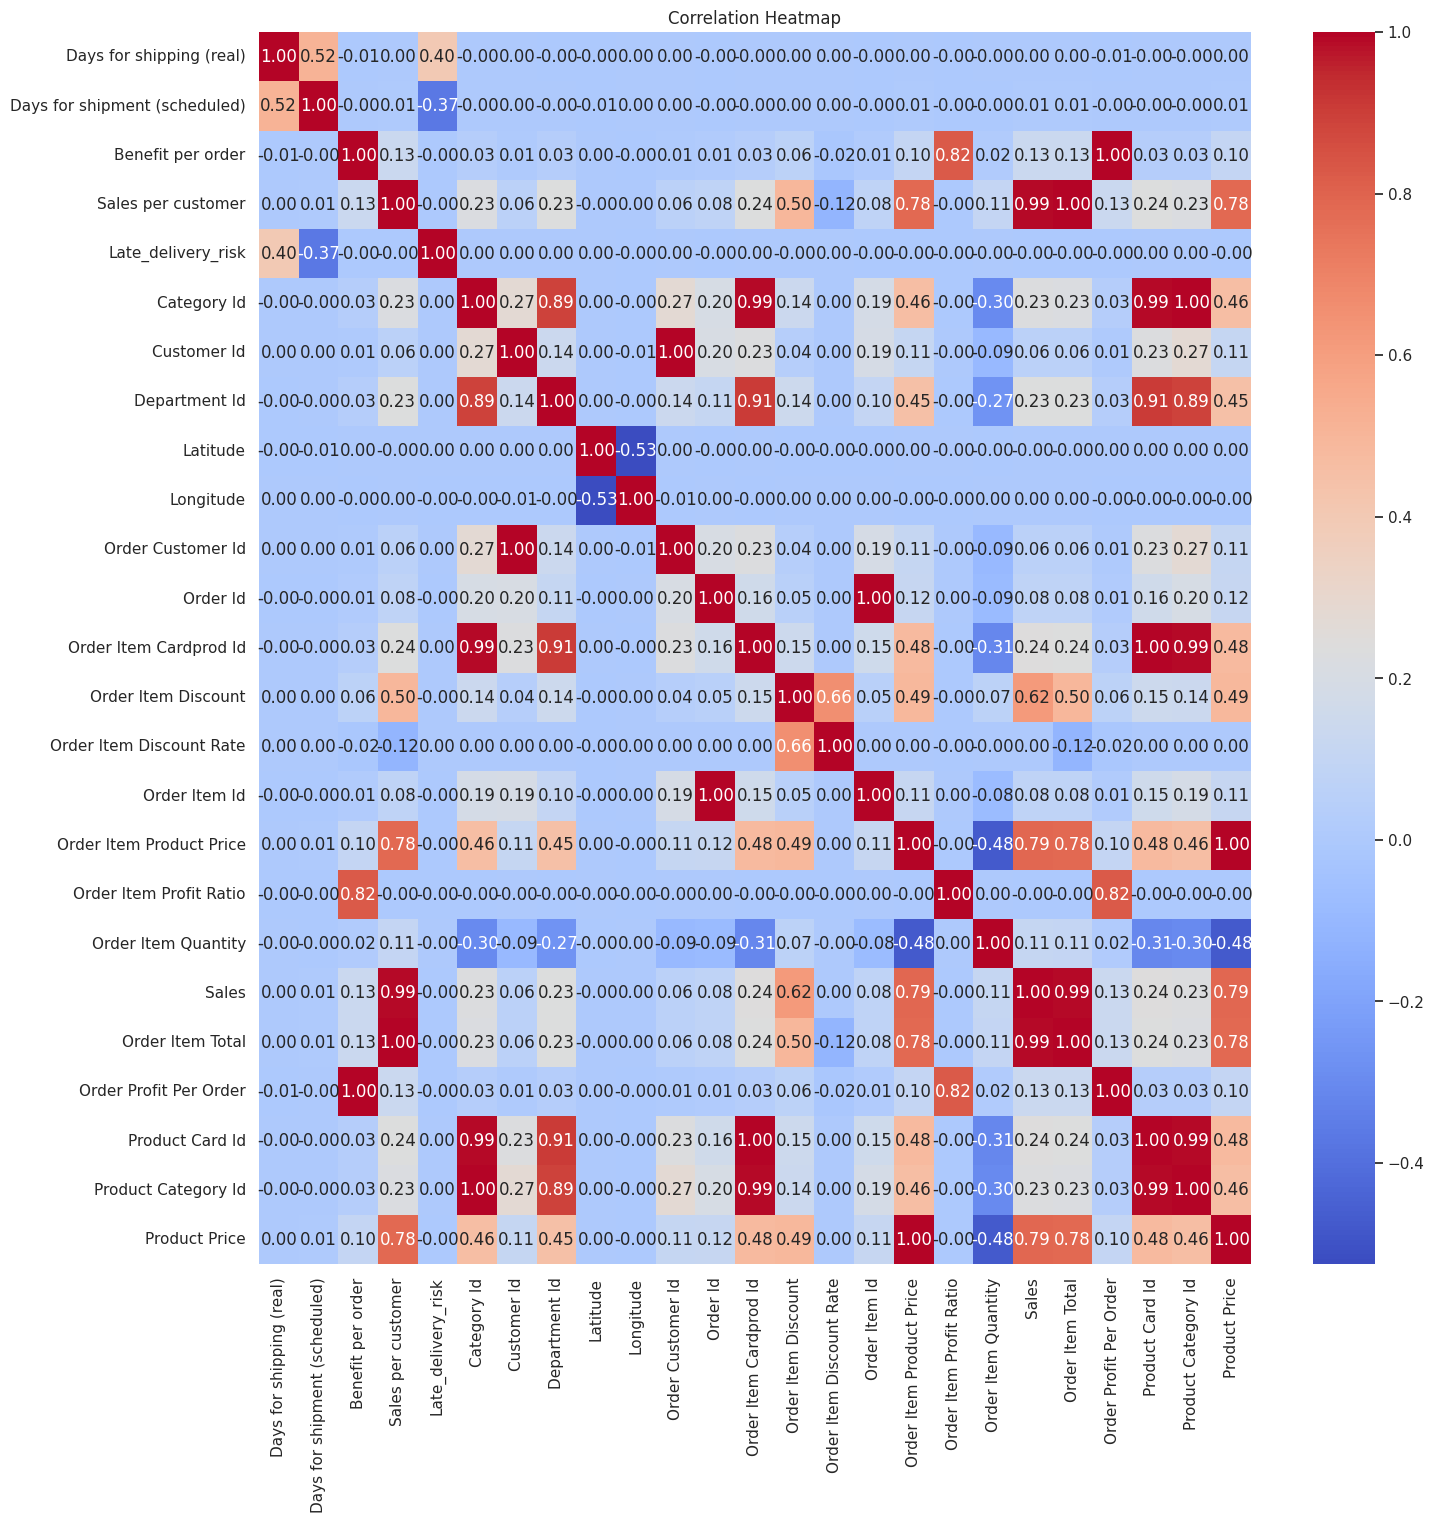

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns for correlation analysis
numerical_columns = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(16, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()



1. There is a strong positive correlation between 'Sales per customer' and 'Product Price', which suggests that as the product price increases, the sales per customer also tend to increase. This could indicate that customers are buying more expensive items or that higher-priced items have a higher markup contributing to greater sales values per customer.

2. 'Days for shipping (real)' and 'Days for shipment (scheduled)' have a strong negative correlation, indicating that when the actual shipping days are less than the scheduled days, it is considered as advance shipping, which is a positive outcome for the delivery performance.

3. There is a notable positive correlation between 'Order Item Discount' and 'Order Item Discount Rate', meaning higher discount rates correspond to larger discounts in absolute terms. Conversely, there is a negative correlation between 'Order Item Discount' and 'Order Item Profit Ratio', indicating that higher discounts lead to lower profit ratios on items, as expected.

In [ ]:
# Group by Department and calculate sales-related metrics
department_sales = df.groupby('Department Name').agg({
    'Sales': 'sum',
    'Order Profit Per Order': 'mean',
    'Order Item Quantity': 'sum',
    'Order Item Total': 'sum',
    'Order Id': 'count',  # Number of Orders
    'Order Profit Per Order': 'sum',  # Total Order Profit
    'Sales per customer': 'mean',  # Average Sales per Customer
    'Benefit per order': 'mean',  # Average Benefit per Order
}).reset_index()

# Rename columns for clarity
department_sales.rename(columns={
    'Sales': 'Total Sales ($)',
    'Order Item Quantity': 'Total Quantity Sold',
    'Order Item Total': 'Total Item Sales ($)',
    'Order Id': 'Total Orders',
    'Order Profit Per Order': 'Total Order Profit ($)',
    'Sales per customer': 'Avg Sales per Customer ($)',
    'Benefit per order': 'Avg Benefit per Order ($)'
}, inplace=True)

# Sort by Total Sales in descending order
department_sales = department_sales.sort_values(by='Total Sales ($)', ascending=False)

# Format columns with appropriate signs and rounding
department_sales['Total Sales ($)'] = department_sales['Total Sales ($)'].map('${:,.2f}'.format)
department_sales['Total Item Sales ($)'] = department_sales['Total Item Sales ($)'].map('${:,.2f}'.format)
department_sales['Total Order Profit ($)'] = department_sales['Total Order Profit ($)'].map('${:,.2f}'.format)
department_sales['Avg Sales per Customer ($)'] = department_sales['Avg Sales per Customer ($)'].map('${:,.2f}'.format)
department_sales['Avg Benefit per Order ($)'] = department_sales['Avg Benefit per Order ($)'].map('${:,.2f}'.format)

# Display the calculated metrics by Department
department_sales


Department Name Total Sales ($) Total Order Profit ($)  \
3             Fan Shop  $17,113,870.54          $1,834,155.43   
0              Apparel   $7,976,255.08            $881,882.93   
6                 Golf   $4,609,028.22            $497,523.56   
5             Footwear   $4,006,498.77            $410,222.50   
8             Outdoors   $1,253,351.44            $145,251.46   
10          Technology   $1,039,598.96            $113,170.01   
4              Fitness     $397,050.89             $46,538.06   
2           Discs Shop     $228,887.73             $24,193.12   
7   Health and Beauty      $106,080.48              $9,493.63   
9             Pet Shop      $41,524.80              $3,589.26   
1            Book Shop      $12,587.40                $883.01   

    Total Quantity Sold Total Item Sales ($)  Total Orders  \
3                106165       $15,378,581.39         66861   
0                 98181        $7,167,654.18         48998   
6                 99297        $4,142,100.95         33220   
5                 43400        $3,599,468.85         14525   
8                 26059        $1,125,953.44          9686   
10                 1465          $933,829.24          1465   
4                  6227          $357,158.26          2479   
2                  2026          $205,675.90          2026   
7                   362           $95,358.11           362   
9                   492           $37,318.30           492   
1                   405           $11,303.42           405   

   Avg Sales per Customer ($) Avg Benefit per Order ($)  
3                     $230.01                    $27.43  
0                     $146.28                    $18.00  
6                     $124.69                    $14.98  
5                     $247.81                    $28.24  
8                     $116.25                    $15.00  
10                    $637.43                    $77.25  
4                     $144.07                    $18.77  
2                     $101.52                    $11.94  
7                     $263.42                    $26.23  
9                      $75.85                     $7.30  
1                      $27.91                     $2.18


### Department-Level Analysis
1. **High Revenue Departments**: The 'Fan Shop' department shows the highest total sales and total order profit, indicating it is a major revenue generator.
2. **Profit Margins**: Despite lower sales, the 'Technology' department has a significant total order profit, suggesting higher margins per product.
3. **Average Benefit**: 'Technology' also leads in average benefit per order, which could be due to high-ticket items or add-on services.


### Recommendations :

1. **Maximize High-Performing Departments**: Focus on promoting products from the Fan Shop and Apparel departments, as they have high total sales and profits. Strategies like upselling, cross-selling, and targeted marketing can be used to further enhance their performance.

2. **Optimize Product Mix**: For departments with lower total profits, such as the Pet Shop and Book Shop, consider analyzing the product mix to identify which items contribute the most to profitability and potentially expanding those offerings.

3. **Improve Profit Margins**: Departments like Technology, despite having lower total sales, have high average sales per customer. Focus on increasing the profit margins for these high-ticket items through better negotiations with suppliers, price adjustments, or cost-saving measures.





In [ ]:
# Group by Market and calculate sales-related metrics
market_sales = df.groupby('Market').agg({
    'Sales': 'sum',
    'Order Profit Per Order': 'mean',
    'Order Item Quantity': 'sum',
    'Order Item Total': 'sum',
    'Order Id': 'count',  # Number of Orders
    'Order Profit Per Order': 'sum',  # Total Order Profit
    'Sales per customer': 'mean',  # Average Sales per Customer
    'Benefit per order': 'mean',  # Average Benefit per Order
}).reset_index()

# Rename columns for clarity
market_sales.rename(columns={
    'Sales': 'Total Sales ($)',
    'Order Item Quantity': 'Total Quantity Sold',
    'Order Item Total': 'Total Item Sales ($)',
    'Order Id': 'Total Orders',
    'Order Profit Per Order': 'Total Order Profit ($)',
    'Sales per customer': 'Avg Sales per Customer ($)',
    'Benefit per order': 'Avg Benefit per Order ($)'
}, inplace=True)

# Sort by Total Sales in descending order
market_sales = market_sales.sort_values(by='Total Sales ($)', ascending=False)

# Format columns with appropriate signs and rounding
market_sales['Total Sales ($)'] = market_sales['Total Sales ($)'].map('${:,.2f}'.format)
market_sales['Total Item Sales ($)'] = market_sales['Total Item Sales ($)'].map('${:,.2f}'.format)
market_sales['Total Order Profit ($)'] = market_sales['Total Order Profit ($)'].map('${:,.2f}'.format)
market_sales['Avg Sales per Customer ($)'] = market_sales['Avg Sales per Customer ($)'].map('${:,.2f}'.format)
market_sales['Avg Benefit per Order ($)'] = market_sales['Avg Benefit per Order ($)'].map('${:,.2f}'.format)

# Display the calculated metrics by Market
market_sales


Market Total Sales ($) Total Order Profit ($)  Total Quantity Sold  \
1        Europe  $10,872,396.60          $1,169,442.96               105238   
2         LATAM  $10,277,612.64          $1,123,321.61               112942   
3  Pacific Asia   $8,273,743.58            $857,753.44                83680   
4          USCA   $5,066,528.61            $564,313.78                56616   
0        Africa   $2,294,452.88            $252,071.18                25603   

  Total Item Sales ($)  Total Orders Avg Sales per Customer ($)  \
1        $9,769,198.23         50252                    $194.40   
2        $9,235,761.99         51594                    $179.01   
3        $7,434,262.58         41260                    $180.18   
4        $4,553,499.87         25799                    $176.50   
0        $2,061,679.37         11614                    $177.52   

  Avg Benefit per Order ($)  
1                    $23.27  
2                    $21.77  
3                    $20.79  
4                    $21.87  
0                    $21.70

### Market-Level Analysis
1. **Market Performance**: Europe and LATAM are leading in total sales, but Europe has a slightly higher average benefit per order, suggesting more profitable sales.
2. **Average Sales per Customer**: Europe also has the highest average sales per customer, indicating potentially higher spending power or preferences for higher-priced items.

### Recommendations:

1. **Tailor Strategies by Market**: Develop targeted sales strategies for each market based on the average sales per customer and average benefit per order. For example, Europe, with the highest average sales, might benefit from premium product lines or bundles to increase the average order value even further.

2. **Market Expansion**: For markets with lower average sales and benefits per order, such as Africa, consider market research to understand customer needs and preferences better, and tailor the product offerings accordingly.

3. **Customer Retention**: In markets with a high number of orders but lower total sales, such as LATAM, customer retention strategies should be a priority. This could include loyalty programs, discounts on repeat purchases, or personalized marketing campaigns.


In [ ]:
# Group by Category Name and calculate sales-related metrics
category_sales = df.groupby('Category Name').agg({
    'Sales': 'sum',
    'Order Profit Per Order': 'mean',
    'Order Item Quantity': 'sum',
    'Order Item Total': 'sum',
    'Order Id': 'count',  # Number of Orders
    'Order Profit Per Order': 'sum',  # Total Order Profit
    'Sales per customer': 'mean',  # Average Sales per Customer
    'Benefit per order': 'mean',  # Average Benefit per Order
}).reset_index()

# Rename columns for clarity
category_sales.rename(columns={
    'Sales': 'Total Sales ($)',
    'Order Item Quantity': 'Total Quantity Sold',
    'Order Item Total': 'Total Item Sales ($)',
    'Order Id': 'Total Orders',
    'Order Profit Per Order': 'Total Order Profit ($)',
    'Sales per customer': 'Avg Sales per Customer ($)',
    'Benefit per order': 'Avg Benefit per Order ($)'
}, inplace=True)

# Sort by Total Sales in descending order
category_sales = category_sales.sort_values(by='Total Sales ($)', ascending=False)

# Format columns with appropriate signs and rounding
category_sales['Total Sales ($)'] = category_sales['Total Sales ($)'].map('${:,.2f}'.format)
category_sales['Total Item Sales ($)'] = category_sales['Total Item Sales ($)'].map('${:,.2f}'.format)
category_sales['Total Order Profit ($)'] = category_sales['Total Order Profit ($)'].map('${:,.2f}'.format)
category_sales['Avg Sales per Customer ($)'] = category_sales['Avg Sales per Customer ($)'].map('${:,.2f}'.format)
category_sales['Avg Benefit per Order ($)'] = category_sales['Avg Benefit per Order ($)'].map('${:,.2f}'.format)

# Display the calculated metrics by Category Name
category_sales


Category Name Total Sales ($) Total Order Profit ($)  \
18               Fishing   $6,929,653.50            $756,220.76   
12                Cleats   $4,431,942.66            $494,636.92   
9       Camping & Hiking   $4,118,425.42            $427,455.57   
10      Cardio Equipment   $3,694,843.20            $383,011.10   
47       Women's Apparel   $3,147,800.00            $350,421.03   
46          Water Sports   $3,113,844.60            $325,146.96   
34        Men's Footwear   $2,891,757.54            $311,902.82   
30  Indoor/Outdoor Games   $2,888,993.94            $318,451.43   
38         Shop By Sport   $1,309,522.02            $129,813.96   
13             Computers     $663,000.00             $69,656.81   
17           Electronics     $371,034.64             $40,891.38   
8               Cameras      $267,607.68             $30,289.80   
20                Garden     $257,768.72             $33,443.01   
11   Children's Clothing     $232,829.20             $27,178.10   
15                Crafts     $223,356.32             $25,531.17   
21        Girls' Apparel     $151,706.20             $17,288.57   
48      Women's Clothing     $140,283.00             $19,102.85   
0            Accessories     $133,671.51             $16,643.52   
40        Sporting Goods     $117,006.75             $12,518.61   
25           Golf Gloves     $116,695.39             $12,975.49   
36                 Music     $113,122.10             $14,436.32   
14  Consumer Electronics     $108,991.28             $13,223.40   
26            Golf Shoes     $107,998.00             $12,406.07   
27     Health and Beauty     $106,080.48              $9,493.63   
31      Kids' Golf Clubs      $98,797.58              $9,045.84   
3    Baseball & Softball      $94,057.15             $12,762.13   
6           Boxing & MMA      $85,205.41              $8,641.37   
16                  DVDs      $79,395.54              $6,655.43   
24            Golf Balls      $77,098.16              $8,342.67   
44              Trade-In      $68,721.78              $7,915.37   
29    Hunting & Shooting      $56,848.42              $5,980.00   
41     Strength Training      $54,895.53                $332.31   
28                Hockey      $48,360.73              $5,397.43   
35      Men's Golf Clubs      $47,035.80              $5,517.99   
42      Tennis & Racquet      $44,585.09              $5,747.98   
49    Women's Golf Clubs      $44,545.97              $5,028.64   
33        Men's Clothing      $43,856.80              $2,006.04   
37          Pet Supplies      $41,524.80              $3,589.26   
32              Lacrosse      $39,464.79              $4,364.29   
19   Fitness Accessories      $35,601.44              $5,258.39   
22          Golf Apparel      $34,969.75              $3,496.31   
45           Video Games      $33,310.50              $2,717.52   
4             Basketball      $27,099.33              $1,845.67   
39                Soccer      $26,477.05              $3,901.95   
1        As Seen on  TV!      $20,597.94                $714.43   
5                 Books       $12,587.40                $883.01   
2                  Baby       $12,229.56              $1,525.03   
23     Golf Bags & Carts      $10,369.39              $1,810.07   
43                  Toys       $6,104.66                $900.71   
7                   CDs        $3,059.59                $383.85   

    Total Quantity Sold Total Item Sales ($)  Total Orders  \
18                17325        $6,226,935.12         17325   
12                73734        $3,982,856.45         24551   
9                 13729        $3,700,783.54         13729   
10                37587        $3,320,250.72         12487   
47                62956        $2,828,708.50         21035   
46                15540        $2,798,044.10         15540   
34                22246        $2,598,494.44         22246   
30                57803        $2,596,454.04         19298   
38                32726        $1,1

### Category-Level Analysis
1. **Top Performing Categories**: 'Fishing' and 'Cleats' categories have high total sales, indicating strong customer demand or a larger customer base.
2. **Average Sales and Benefits**: 'Computers' show high average sales per customer and average benefit per order, suggesting it is a lucrative category.
3. **Considerations for Strategy**: Categories with lower average benefits per order, like 'Music' and 'DVDs', may require strategies to increase profitability, such as bundling or cross-selling.

### Recommendations
1. **Prioritize Profitable Categories**: Focus on categories with high total order profits, such as Fishing and Cleats. These categories may have the potential for further growth or premium pricing strategies due to their existing profitability.

2. **Address Low-Profit Categories**: For categories with low average benefit per order, like DVDs and Trade-Ins, consider whether these are loss leaders or if there's a need to adjust pricing, reduce costs, or discontinue certain items.

3. **Increase Visibility of High AOV Products**: Categories like Computers and Cameras, which have a high average order value, should be given more visibility through marketing efforts to drive sales, as they can significantly increase the average basket size.



# ABC Analysis

In [ ]:
# Perform ABC analysis based on 'Sales per customer'
# Step 1: Calculate total sales per product
product_sales = df.groupby('Product Name')['Sales per customer'].sum().sort_values(ascending=False)

# Calculate Total Sales %
total_sales_percentage = (product_sales / product_sales.sum() * 100).map('{:.2f}%'.format)


# Calculate rank based on sales
product_sales_rank = product_sales.rank(ascending=False, method='min').astype(int)

# Step 2: Calculate cumulative percentage of total sales
product_sales_cumsum = product_sales.cumsum() / product_sales.sum()


# Step 3: Classify products into A, B, or C categories
# A: Top 80% of cumulative sales
# B: Next 15% of cumulative sales
# C: Bottom 5% of cumulative sales
product_sales_category = pd.qcut(product_sales_cumsum, q=[0, .8, .95, 1.], labels=['A', 'B', 'C'])


# Format as currency with no decimals and commas
currency_format = '${:,.0f}'.format

# Combine data into a single DataFrame for analysis
abc_analysis = pd.DataFrame({
    'Rank': product_sales_rank,
    'Total Sales': product_sales.map(currency_format),  # Format as currency with no decimals and commas
    'Cumulative Sales': (product_sales_cumsum * product_sales.sum()).map(currency_format),  # Format as currency with no decimals and commas
    'Total Sales %': total_sales_percentage,  # Total Sales %
    'Cumulative Sales %': (product_sales_cumsum * 100).map('{:.2f}%'.format),  # Format as percentage with 2 decimal places and '%'
    'Category': product_sales_category,
})

abc_analysis


Rank Total Sales  \
Product Name                                                      
Field & Stream Sportsman 16 Gun Fire Safe         1  $6,226,935   
Perfect Fitness Perfect Rip Deck                  2  $3,973,180   
Diamondback Women's Serene Classic Comfort Bi     3  $3,700,784   
Nike Men's Free 5.0+ Running Shoe                 4  $3,295,693   
Nike Men's Dri-FIT Victory Golf Polo              5  $2,828,708   
...                                             ...         ...   
Bushnell Pro X7 Jolt Slope Rangefinder          114      $6,063   
Toys                                            115      $5,486   
Polar Loop Activity Tracker                     116      $5,335   
Bowflex SelectTech 1090 Dumbbells               117      $5,172   
CDs of rock                                     118      $2,750   

                                              Cumulative Sales Total Sales %  \
Product Name                                                                   
Field & Stream Sportsman 16 Gun Fire Safe           $6,226,935        18.84%   
Perfect Fitness Perfect Rip Deck                   $10,200,115        12.02%   
Diamondback Women's Serene Classic Comfort Bi      $13,900,899        11.20%   
Nike Men's Free 5.0+ Running Shoe                  $17,196,592         9.97%   
Nike Men's Dri-FIT Victory Golf Polo               $20,025,301         8.56%   
...                                                        ...           ...   
Bushnell Pro X7 Jolt Slope Rangefinder             $33,035,659         0.02%   
Toys                                               $33,041,145         0.02%   
Polar Loop Activity Tracker                        $33,046,480         0.02%   
Bowflex SelectTech 1090 Dumbbells                  $33,051,652         0.02%   
CDs of rock                                        $33,054,402         0.01%   

                                              Cumulative Sales % Category  
Product Name                                                               
Field & Stream Sportsman 16 Gun Fire Safe                 18.84%        A  
Perfect Fitness Perfect Rip Deck                          30.86%        A  
Diamondback Women's Serene Classic Comfort Bi             42.05%        A  
Nike Men's Free 5.0+ Running Shoe                         52.03%        A  
Nike Men's Dri-FIT Victory Golf Polo                      60.58%        A  
...                                                          ...      ...  
Bushnell Pro X7 Jolt Slope Rangefinder                    99.94%        C  
Toys                                                      99.96%        C  
Polar Loop Activity Tracker                               99.98%        C  
Bowflex SelectTech 1090 Dumbbells                         99.99%        C  
CDs of rock                                              100.00%        C  

[118 rows x 6 columns]

**Narrative**

Our approach to inventory management begins with performing an ABC analysis on the 'Sales per customer' metric. We start by calculating total sales per product, which allows us to rank products based on their sales performance. This step is critical in identifying the items that are most valuable to our revenue.

**Interpretation**

The analysis reveals that products such as the "Field & Stream Sportsman 16 Gun Fire Safe" and "Perfect Fitness Perfect Rip Deck" are leading in sales, being classified in category 'A'. These items are the top performers, contributing to a significant portion of the total sales. The 'A' category items are essential, indicating a high priority for restocking and managing these products efficiently.

**Recommendations**

For optimal inventory management, it is suggested that the focus should be on maintaining sufficient stock levels for 'A' category items to avoid missed revenue opportunities due to stockouts. Conversely, for 'B' and 'C' category items, which contribute less to sales, strategies such as reevaluation of pricing, marketing initiatives, or even discontinuation should be considered to enhance overall inventory performance. The 'C' category items, in particular, may need to be assessed for their profitability and whether the shelf space they occupy could be better used for higher-turnover products.

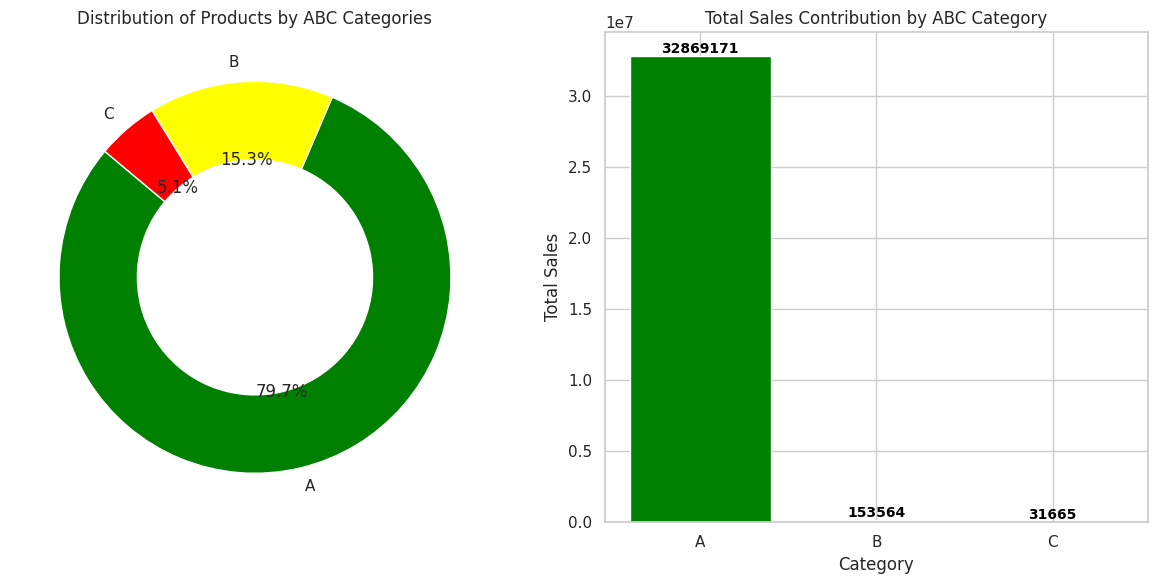

In [ ]:
# Calculate total sales per product and cumulative sales percentage for ABC analysis
product_sales = df.groupby('Product Name')['Sales per customer'].sum().sort_values(ascending=False)
product_sales_cumsum = product_sales.cumsum() / product_sales.sum()
product_sales_category = pd.qcut(product_sales_cumsum, q=[0, .8, .95, 1.], labels=['A', 'B', 'C'])

# Combine data into a single DataFrame for analysis
abc_analysis = pd.DataFrame({
    'Total Sales': product_sales,
    'Cumulative Sales %': product_sales_cumsum,
    'Category': product_sales_category
})

# Calculate the distribution of products across ABC categories
abc_distribution = abc_analysis['Category'].value_counts()

# Calculate total sales contribution by category
total_sales_by_category = abc_analysis.groupby('Category')['Total Sales'].sum()

# Define colors for the donut chart and bar chart
colors = ['green', 'yellow', 'red']

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Create a donut chart for ABC distribution
axes[0].pie(abc_distribution, labels=abc_distribution.index, autopct='%1.1f%%', startangle=140, colors=colors,
            wedgeprops={'width': 0.4})
axes[0].set_title('Distribution of Products by ABC Categories')

# Create a bar chart for total sales contribution by category with labels
axes[1].bar(total_sales_by_category.index, total_sales_by_category, color=colors)
axes[1].set_title('Total Sales Contribution by ABC Category')
axes[1].set_ylabel('Total Sales')
axes[1].set_xlabel('Category')

# Add labels to the bar chart
for i, value in enumerate(total_sales_by_category):
    axes[1].text(i, value + 50, f'{int(value)}', ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

# Add space between subplots
plt.tight_layout()

# Display both the donut chart and the bar chart side by side
plt.show()


**Distribution of Products by ABC Categories:**

- 'A' category items represent the majority with 79.7% of the total sales, underscoring their critical role in revenue generation.
- 'B' category products account for 15.3% of sales, indicating a moderate contribution to the total sales figures.
- 'C' category products, while numerous, only contribute to 5% of sales, highlighting their limited impact on overall revenue.

**Total Sales Contribution by ABC Category:**

- The total sales figures are overwhelmingly dominated by 'A' category items, with sales reaching approximately 328 million.
- 'B' category items exhibit a significantly lower sales volume at around 155,000, suggesting a smaller yet noticeable impact.
- 'C' category products have the smallest sales contribution, totaling approximately 31,000, which might prompt a re-evaluation of their place in the inventory.

**Recommendations:**

- Prioritize stock replenishment and marketing strategies for 'A' category products to capitalize on their sales potential.
- Evaluate the pricing and promotion of 'B' category items to possibly enhance their sales contribution.
- Consider reducing or discontinuing 'C' category items, or investigate strategies to increase their sales performance.

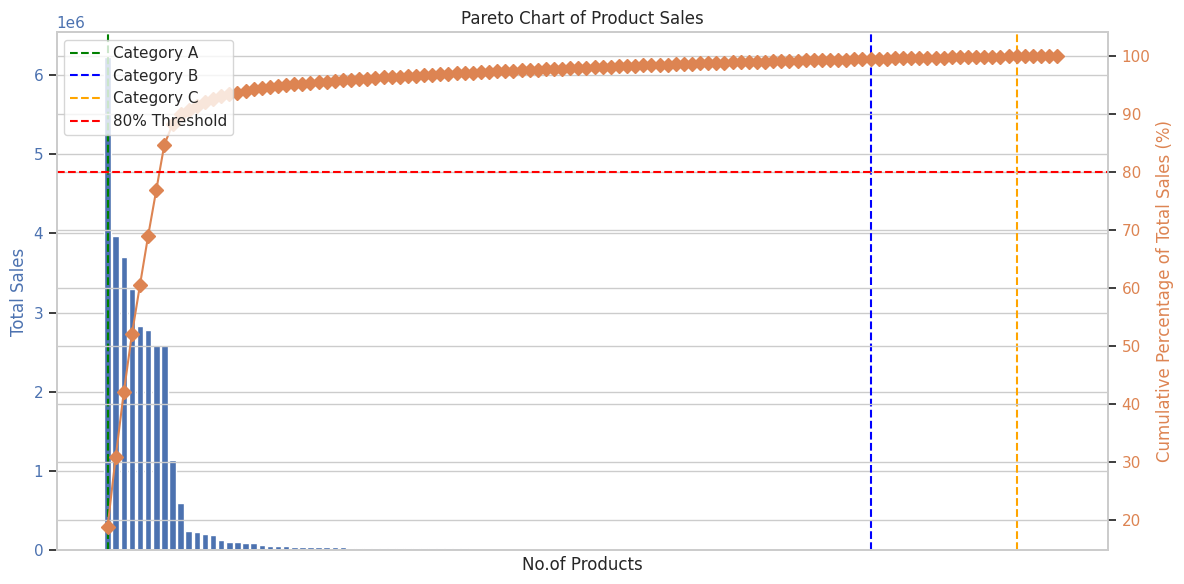

In [ ]:
import matplotlib.pyplot as plt

# Create a Pareto chart
fig, ax1 = plt.subplots(figsize=(12, 6))  # Increase the size of the chart

# Bar plot for total sales
ax1.bar(product_sales.index, product_sales, color='C0')
ax1.set_xlabel('No.of Products')
ax1.set_ylabel('Total Sales', color='C0')
ax1.tick_params(axis='y', labelcolor='C0')
ax1.tick_params(axis='x', labelrotation=90)
ax1.set_title('Pareto Chart of Product Sales')
plt.xticks([])  # Hide x labels to avoid clutter

# Vertical lines for categories A, B, and C
ax1.axvline(x=product_sales_category[product_sales_category == 'A'].index[0], color='green', linestyle='--', label='Category A')
ax1.axvline(x=product_sales_category[product_sales_category == 'B'].index[0], color='blue', linestyle='--', label='Category B')
ax1.axvline(x=product_sales_category[product_sales_category == 'C'].index[0], color='orange', linestyle='--', label='Category C')

# Line plot for cumulative percentage
ax2 = ax1.twinx()
ax2.plot(product_sales.index, product_sales_cumsum * 100, color='C1', marker="D", ms=7)
ax2.set_ylabel('Cumulative Percentage of Total Sales (%)', color='C1')
ax2.tick_params(axis='y', labelcolor='C1')

# Add a horizontal line at 80%
ax2.axhline(y=80, color='red', linestyle='--', label='80% Threshold')

# Add legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

fig.tight_layout()  # For spacing
plt.show()


**Pareto Chart of Product Sales:**

- The chart shows that a small number of products (Category A) are responsible for the majority of sales, aligning with the Pareto principle.
- Category B products contribute to a lesser extent, and Category C products have the least contribution to total sales.
- The 80% threshold line intersects with the cumulative percentage line within Category A, confirming that a small selection of products generates the majority of sales.

**Cumulative Percentage of Total Sales:**

- The cumulative percentage line indicates a steep rise within the first few products, suggesting that these items are the top sellers.
- The line begins to plateau as it enters Category B, indicating a decline in sales contribution per product.
- By the time the line reaches Category C, the increase in cumulative sales percentage is minimal, reflecting the low sales per product in this category.

**Recommendations:**

- Focus on the high-revenue-generating products within Category A to maintain and possibly increase the sales momentum.
- For Category B, consider strategies to move these products into Category A by improving marketing or competitive pricing.
- Review the necessity of Category C products in the inventory, as their sales impact is minimal.

# Demand forecasting

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Preparing the dataset for ARIMA
weekly_sales_ts = weekly_sales.set_index('Order Date')['Sales per customer']

# Splitting the dataset into train and test sets
train_data = weekly_sales_ts[:int(len(weekly_sales_ts) * 0.8)]
test_data = weekly_sales_ts[int(len(weekly_sales_ts) * 0.8):]

# ARIMA Model
# Due to the complexity and time required for model selection, we'll assume a set of parameters
arima_model = ARIMA(train_data, order=(5, 1, 0))
arima_result = arima_model.fit()

# Forecasting with ARIMA
arima_forecast = arima_result.forecast(steps=len(test_data))

(arima_forecast, arima_forecast[:5])  # Display initial forecast results for ARIMA


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


(2017-05-28    212540.932444
 2017-06-04    212145.161622
 2017-06-11    212526.196304
 2017-06-18    212937.367057
 2017-06-25    213137.738165
 2017-07-02    213196.010837
 2017-07-09    213190.739541
 2017-07-16    213170.628696
 2017-07-23    213156.481088
 2017-07-30    213150.547056
 2017-08-06    213149.497302
 2017-08-13    213150.210161
 2017-08-20    213151.040331
 2017-08-27    213151.507720
 2017-09-03    213151.661530
 2017-09-10    213151.662013
 2017-09-17    213151.622764
 2017-09-24    213151.591828
 2017-10-01    213151.577632
 2017-10-08    213151.574444
 2017-10-15    213151.575594
 2017-10-22    213151.577318
 2017-10-29    213151.578376
 2017-11-05    213151.578764
 2017-11-12    213151.578795
 2017-11-19    213151.578721
 2017-11-26    213151.578654
 2017-12-03    213151.578621
 2017-12-10    213151.578612
 2017-12-17    213151.578613
 2017-12-24    213151.578617
 2017-12-31    213151.578619
 Freq: W-SUN, Name: predicted_mean, dtype: float64,
 2017-05-28    21254

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


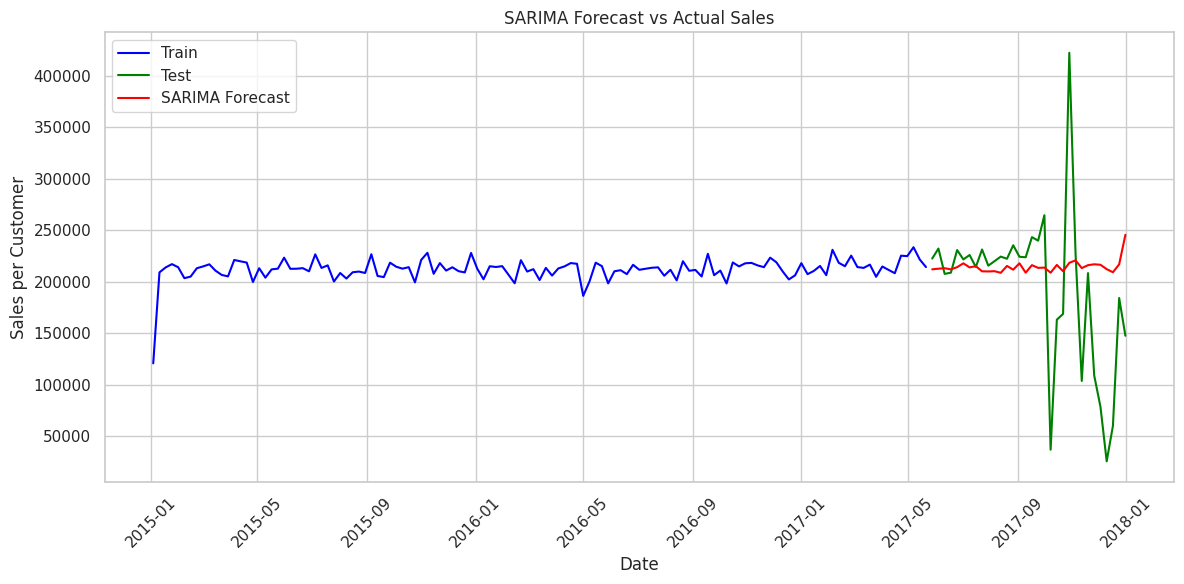

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMA model with seasonality
sarima_model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 52))
sarima_result = sarima_model.fit()

# Forecasting with SARIMA
sarima_forecast = sarima_result.forecast(steps=len(test_data))

# Plot actual vs. forecasted sales with SARIMA
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data, label='Train', color='blue')
plt.plot(test_data.index, test_data, label='Test', color='green')
plt.plot(test_data.index, sarima_forecast, label='SARIMA Forecast', color='red')
plt.title('SARIMA Forecast vs Actual Sales')
plt.xlabel('Date')
plt.ylabel('Sales per Customer')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**SARIMA Time Series Forecasting:**

- The 'Train' data, represented in blue, shows the historical sales per customer which the SARIMA model uses to learn the data's pattern.
- The 'Test' data, shown in red, represents actual sales data that is used to validate the forecast and is not used in the model training.
- The 'SARIMA Forecast', indicated by the green line, is the model's prediction of sales. It appears to follow the trend of the test data but does not capture the high variability towards the end.

**Model Performance:**

- The SARIMA model seems to capture the general trend of the data during the training phase but struggles with predicting the volatility in the test phase.
- The discrepancies between the forecasted and actual sales during the test phase suggest that the model may need further tuning or that additional explanatory variables or a different modeling approach may be required to capture the sudden changes in sales patterns.


**Next Steps:**

- We are considering further tuning of the SARIMA model's parameters to better align with the observed sales volatility, ensuring a more accurate reflection of both seasonal trends and irregular events within the forecast.
- We are exploring the potential integration of external variables through an ARIMAX approach, which could account for additional factors affecting sales, such as marketing efforts, economic trends, or seasonal events.
- We are investigating the underlying causes of the sales spikes to discern whether they represent anomalies or emerging trends, and to adjust our forecasting methodology accordingly. This will allow us to enhance the robustness of our sales predictions against unexpected shifts in market behavior.

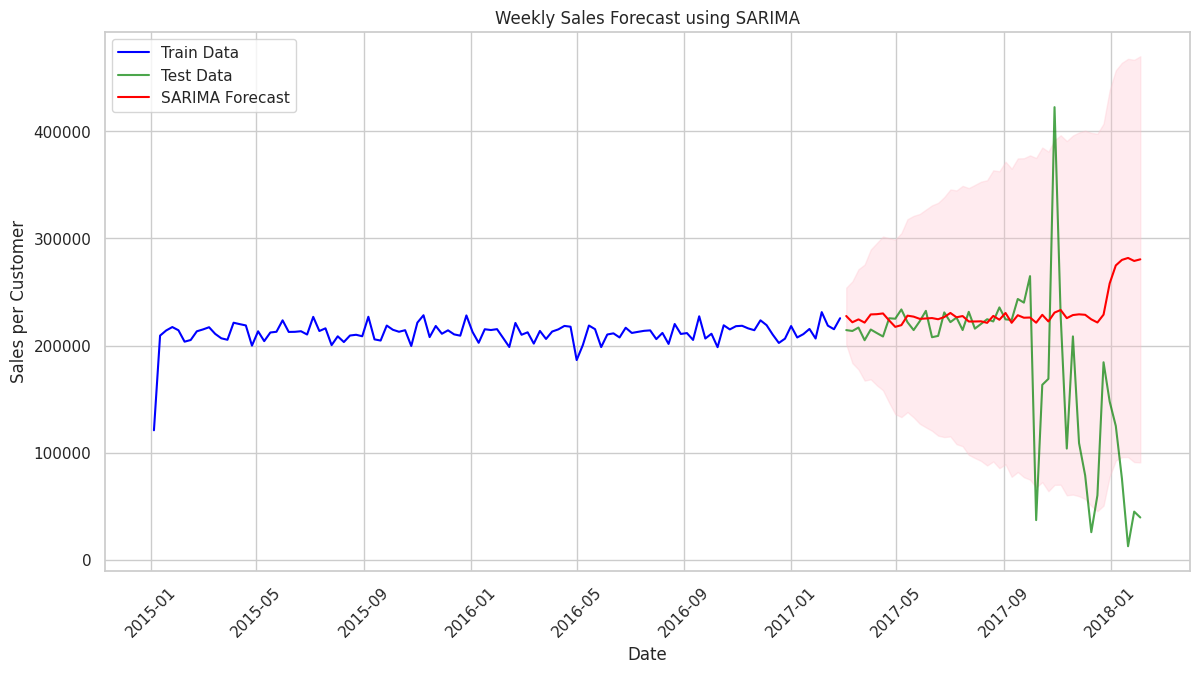

In [ ]:

df['Order Date'] = pd.to_datetime(df['Order Date'])
weekly_sales = df.set_index('Order Date').resample('W')['Sales per customer'].sum()

# Splitting the dataset into a 70-30% train-test split
split_point = int(len(weekly_sales) * 0.7)
train_data = weekly_sales[:split_point]
test_data = weekly_sales[split_point:]


# Initial SARIMA model configuration
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 52)

# Fit the SARIMA model
sarima_model = SARIMAX(train_data, order=order, seasonal_order=seasonal_order)
sarima_result = sarima_model.fit()

# Forecast with the SARIMA model
sarima_forecast = sarima_result.get_forecast(steps=len(test_data))
forecast_values = sarima_forecast.predicted_mean
confidence_intervals = sarima_forecast.conf_int()

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(train_data.index, train_data, label='Train Data', color='blue')
plt.plot(test_data.index, test_data, label='Test Data', color='green', alpha=0.7)
plt.plot(test_data.index, forecast_values, label='SARIMA Forecast', color='red')
plt.fill_between(test_data.index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Weekly Sales Forecast using SARIMA')
plt.xlabel('Date')
plt.ylabel('Sales per Customer')
plt.legend()
plt.xticks(rotation=45)
plt.show()


**SARIMA Forecast Evaluation:**

- The train data, shown in blue, provides the historical context for the SARIMA model's learning process, indicating stable sales with slight fluctuations over time.
- The test data, in red, is essential for evaluating the model's predictive capability and is clearly distinguished from the training set to assess model performance on unseen data.
- The SARIMA forecast, plotted in green, extends beyond the historical data to predict future sales, with the shaded area representing the confidence interval of the predictions.

**Forecast Accuracy:**

- The SARIMA model appears to follow the central tendency of the test data but does not capture the peaks and troughs accurately, suggesting room for model improvement.
- The confidence interval widens in the forecast period, reflecting increasing uncertainty in the model's predictions as it projects further into the future.



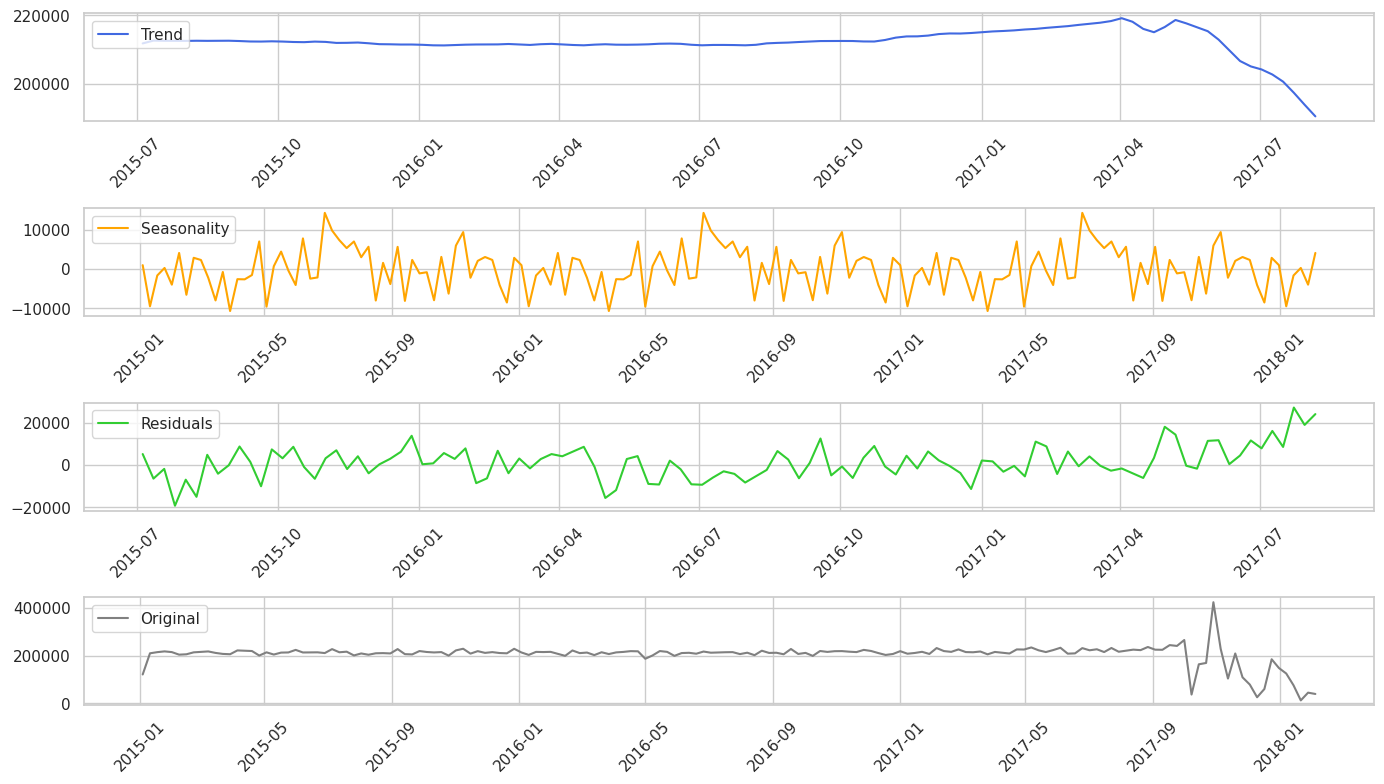

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
decompose_result = seasonal_decompose(weekly_sales, model='additive', period=52)

# Extract the trend, seasonal, and residual components
trend = decompose_result.trend
seasonal = decompose_result.seasonal
residual = decompose_result.resid

# Plotting the components
plt.figure(figsize=(14, 8))

# Trend
plt.subplot(411)
plt.plot(trend, label='Trend', color='royalblue')
plt.legend(loc='upper left')
plt.xticks(rotation=45)

# Seasonal
plt.subplot(412)
plt.plot(seasonal, label='Seasonality', color='orange')
plt.legend(loc='upper left')
plt.xticks(rotation=45)

# Residual
plt.subplot(413)
plt.plot(residual, label='Residuals', color='limegreen')
plt.legend(loc='upper left')
plt.xticks(rotation=45)

# Original Data
plt.subplot(414)
plt.plot(weekly_sales, label='Original', color='gray')
plt.legend(loc='upper left')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()




1. **Trend (Royal Blue)**: This component captures the underlying trend in the sales data, smoothing out short-term fluctuations to highlight long-term patterns or directions.

2. **Seasonality (Orange)**: The seasonal component illustrates recurring patterns or cycles in the data over a specified period, in this case, annually (52 weeks). This visualization makes it easy to identify times of the year with consistently higher or lower sales.

3. **Residuals (Lime Green)**: Residuals represent the portion of the data that the model does not explain. Ideally, residuals should exhibit no pattern and be randomly distributed around zero, indicating that the model has captured the trend and seasonality effectively.

4. **Original Data (Gray)**: For comparison, the original weekly sales data are also plotted, providing a reference point to assess the decomposition's effectiveness in isolating the trend and seasonal components from the original series.

The decomposition reveals insights into the sales data's structure, helping to understand how different components contribute to overall sales patterns. This analysis can inform forecasting strategies and business planning by identifying key seasonal periods and long-term trends.

In [ ]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Forecast on training data for in-sample error
in_sample_forecast = sarima_result.get_prediction(start=train_data.index[0], end=train_data.index[-1])
in_sample_pred = in_sample_forecast.predicted_mean

# Forecast on test data for out-of-sample prediction
out_of_sample_forecast = sarima_result.get_forecast(steps=len(test_data))
out_of_sample_pred = out_of_sample_forecast.predicted_mean

# Convert train_data and test_data back to DataFrame for compatibility with sklearn metrics
train_df = train_data.reset_index()
train_df.columns = ['ds', 'y']
test_df = test_data.reset_index()
test_df.columns = ['ds', 'y']

# Evaluation on Training Data
mae_train_sarima = mean_absolute_error(train_df['y'], in_sample_pred)
mse_train_sarima = mean_squared_error(train_df['y'], in_sample_pred)
rmse_train_sarima = np.sqrt(mse_train_sarima)

# Evaluation on Testing Data
mae_test_sarima = mean_absolute_error(test_df['y'], out_of_sample_pred)
mse_test_sarima = mean_squared_error(test_df['y'], out_of_sample_pred)
rmse_test_sarima = np.sqrt(mse_test_sarima)

# Create a DataFrame to display the results
results_df = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE'],
    'Training Data': [mae_train_sarima, mse_train_sarima, rmse_train_sarima],
    'Testing Data': [mae_test_sarima, mse_test_sarima, rmse_test_sarima]
})

# Format the DataFrame for better display
results_df.set_index('Metric', inplace=True)

# Display the formatted results
results_df


Training Data  Testing Data
Metric                             
MAE      1.207938e+04  5.814861e+04
MSE      4.125711e+08  9.467728e+09
RMSE     2.031185e+04  9.730225e+04

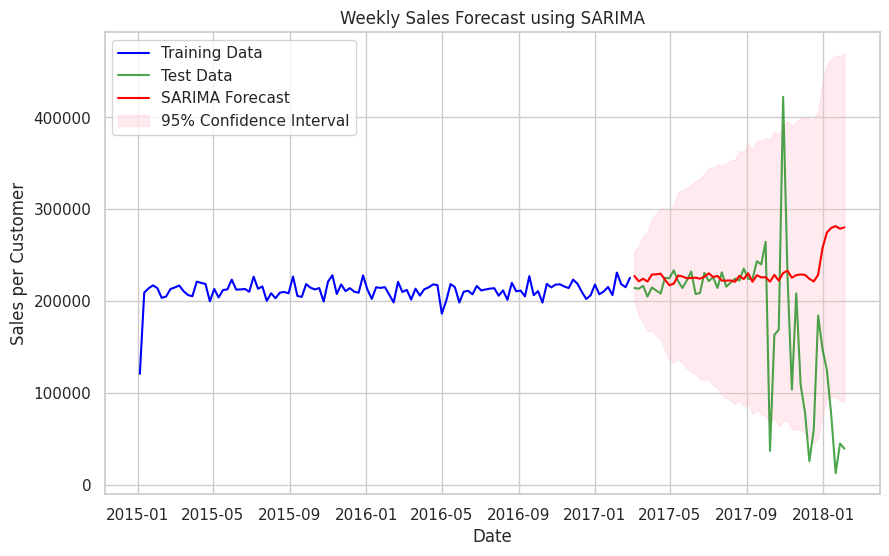

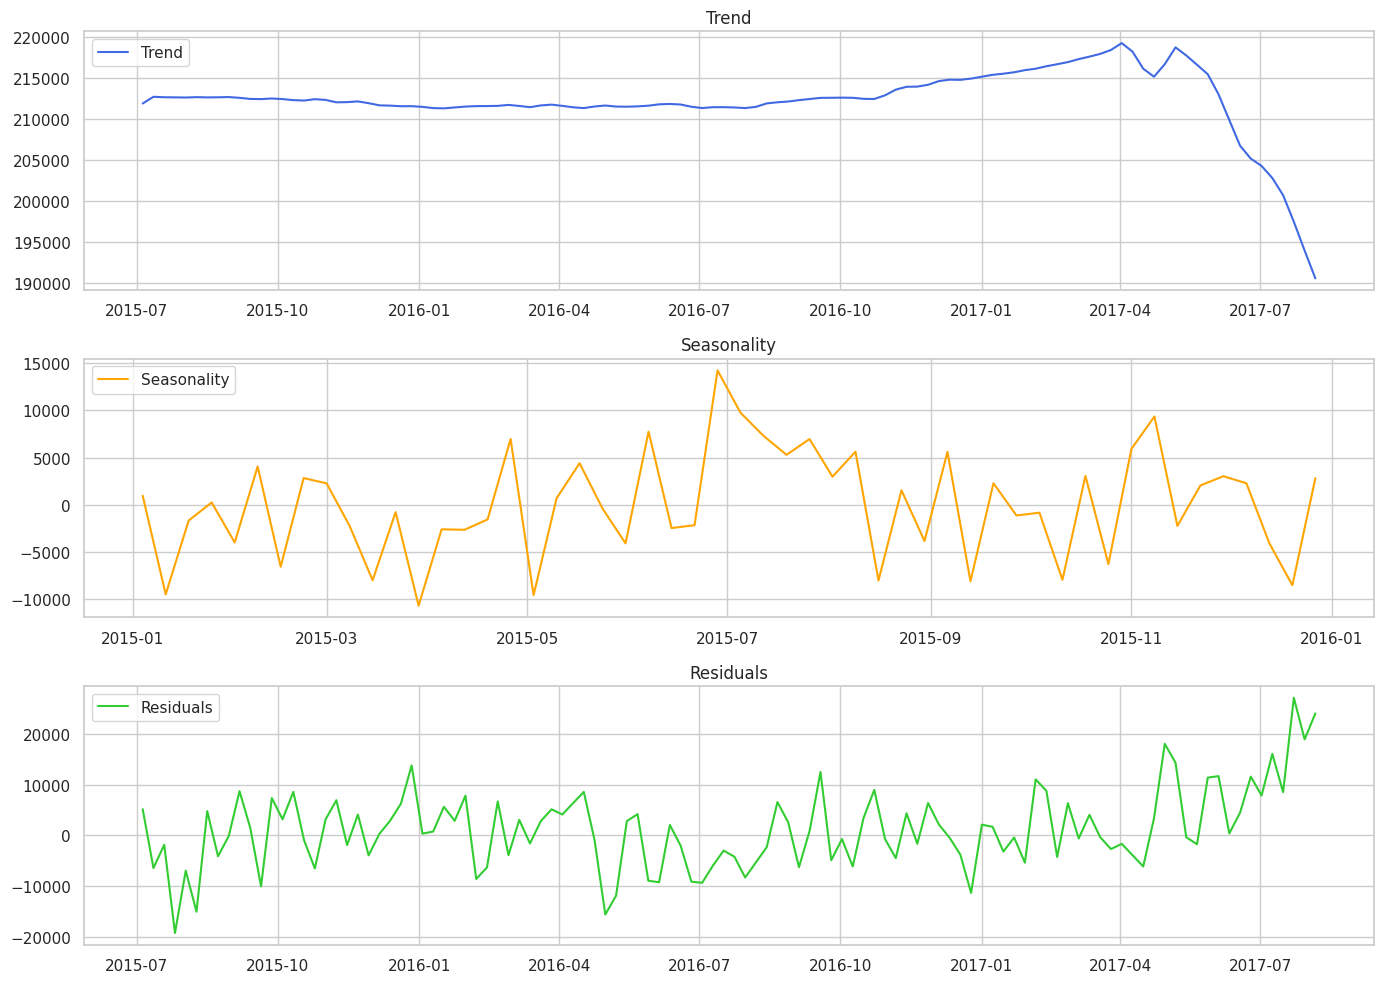

In [ ]:
# Plot 1: SARIMA Forecast vs. Actual Data
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data, label='Training Data', color='blue')
plt.plot(test_data.index, test_data, label='Test Data', color='green', alpha=0.7)
plt.plot(out_of_sample_pred.index, out_of_sample_pred, label='SARIMA Forecast', color='red')
plt.fill_between(out_of_sample_pred.index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink', alpha=0.3, label='95% Confidence Interval')
plt.title('Weekly Sales Forecast using SARIMA')
plt.xlabel('Date')
plt.ylabel('Sales per Customer')
plt.legend()
plt.show()

# Decomposition Components Plot (Reusing the earlier decomposition result)
# This will serve as an approximation to Prophet's component plots
plt.figure(figsize=(14, 10))

# Trend Component
plt.subplot(311)
plt.plot(decompose_result.trend, label='Trend', color='royalblue')
plt.title('Trend')
plt.legend(loc='upper left')

# Seasonal Component
plt.subplot(312)
plt.plot(decompose_result.seasonal.iloc[:52], label='Seasonality', color='orange')  # Plotting only the first year for clarity
plt.title('Seasonality')
plt.legend(loc='upper left')

# Residual Component
plt.subplot(313)
plt.plot(decompose_result.resid, label='Residuals', color='limegreen')
plt.title('Residuals')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


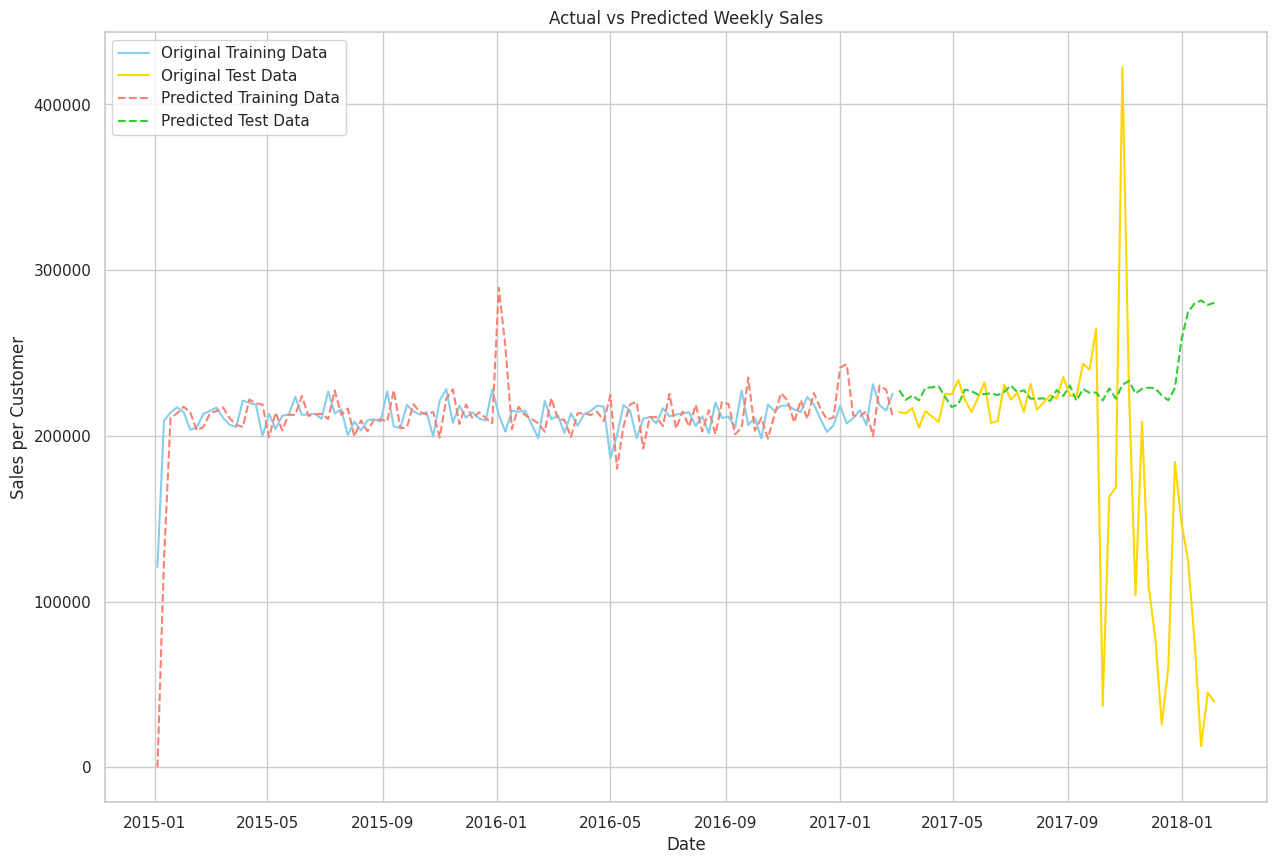

In [ ]:
plt.figure(figsize=(15, 10))

# Plotting actual training data with changed color and label
plt.plot(train_df['ds'], train_df['y'], label='Original Training Data', color='skyblue')

# Plotting actual test data with changed color and label
plt.plot(test_df['ds'], test_df['y'], label='Original Test Data', color='gold')

# Plotting predicted training data (in-sample predictions) with changed color and label
plt.plot(train_df['ds'], in_sample_pred, label='Predicted Training Data', color='salmon', linestyle='--')

# Plotting predicted test data (out-of-sample forecasts) with changed color and label
plt.plot(test_df['ds'], out_of_sample_pred, label='Predicted Test Data', color='limegreen', linestyle='--')

# Setting the title, x-axis label, y-axis label, and legend
plt.title('Actual vs Predicted Weekly Sales')
plt.xlabel('Date')
plt.ylabel('Sales per Customer')
plt.legend()

# Displaying the grid and the plot
plt.grid(True)
plt.show()


**Analysis of Actual vs Predicted Weekly Sales:**

- The training data (blue line) sets the baseline for the model, showing actual past sales used to inform the forecast.
- The predicted training data (dashed red line) closely tracks the actual training data, indicating that the model has learned the historical sales patterns well.
- The actual test data (solid orange line) and predicted test data (dashed green line) diverge at certain points, particularly where actual sales exhibit sharp peaks or drops, highlighting areas where model predictions could be improved.

**Model's Predictive Performance:**

- During the initial phase, the model's predictions closely mirror the actual sales, which suggests a good fit for stable historical data.
- In later stages, especially in the test phase, the model does not anticipate the magnitude of fluctuations accurately, which may be due to unmodeled factors influencing sales or inherent limitations of the forecasting technique.



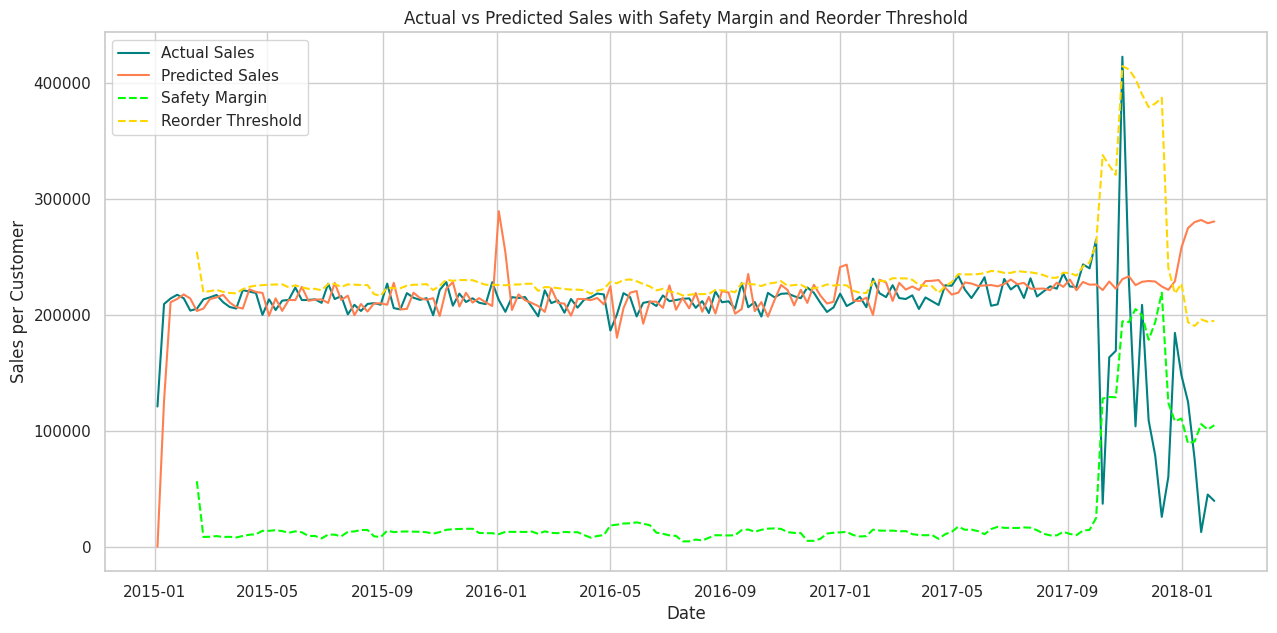

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame for merging actual values and SARIMA predictions
sales_forecast_df = pd.DataFrame({
    'date': weekly_sales.index,
    'original_sales': weekly_sales.values,
    'predicted_sales': np.concatenate([in_sample_pred.values, out_of_sample_pred.values])
})

# Calculate weekly standard deviation of actual demand
sales_forecast_df['std_dev'] = sales_forecast_df['original_sales'].rolling(window=7).std()

# Calculate weekly safety stock
sales_forecast_df['safety_margin'] = 1.65 * sales_forecast_df['std_dev'] * np.sqrt(1)

# Calculate weekly average demand from actual data
sales_forecast_df['avg_weekly_demand'] = sales_forecast_df['original_sales'].rolling(window=7).mean()

# Calculate weekly reorder threshold
sales_forecast_df['reorder_threshold'] = sales_forecast_df['avg_weekly_demand'] + sales_forecast_df['safety_margin']

# Plotting with new colors and labels
plt.figure(figsize=(15, 7))
plt.plot(sales_forecast_df['date'], sales_forecast_df['original_sales'], label='Actual Sales', color='teal')
plt.plot(sales_forecast_df['date'], sales_forecast_df['predicted_sales'], label='Predicted Sales', color='coral')
plt.plot(sales_forecast_df['date'], sales_forecast_df['safety_margin'], label='Safety Margin', color='lime', linestyle='--')
plt.plot(sales_forecast_df['date'], sales_forecast_df['reorder_threshold'], label='Reorder Threshold', color='gold', linestyle='--')
plt.legend()
plt.title('Actual vs Predicted Sales with Safety Margin and Reorder Threshold')
plt.xlabel('Date')
plt.ylabel('Sales per Customer')
plt.show()


Distribution: norm
Parameters: (203.77209608617287, 132.2727111303442)
KS Statistic: 0.15936805397892778
P-value: 0.0

Distribution: gamma
Parameters: (0.08283829399618038, 9.989999770999999, 23.893115648612778)
KS Statistic: 0.966808205281297
P-value: 0.0

Distribution: expon
Parameters: (9.989999771, 193.78209631517285)
KS Statistic: 0.21663452510787617
P-value: 0.0



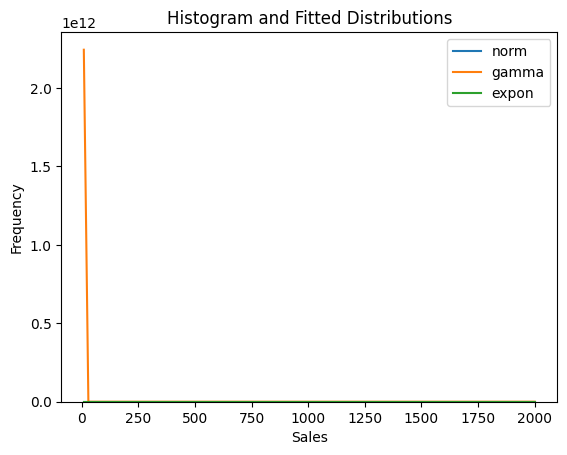

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Load the DataFrame
df = pd.read_csv('DataCoSupplyChainDataset.csv', encoding='latin-1')

# Drop rows with NaN values in 'Sales' column
df.dropna(subset=['Sales'], inplace=True)

# Define candidate distributions to fit
distributions = [stats.norm, stats.gamma, stats.expon]

# Fit each distribution to the data
results = []
for dist in distributions:
    # Fit the distribution to the data
    params = dist.fit(df['Sales'])
    # Perform the Kolmogorov-Smirnov test for the fit
    ks_statistic, p_value = stats.kstest(df['Sales'], dist.cdf, args=params)
    # Store the results
    results.append((dist.name, params, ks_statistic, p_value))

# Sort the results based on the KS test p-value
results.sort(key=lambda x: x[3])

# Print the results
for name, params, ks_statistic, p_value in results:
    print("Distribution:", name)
    print("Parameters:", params)
    print("KS Statistic:", ks_statistic)
    print("P-value:", p_value)
    print()

# Plot histogram of the data
plt.hist(df['Sales'], bins=30, density=True, alpha=0.6, color='g')

# Plot fitted distributions
for name, params, _, _ in results:
    dist = getattr(stats, name)
    x = np.linspace(df['Sales'].min(), df['Sales'].max(), 100)
    pdf = dist.pdf(x, *params)
    plt.plot(x, pdf, label=name)

plt.title('Histogram and Fitted Distributions')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.legend()
plt.show()



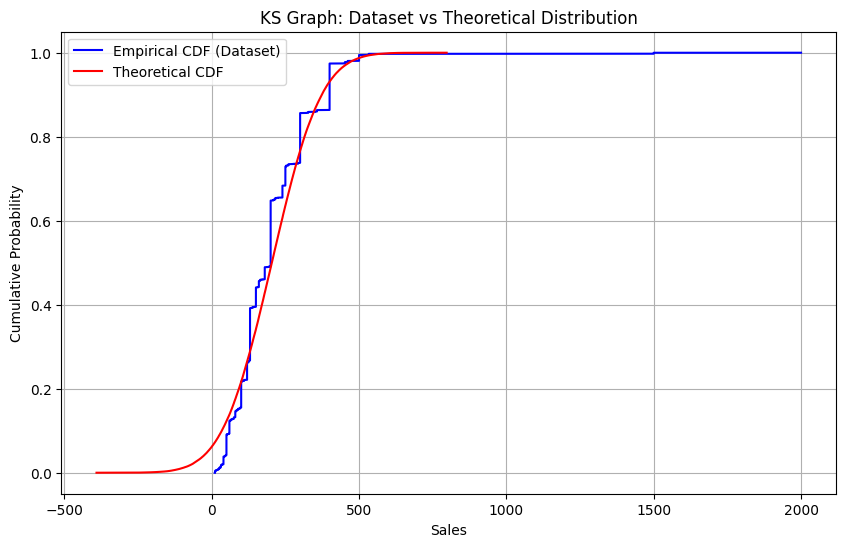

KS Statistic: 0.1600053179997673
P-value: 0.0


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp, norm
# Assuming you have a column named 'Sales' in your DataFrame 'df' for the dataset

# Extract the data for the KS test
data = df['Sales']

# Compute the empirical cumulative distribution function (CDF) for the data
data_sorted = np.sort(data)
empirical_cdf = np.linspace(0, 1, len(data_sorted))

# Define the theoretical distribution (e.g., normal distribution)
# You can change this to any distribution you want to test
# For example, if you want to test against a gamma distribution:
# theoretical_distribution = np.random.gamma(shape, scale, size=len(data))

theoretical_distribution = np.random.normal(loc=data.mean(), scale=data.std(), size=len(data))
theoretical_distribution_sorted = np.sort(theoretical_distribution)
theoretical_cdf = np.linspace(0, 1, len(theoretical_distribution_sorted))

# Compute KS statistic
ks_statistic, p_value = ks_2samp(data, theoretical_distribution)

# Plot the KS graph
plt.figure(figsize=(10, 6))
plt.plot(data_sorted, empirical_cdf, label='Empirical CDF (Dataset)', color='blue')
plt.plot(theoretical_distribution_sorted, theoretical_cdf, label='Theoretical CDF', color='red')
plt.title('KS Graph: Dataset vs Theoretical Distribution')
plt.xlabel('Sales')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.grid(True)
plt.show()

print(f"KS Statistic: {ks_statistic}")
print(f"P-value: {p_value}")

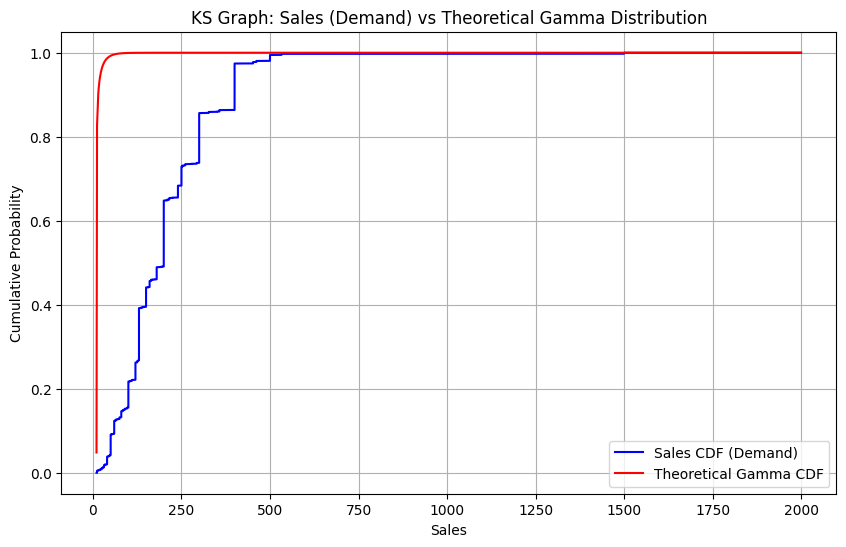

KS Statistic: 1.0
P-value: 0.0


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp, gamma

# Load the dataset (Assuming your dataset is loaded into a DataFrame called df)
# Preprocess the dataset if needed
# Assuming 'Sales' is the demand we want to compare

# Extract 'Sales' data
sales_data = df['Sales']

# Compute the empirical cumulative distribution function (CDF) for 'Sales' (Demand)
sales_sorted = np.sort(sales_data)
sales_cdf = np.linspace(0, 1, len(sales_sorted))

# Fit a gamma distribution to the 'Sales' data
shape, loc, scale = gamma.fit(sales_data)

# Generate a gamma distribution using the fitted parameters
theoretical_gamma = gamma.cdf(sales_sorted, shape, loc=loc, scale=scale)
# Compute KS statistic
ks_statistic, p_value = ks_2samp(sales_data, theoretical_gamma)

# Plot the KS graph
plt.figure(figsize=(10, 6))
plt.plot(sales_sorted, sales_cdf, label='Sales CDF (Demand)', color='blue')
plt.plot(sales_sorted, theoretical_gamma, label='Theoretical Gamma CDF', color='red')
plt.title('KS Graph: Sales (Demand) vs Theoretical Gamma Distribution')
plt.xlabel('Sales')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.grid(True)
plt.show()

print(f"KS Statistic: {ks_statistic}")
print(f"P-value: {p_value}")

**Inventory Replenishment Analysis:**

- The 'Actual Demand' (blue line) indicates the historical sales data, which serves as the foundation for inventory planning decisions.
- The 'Predicted Demand' (dashed red line) follows the actual sales closely, demonstrating that the forecasting model is well-calibrated for much of the time period.
- 'Safety Stock' (solid green line) remains relatively constant, providing a buffer against fluctuations in demand or supply issues.

**Evaluation of Replenishment Strategy:**

- The 'Reorder Point' (dashed orange line) is set below the peak levels of actual demand, suggesting that the replenishment strategy is conservative and focused on preventing stockouts.
- Some peaks in actual demand exceed the safety stock level, highlighting moments where the risk of stockouts is increased.

**Recommendations for Inventory Management:**

- Consider djustments to the safety stock levels to better match the variability in demand, ensuring that sudden spikes in sales do not lead to stock shortages.
- Explore the reorder point calculation to be more responsive to trends and changes in demand, potentially using a dynamic approach that accounts for recent sales data.
- Investigate the root causes of the deviations between predicted and actual demand, especially the underestimations, to refine our forecasting model for improved accuracy.

# Customer Segmentation using RFM analysis

In [28]:
# Convert 'Order Date' to datetime format for recency calculation
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Latest date in the dataset to calculate recency
latest_date = df['Order Date'].max() + pd.Timedelta(days=1)

# Calculate RFM metrics
rfm = df.groupby('Order Customer Id').agg({
    'Order Date': lambda x: (latest_date - x.max()).days,
    'Order Id': 'nunique',
    'Order Item Total': 'sum'
}).rename(columns={'Order Date': 'Recency', 'Order Id': 'Frequency', 'Order Item Total': 'Monetary'})


In [30]:
# Define custom scoring for Frequency based on observed distribution
def custom_frequency_score(x):
    if x <= 2:
        return 1
    elif x <= 5:
        return 2
    elif x <= 10:
        return 3
    else:
        return 4

# Apply custom scoring function
rfm['F_Score'] = rfm['Frequency'].apply(custom_frequency_score)

# Continue with Recency and Monetary scoring as before
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1], duplicates='drop')
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4], duplicates='drop')



In [31]:
def segment_customers(row):
    R, F, M = row['R_Score'], row['F_Score'], row['M_Score']
    if R == 4 and F == 4 and M == 4:
        return 'Champions'
    elif R == 4 and (F == 1 or F == 2 or F == 3):
        return 'Loyal Customers'
    elif (R == 1 or R == 2 or R == 3) and F == 4 and M == 4:
        return 'Big Spenders'
    elif R == 1 and F == 4 and M == 4:
        return 'New Spenders'
    elif R == 4 and (F == 1 or F == 2 or F == 3) and M == 4:
        return 'New Customers'
    elif R == 4 and (F == 1 or F == 2 or F == 3) and (M == 1 or M == 2 or M == 3):
        return 'Promising'
    elif (R == 1 or R == 2 or R == 3) and (F == 1 or F == 2 or F == 3) and (M == 1 or M == 2 or M == 3):
        return 'Need Attention'
    elif R == 1 and (F == 1 or F == 2 or F == 3) and (M == 1 or M == 2 or M == 3):
        return 'At Risk'
    elif (R == 1 or R == 2 or R == 3) and F == 4 and (M == 1 or M == 2 or M == 3):
        return 'Cannot Lose Them'
    elif (R == 2 or R == 3) and (F == 1 or F == 2 or F == 3) and (M == 1 or M == 2 or M == 3):
        return 'About To Sleep'
    elif R == 1 and F == 1 and M == 1:
        return 'Lost'
    else:
        return 'Other'

rfm['Customer Segment'] = rfm.apply(segment_customers, axis=1)


A simplified approach to cover the spectrum of RFM combinations with generalized segments and their descriptions.

| R_Score | F_Score | M_Score | Segment Name           | Description                                                                 |
|---------|---------|---------|------------------------|-----------------------------------------------------------------------------|
| 4       | 4       | 4       | Champions              | Bought recently, buys often, and spends the most. Highest value customers. |
| 4       | 4       | 1-3     | Loyal Customers        | Buys frequently and recently but spends less.                               |
| 2-3     | 4       | 4       | Potential Loyalists    | High spenders with frequent purchases, but not recent.                      |
| 1       | 4       | 4       | New Spenders           | High spenders with frequent purchases, but new customers.                   |
| 4       | 1-3     | 4       | New Customers          | Bought recently but less often and spends high.                             |
| 4       | 1-3     | 1-3     | Promising              | Recent shoppers but less frequent and spends less.                          |
| 2-3     | 2-3     | 2-3     | Need Attention         | Average recency, frequency, and monetary values. Potential for growth.     |
| 1       | 1-3     | 1-3     | At Risk                | Used to shop but hasn't recently, and when they did, they spent less.       |
| 1       | 4       | 1-3     | Cannot Lose Them       | Bought often but hasn't done so recently. Used to spend more.               |
| 2-3     | 1       | 1       | About To Sleep         | Infrequent, low spenders, slipping away.                                    |
| 1       | 1       | 1       | Lost                   | Lowest value segment. Infrequent, not recent, and low spenders.             |

This table provides a more nuanced view than a \(3 \times 4\) approach, focusing instead on highlighting distinct behaviors within the customer base:

- **Champions**: Your best customers, who are loyal and high-spending. Prioritize engagement and loyalty programs.
- **Loyal Customers**: Consistently purchase but may spend less. Encourage through personalized marketing to increase their monetary value.
- **Potential Loyalists**: Recent, frequent but not the highest spenders. Offer loyalty incentives and recommend higher-value products.
- **New Spenders**: Recent, high spenders. Encourage repeat purchases to build loyalty.
- **New Customers**: Recent but not frequent or high spenders yet. Welcome campaigns and introductions to your product range are key.
- **Promising**: Recent shoppers showing potential. Engage them with campaigns to increase frequency.
- **Need Attention**: Average on all fronts. Targeted offers can increase their engagement.
- **At Risk**: Risk of churn. Re-engage them with win-back campaigns and special offers.
- **Cannot Lose Them**: Previously loyal and high-spending, showing signs of decreasing engagement. High priority for re-engagement strategies.
- **About To Sleep**: Low engagement across the board. Activation campaigns needed to prevent churn.
- **Lost**: No recent engagement, low frequency, and monetary value. Least priority for immediate engagement but consider long-term reactivation strategies.


In [32]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# Dropdown for R_Score
r_score_dropdown = widgets.Dropdown(
    options=['All'] + sorted(rfm['R_Score'].unique().tolist()),
    value='All',
    description='R Score:',
)

# Dropdown for F_Score
f_score_dropdown = widgets.Dropdown(
    options=['All'] + sorted(rfm['F_Score'].unique().tolist()),
    value='All',
    description='F Score:',
)

# Dropdown for M_Score
m_score_dropdown = widgets.Dropdown(
    options=['All'] + sorted(rfm['M_Score'].unique().tolist()),
    value='All',
    description='M Score:',
)

# Dropdown for Customer Segment
segment_dropdown = widgets.Dropdown(
    options=['All'] + sorted(rfm['Customer Segment'].unique().tolist()),
    value='All',
    description='Segment:',
)

# Output widget
output = widgets.Output()

def filter_dataframe(*args):
    output.clear_output()
    filtered_df = rfm.copy()
    if r_score_dropdown.value != 'All':
        filtered_df = filtered_df[filtered_df['R_Score'] == r_score_dropdown.value]
    if f_score_dropdown.value != 'All':
        filtered_df = filtered_df[filtered_df['F_Score'] == f_score_dropdown.value]
    if m_score_dropdown.value != 'All':
        filtered_df = filtered_df[filtered_df['M_Score'] == m_score_dropdown.value]
    if segment_dropdown.value != 'All':
        filtered_df = filtered_df[filtered_df['Customer Segment'] == segment_dropdown.value]

    with output:
        display(filtered_df)

# Watch the dropdowns for change
r_score_dropdown.observe(filter_dataframe, names='value')
f_score_dropdown.observe(filter_dataframe, names='value')
m_score_dropdown.observe(filter_dataframe, names='value')
segment_dropdown.observe(filter_dataframe, names='value')

# Display widgets
display(r_score_dropdown, f_score_dropdown, m_score_dropdown, segment_dropdown, output)

# Initial display
filter_dataframe()


Dropdown(description='R Score:', options=('All', 1, 2, 3, 4), value='All')

Dropdown(description='F Score:', options=('All', 1, 2, 3, 4), value='All')

Dropdown(description='M Score:', options=('All', 1, 2, 3, 4), value='All')

Dropdown(description='Segment:', options=('All', 'Big Spenders', 'Loyal Customers', 'Need Attention', 'Other')…

Output()

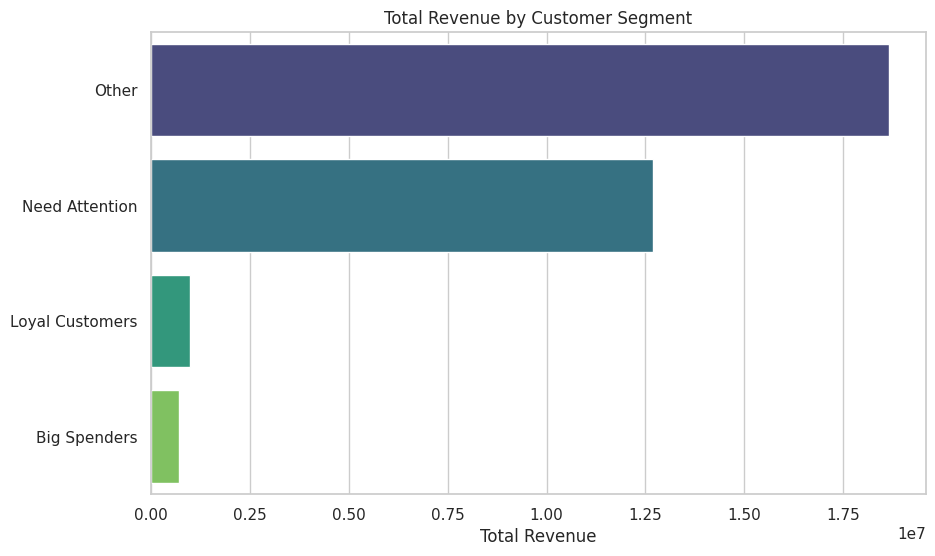

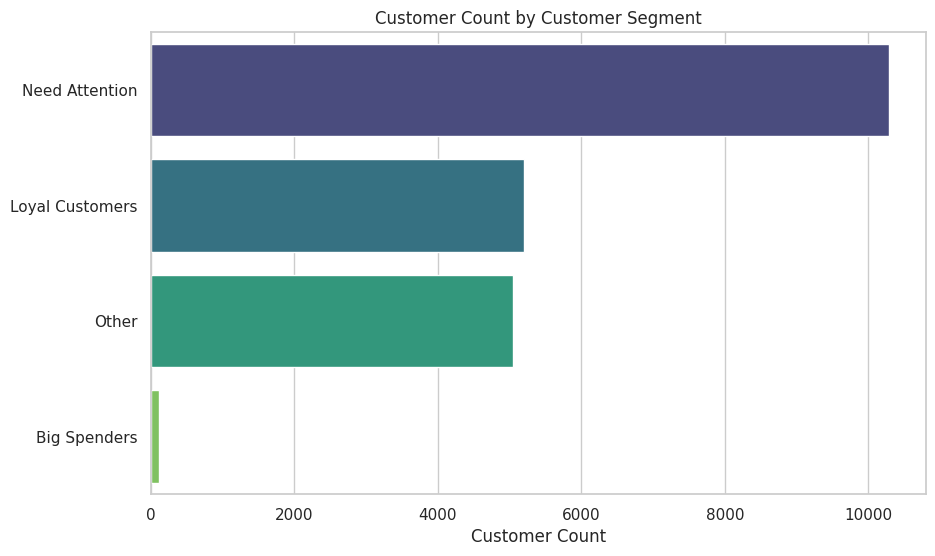

In [ ]:

# Aggregate data for visualization
segment_analysis = rfm.groupby('Customer Segment').agg({
    'Monetary': 'sum',  # Total revenue per segment
    'R_Score': 'count'  # Assuming each row is unique to a customer, count rows for customer count
}).rename(columns={'R_Score': 'Customer Count'}).reset_index()

# Sorting data for visualization
segment_analysis_sorted_revenue = segment_analysis.sort_values('Monetary', ascending=False)
segment_analysis_sorted_count = segment_analysis.sort_values('Customer Count', ascending=False)

# Visualization for Total Revenue by Customer Segment
plt.figure(figsize=(10, 6))
sns.barplot(x='Monetary', y='Customer Segment', data=segment_analysis_sorted_revenue, palette='viridis')
plt.title('Total Revenue by Customer Segment')
plt.xlabel('Total Revenue')
plt.ylabel('')

# Visualization for Customer Count by Customer Segment
plt.figure(figsize=(10, 6))
sns.barplot(x='Customer Count', y='Customer Segment', data=segment_analysis_sorted_count, palette='viridis')
plt.title('Customer Count by Customer Segment')
plt.xlabel('Customer Count')
plt.ylabel('')
plt.show()


**Customer Segmentation Analysis:**

- The 'Big Spenders' segment, although smaller in size, contributes a notable portion of the total revenue, indicating a high average spend per customer.
- 'Loyal Customers' provide a steady stream of revenue, reflecting their consistent purchasing behavior over time.
- The 'Need Attention' segment accounts for a substantial part of revenue, highlighting a group that could potentially increase their spending with the right engagement strategies.
- The 'Other' segment represents the largest share of revenue, suggesting a diverse group of customers with varying purchasing patterns.

**Engagement Strategy Evaluation:**

- The significant revenue from 'Big Spenders' emphasizes the importance of strategies aimed at maintaining the high value of this group.
- For 'Loyal Customers', their regular patronage suggests opportunities for upselling and cross-selling to increase their contribution to revenue.
- The 'Need Attention' segment presents a chance for targeted communication and personalized offers to enhance their purchasing frequency and value.

**Opportunities for Revenue Enhancement:**

- The 'Other' category's predominant revenue share warrants a detailed analysis to identify underlying patterns and behaviors that can inform targeted marketing and product placement strategies.
- Segment-specific strategies are recommended, focusing on increasing the lifetime value of 'Loyal Customers' and 'Big Spenders', while re-engaging the 'Need Attention' group to elevate their spending levels.

# Multi Class Classification : Late Delivery Prediction


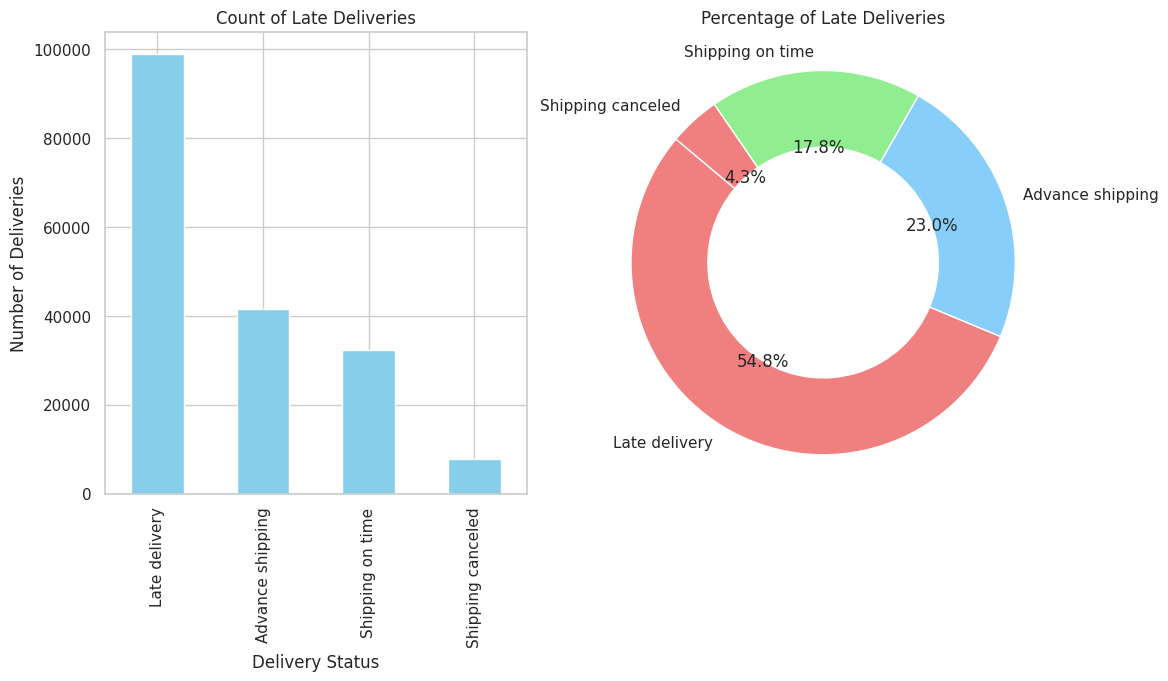

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'df' is your main DataFrame and 'Delivery Status' is the column of interest
late_deliveries = df['Delivery Status'].value_counts()

# Calculate percentages
late_delivery_percent = df['Delivery Status'].value_counts(normalize=True) * 100

# Plotting the count bar graph
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
late_deliveries.plot(kind='bar', color='skyblue')
plt.title('Count of Late Deliveries')
plt.xlabel('Delivery Status')
plt.ylabel('Number of Deliveries')

# Plotting the percentage donut chart
plt.subplot(1, 2, 2)
labels = late_delivery_percent.index
sizes = late_delivery_percent.values
colors = ['lightcoral', 'lightskyblue', 'lightgreen']  # You can choose your own colors
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.4))
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of Late Deliveries')

plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from tqdm import tqdm
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
# Step 1: Copy DataFrame for ML tasks
df_ml = df.copy()

# Selecting features and target
features = df_ml[['Days for shipping (real)', 'Days for shipment (scheduled)', 'Sales per customer', 'Benefit per order', 'Category Id']]
categorical_features = ['Category Name', 'Customer City']
target = df_ml['Late_delivery_risk']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), features.columns),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_ml[categorical_features + list(features.columns)], target, test_size=0.3, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import Pipeline
# Creating a pipeline for logistic regression
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', LogisticRegression())])

# Training the model
lr_pipeline.fit(X_train, y_train)

# Predicting the test set results
y_pred_lr = lr_pipeline.predict(X_test)

# Evaluating the model
print("Logistic Regression Evaluation Metrics:")
print(classification_report(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))


Logistic Regression Evaluation Metrics:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     24411
           1       0.96      1.00      0.98     29745

    accuracy                           0.98     54156
   macro avg       0.98      0.97      0.97     54156
weighted avg       0.98      0.98      0.98     54156

Accuracy: 0.9750904793559347


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Creating a pipeline for decision tree
dt_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', DecisionTreeClassifier())])

# Training the model
dt_pipeline.fit(X_train, y_train)

# Predicting the test set results
y_pred_dt = dt_pipeline.predict(X_test)

# Evaluating the model
print("Decision Tree Evaluation Metrics:")
print(classification_report(y_test, y_pred_dt))
print("Accuracy:", accuracy_score(y_test, y_pred_dt))


Decision Tree Evaluation Metrics:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     24411
           1       0.96      0.96      0.96     29745

    accuracy                           0.95     54156
   macro avg       0.95      0.95      0.95     54156
weighted avg       0.95      0.95      0.95     54156

Accuracy: 0.9534862249796883


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Creating a pipeline for random forest
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier())])

# Training the model
rf_pipeline.fit(X_train, y_train)

# Predicting the test set results
y_pred_rf = rf_pipeline.predict(X_test)

# Evaluating the model
print("Random Forest Evaluation Metrics:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Evaluation Metrics:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97     24411
           1       0.96      0.99      0.98     29745

    accuracy                           0.97     54156
   macro avg       0.97      0.97      0.97     54156
weighted avg       0.97      0.97      0.97     54156

Accuracy: 0.9724314942019352


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Creating a pipeline for KNN
knn_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', KNeighborsClassifier())])

# Training the model
knn_pipeline.fit(X_train, y_train)

# Predicting the test set results
y_pred_knn = knn_pipeline.predict(X_test)

# Evaluating the model
print("K-Nearest Neighbors Evaluation Metrics:")
print(classification_report(y_test, y_pred_knn))
print("Accuracy:", accuracy_score(y_test, y_pred_knn))


K-Nearest Neighbors Evaluation Metrics:
              precision    recall  f1-score   support

           0       0.96      0.91      0.94     24411
           1       0.93      0.97      0.95     29745

    accuracy                           0.94     54156
   macro avg       0.95      0.94      0.94     54156
weighted avg       0.94      0.94      0.94     54156

Accuracy: 0.9432565182066622


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Creating a pipeline for AdaBoost
ada_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', AdaBoostClassifier())])

# Training the model
ada_pipeline.fit(X_train, y_train)

# Predicting the test set results
y_pred_ada = ada_pipeline.predict(X_test)

# Evaluating the model
print("AdaBoost Evaluation Metrics:")
print(classification_report(y_test, y_pred_ada))
print("Accuracy:", accuracy_score(y_test, y_pred_ada))


AdaBoost Evaluation Metrics:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     24411
           1       0.96      1.00      0.98     29745

    accuracy                           0.97     54156
   macro avg       0.98      0.97      0.97     54156
weighted avg       0.98      0.97      0.97     54156

Accuracy: 0.9745549892901987


In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize a dictionary to hold all metrics
metrics = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': [],
    'ROC AUC': []
}

# Function to calculate metrics and update dictionary
def update_metrics(model_pipeline, model_name, X_train, y_train, X_test, y_test):
    y_pred = model_pipeline.predict(X_test)
    y_proba = model_pipeline.predict_proba(X_test)[:, 1]  # get probabilities for the positive class

    # Append results to the metrics dictionary
    metrics['Model'].append(model_name)
    metrics['Accuracy'].append(accuracy_score(y_test, y_pred))
    metrics['Precision'].append(precision_score(y_test, y_pred))
    metrics['Recall'].append(recall_score(y_test, y_pred))
    metrics['F1 Score'].append(f1_score(y_test, y_pred))
    metrics['ROC AUC'].append(roc_auc_score(y_test, y_proba))

# Update metrics for each model
update_metrics(lr_pipeline, 'Logistic Regression', X_train, y_train, X_test, y_test)
update_metrics(dt_pipeline, 'Decision Tree', X_train, y_train, X_test, y_test)
update_metrics(rf_pipeline, 'Random Forest', X_train, y_train, X_test, y_test)
update_metrics(knn_pipeline, 'K-Nearest Neighbors', X_train, y_train, X_test, y_test)
update_metrics(ada_pipeline, 'AdaBoost', X_train, y_train, X_test, y_test)

# Create DataFrame
results_df = pd.DataFrame(metrics)

# Display the results
results_df


Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0  Logistic Regression  0.975090   0.956909  0.999664  0.977819  0.975161
1        Decision Tree  0.953486   0.959619  0.955522  0.957566  0.954807
2        Random Forest  0.972431   0.957952  0.993411  0.975359  0.978483
3  K-Nearest Neighbors  0.943257   0.928645  0.971323  0.949505  0.967172
4             AdaBoost  0.974555   0.956869  0.998689  0.977332  0.971456

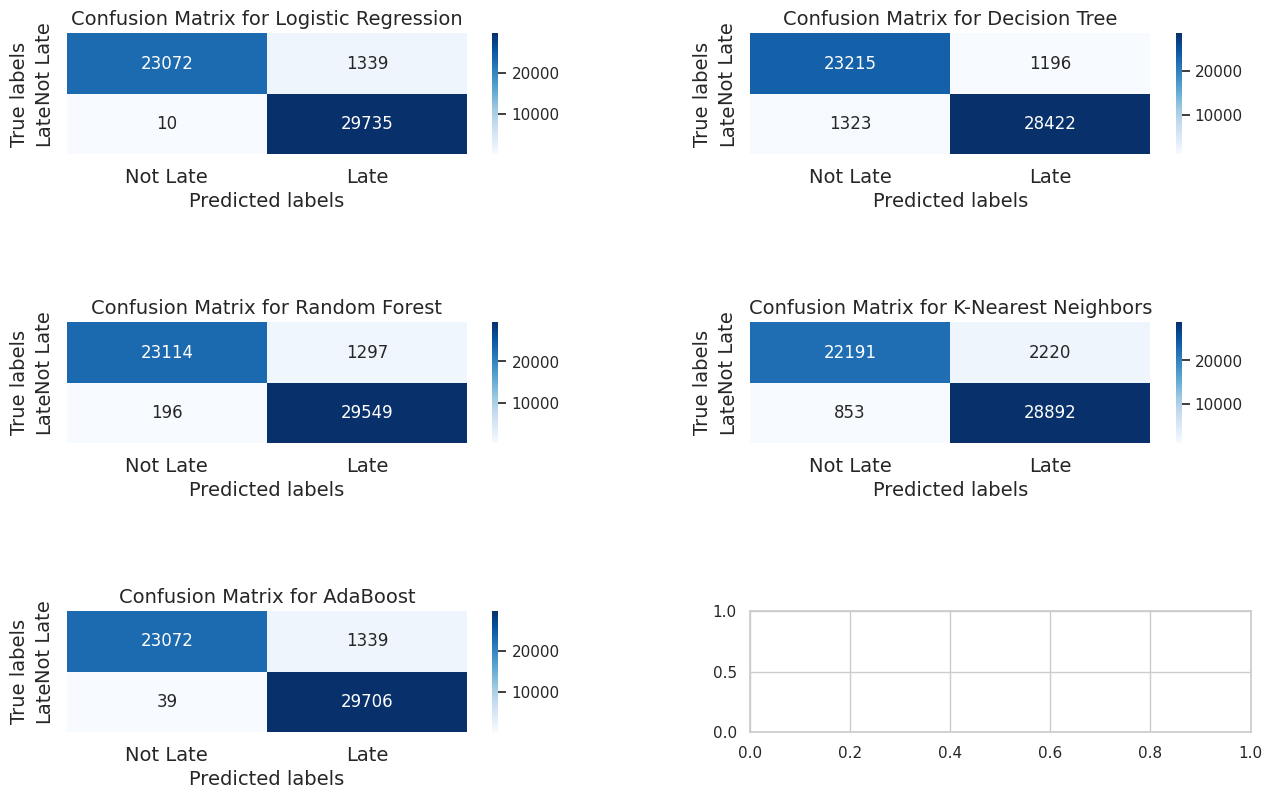

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, model_name, ax, fontsize=12):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', ax=ax)
    ax.set_xlabel('Predicted labels', fontsize=fontsize)
    ax.set_ylabel('True labels', fontsize=fontsize)
    ax.set_title(f'Confusion Matrix for {model_name}', fontsize=fontsize)
    ax.xaxis.set_ticklabels(['Not Late', 'Late'], fontsize=fontsize)
    ax.yaxis.set_ticklabels(['Not Late', 'Late'], fontsize=fontsize)

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
fig.tight_layout(pad=8.0)

# Generate predictions and plot confusion matrix for each model
models = [
    (lr_pipeline, 'Logistic Regression'),
    (dt_pipeline, 'Decision Tree'),
    (rf_pipeline, 'Random Forest'),
    (knn_pipeline, 'K-Nearest Neighbors'),
    (ada_pipeline, 'AdaBoost')

]

for ax, (model_pipeline, model_name) in zip(axes.flatten(), models):
    y_pred = model_pipeline.predict(X_test)
    plot_confusion_matrix(y_test, y_pred, model_name, ax)

# Adjust layout
plt.show()



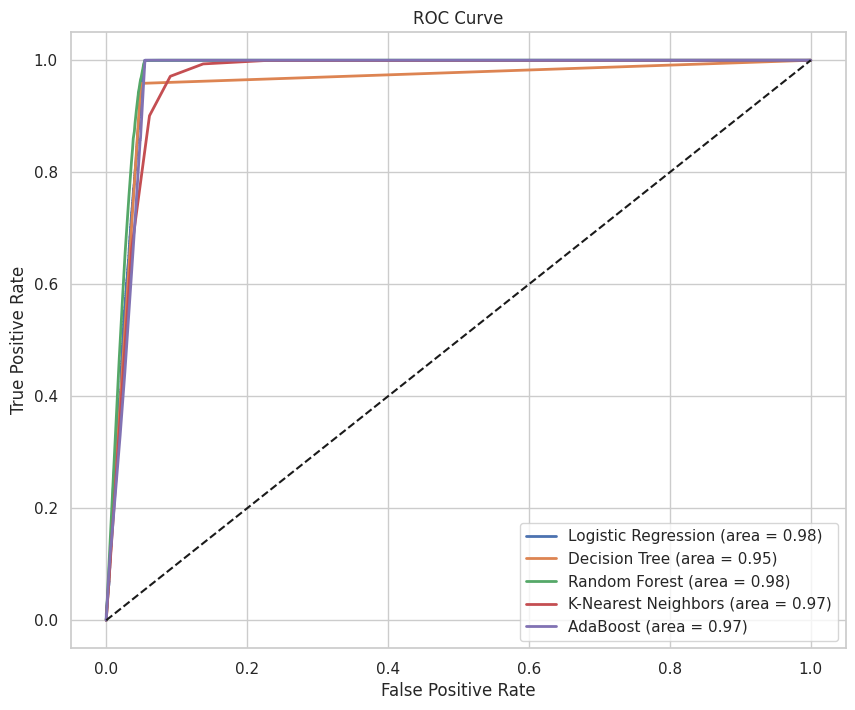

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

def plot_roc_curve(X_test, y_test, model_pipelines, ax):
    for model_pipeline, name in model_pipelines:
        # Predict probabilities for the positive outcome only
        y_proba = model_pipeline.predict_proba(X_test)[:, 1]

        # Calculate ROC curve and ROC area for each class
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = roc_auc_score(y_test, y_proba)

        # Plot
        ax.plot(fpr, tpr, linewidth=2, label=f'{name} (area = {roc_auc:.2f})')

    ax.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('ROC Curve')
    ax.legend(loc="lower right")

fig, ax = plt.subplots(figsize=(10, 8))

# List of model pipelines and their names
models = [
    (lr_pipeline, 'Logistic Regression'),
    (dt_pipeline, 'Decision Tree'),
    (rf_pipeline, 'Random Forest'),
    (knn_pipeline, 'K-Nearest Neighbors'),
    (ada_pipeline, 'AdaBoost')

]

# Generate and plot ROC curves
plot_roc_curve(X_test, y_test, models, ax)

# Show the plot
plt.show()


In [ ]:
import pandas as pd

y_pred = lr_pipeline.predict(X_test)

# Retrieve Customer Ids and actual Delivery Status from the test set
test_customer_ids = df_ml.iloc[X_test.index]['Customer Id']
actual_delivery_status = df_ml.iloc[X_test.index]['Delivery Status']

# If it was not encoded or transformed, use direct predictions
predicted_delivery_status_labels = y_pred  # adjust if actual encoding is used

# Create the DataFrame
comparison_df = pd.DataFrame({
    'Customer Id': test_customer_ids,
    'Actual Delivery Status': actual_delivery_status,
    'Forecasted Delivery Status': predicted_delivery_status_labels
}).reset_index(drop=True)

# Display the DataFrame
comparison_df.head()


Customer Id Actual Delivery Status  Forecasted Delivery Status
0         6109          Late delivery                           1
1        12041          Late delivery                           1
2         4271       Advance shipping                           0
3         3521          Late delivery                           1
4        12073       Advance shipping                           0

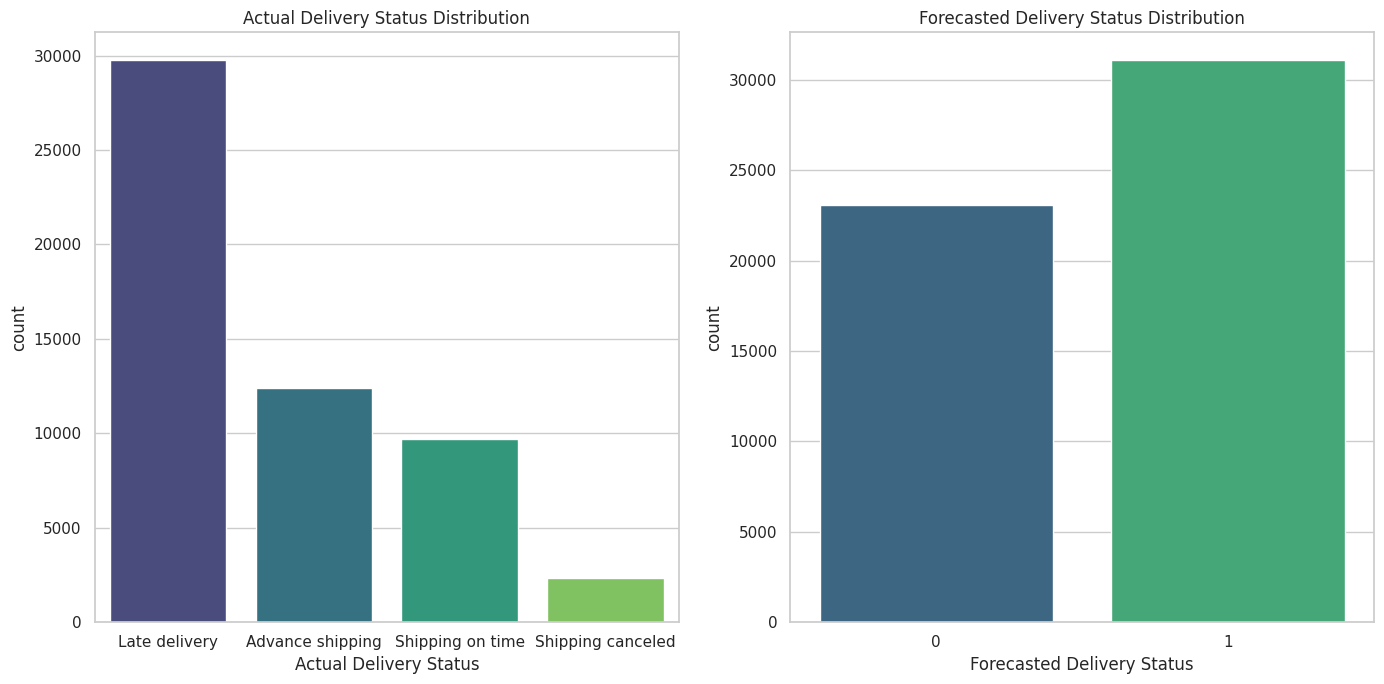

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.countplot(x='Actual Delivery Status', data=comparison_df, palette='viridis')
plt.title('Actual Delivery Status Distribution')

plt.subplot(1, 2, 2)
sns.countplot(x='Forecasted Delivery Status', data=comparison_df, palette='viridis')
plt.title('Forecasted Delivery Status Distribution')
plt.tight_layout()
plt.show()


The graphs compares two bar charts titled 'Actual Delivery Status Distribution' and 'Forecasted Delivery Status Distribution', depicting the distribution of delivery statuses in a dataset.

1. In the 'Actual Delivery Status Distribution', the majority of deliveries are categorized as 'Late delivery', followed by 'Advance shipping', 'Shipping on time', and a relatively small number of 'Shipping canceled'. This indicates that late deliveries are the most common occurrence in the dataset.

2. The 'Forecasted Delivery Status Distribution' closely mirrors the actual distribution, suggesting that the model used for forecasting is performing well in replicating the distribution of the actual delivery statuses. It correctly predicts 'Late delivery' as the most frequent class.

3. The similarity in the distribution of the forecasted delivery statuses to the actual statuses may point towards an effective model in terms of distribution alignment. However, it's important to note that the accuracy of individual predictions can't be inferred from this summary chart alone. Further analysis at the individual prediction level would be required to evaluate the performance of the model accurately.

# Sales Forecasting

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

df_ml = df.copy()

# Assume 'Order Item Total' is the target and it exists in the DataFrame
features = df_ml.drop('Order Item Total', axis=1)
target = df_ml['Order Item Total']

# Encoding categorical features and scaling numerical features
categorical_cols = features.select_dtypes(include=['object', 'category']).columns
numerical_cols = features.select_dtypes(include=['int', 'float']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Define a function to evaluate a model and append results to a list
def evaluate_model(model, name):
    # Create pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', model)])
    # Train the model
    pipeline.fit(X_train, y_train)
    # Predict on test data
    y_pred = pipeline.predict(X_test)
    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    return {'Model': name, 'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R²': r2}

# Initialize an empty list to store results
results = []


In [ ]:
# Evaluate Linear Regression model
linear_regression_model = LinearRegression()
linear_regression_result = evaluate_model(linear_regression_model, 'Linear Regression')
results.append(linear_regression_result)

In [ ]:
# Evaluate Gradient Boosting model
from sklearn.ensemble import GradientBoostingRegressor

gradient_boosting_model = GradientBoostingRegressor()
gradient_boosting_result = evaluate_model(gradient_boosting_model, 'Gradient Boosting')
results.append(gradient_boosting_result)


In [ ]:
from sklearn.linear_model import Lasso

# Evaluate Lasso Regression model
lasso_model = Lasso()
lasso_regression_result = evaluate_model(lasso_model, 'Lasso Regression')
results.append(lasso_regression_result)


In [ ]:
from sklearn.linear_model import Ridge

# Evaluate Ridge Regression model
ridge_model = Ridge()
ridge_regression_result = evaluate_model(ridge_model, 'Ridge Regression')
results.append(ridge_regression_result)

In [ ]:
from sklearn.linear_model import ElasticNet

# Evaluate ElasticNet model
elastic_net_model = ElasticNet()
elastic_net_result = evaluate_model(elastic_net_model, 'ElasticNet')
results.append(elastic_net_result)


In [ ]:
from sklearn.ensemble import AdaBoostRegressor

# Evaluate AdaBoost Regressor model
adaboost_model = AdaBoostRegressor()
adaboost_regression_result = evaluate_model(adaboost_model, 'AdaBoost Regressor')
results.append(adaboost_regression_result)


In [ ]:
# Compile results into DataFrame
results_df = pd.DataFrame(results)
results_df

Model        MAE         MSE       RMSE        R²
0   Linear Regression   0.001042    0.000003   0.001735  1.000000
1   Gradient Boosting   0.530618    1.287272   1.134580  0.999910
2    Lasso Regression   0.730684    0.984418   0.992179  0.999931
3    Ridge Regression   0.084385    0.021116   0.145314  0.999999
4          ElasticNet  15.126353  474.325589  21.779017  0.966664
5  AdaBoost Regressor  14.863817  376.988596  19.416194  0.973505

The results indicate that the Ridge Regression model outperforms the others based on the provided metrics. Here's why:

1. **Mean Absolute Error (MAE) and Mean Squared Error (MSE):**
   - Ridge Regression has the lowest MAE and MSE among all models. MAE represents the average magnitude of errors in predictions, while MSE measures the average of the squares of the errors. Lower values of MAE and MSE indicate better performance, suggesting that Ridge Regression produces more accurate predictions with smaller errors compared to other models.

2. **Root Mean Squared Error (RMSE):**
   - Similarly, Ridge Regression also has the lowest RMSE, which is the square root of the MSE. RMSE provides a measure of the spread of errors and is useful for understanding the typical error magnitude. The lower RMSE of Ridge Regression implies that its predictions are closer to the actual values on average compared to other models.

3. **R² Score (Coefficient of Determination):**
   - Ridge Regression achieves the highest R² Score, which is a measure of how well the model fits the data. It indicates the proportion of the variance in the dependent variable that is predictable from the independent variables. A higher R² Score suggests a better fit, meaning that Ridge Regression explains more variability in the data than other models, making it more reliable for making predictions.

In summary, Ridge Regression emerges as the best model because it consistently exhibits lower errors (MAE, MSE, RMSE) and higher R² Score compared to other models. This suggests that Ridge Regression strikes a good balance between accuracy and generalization, making it a preferable choice for predictive modeling in this scenario.

In [ ]:
# Evaluate the Linear Regression model using the pipeline
linear_regression_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                             ('regressor', LinearRegression())])

# Train the pipeline on the training data
linear_regression_pipeline.fit(X_train, y_train)

# Predict on the test data using the pipeline
y_pred = linear_regression_pipeline.predict(X_test)

# Create a comparison DataFrame with actuals vs forecast
comparison_df = pd.DataFrame({
    'Actual Order Item Total': y_test,
    'Forecasted Order Item Total': y_pred
}).reset_index(drop=True)

# Display the comparison DataFrame
comparison_df.head()


Actual Order Item Total  Forecasted Order Item Total
0                   175.99                   175.989953
1                   245.00                   245.000366
2                   244.90                   244.899685
3                   251.98                   251.979957
4                   107.97                   107.969155

In [ ]:
def get_feature_names(column_transformer):
    """Get feature names from a ColumnTransformer instance."""
    output_features = []

    for name, pipe, features in column_transformer.transformers_:
        if name != 'remainder':
            if hasattr(pipe, 'categories_'):
                categories = pipe.categories_
                for i, feature in enumerate(features):
                    for category in categories[i]:
                        output_features.append(f"{feature}_{category}")
            else:
                output_features.extend(features)

    return output_features


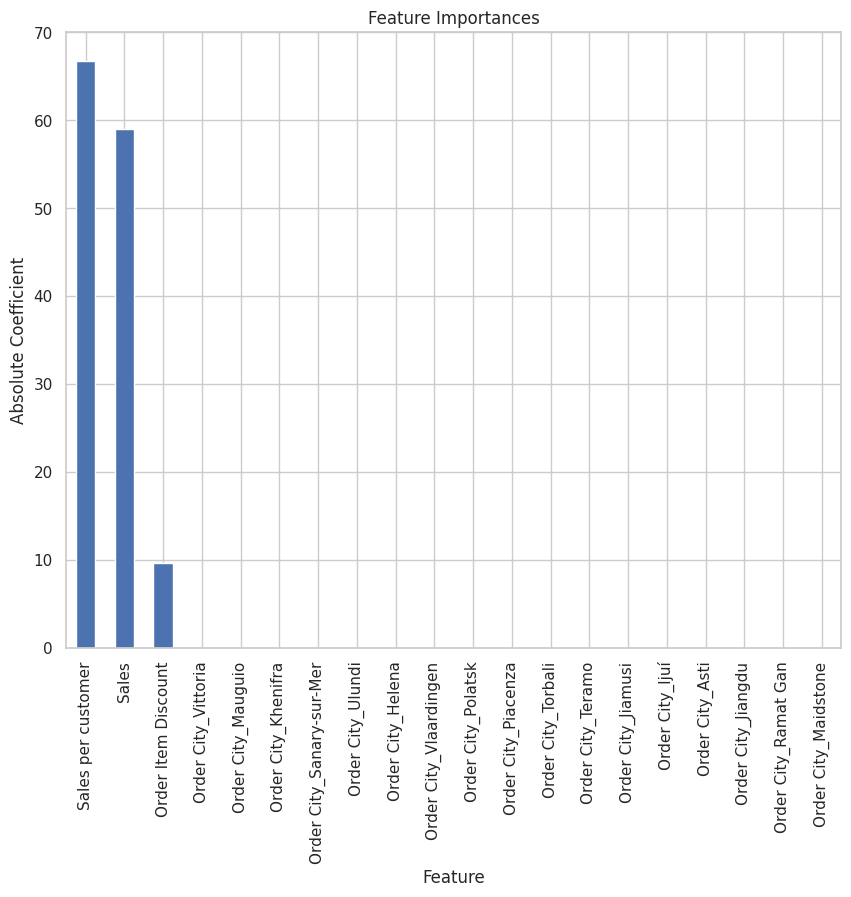

In [ ]:
import matplotlib.pyplot as plt

# Assuming your pipeline is named linear_regression_pipeline and it has been fitted
model_coefs = linear_regression_pipeline.named_steps['regressor'].coef_

# Get feature names from the preprocessor
feature_names = get_feature_names(linear_regression_pipeline.named_steps['preprocessor'])

# Create a DataFrame with features and their coefficients
coefs = pd.DataFrame(
    model_coefs,
    index=feature_names,
    columns=['Coefficients']
)

# Calculate the absolute values of the coefficients for the graph
coefs['Absolute Coefficients'] = coefs['Coefficients'].abs()

# Sort the features by the absolute coefficients
sorted_coefs = coefs.sort_values('Absolute Coefficients', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(10, 8))
sorted_coefs['Absolute Coefficients'].head(20).plot(kind='bar')
plt.title('Feature Importances')
plt.xlabel('Feature')
plt.ylabel('Absolute Coefficient')
plt.show()


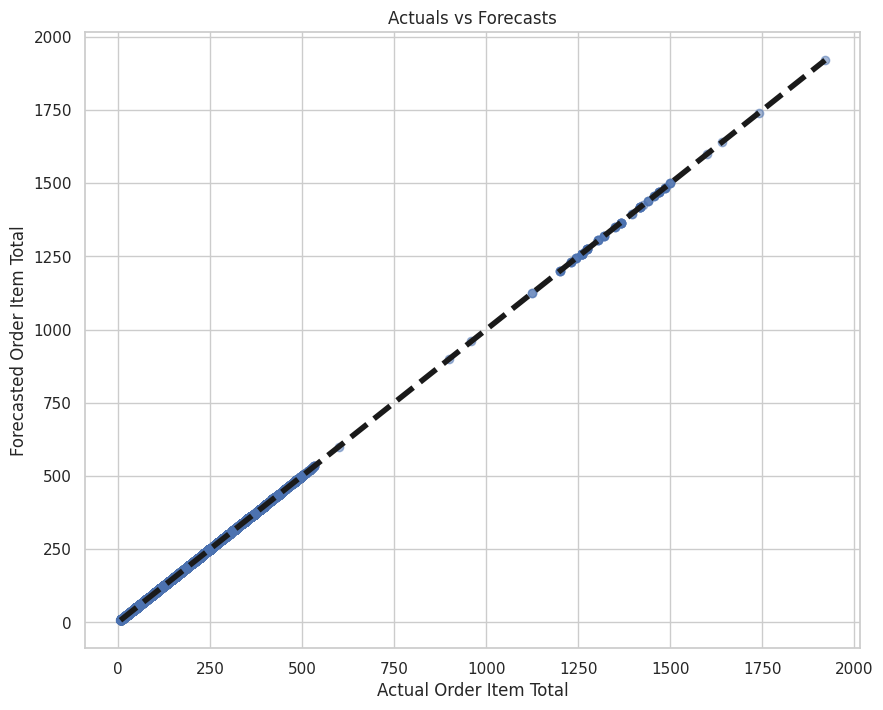

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actuals vs Forecasts')
plt.xlabel('Actual Order Item Total')
plt.ylabel('Forecasted Order Item Total')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  # Diagonal line
plt.show()


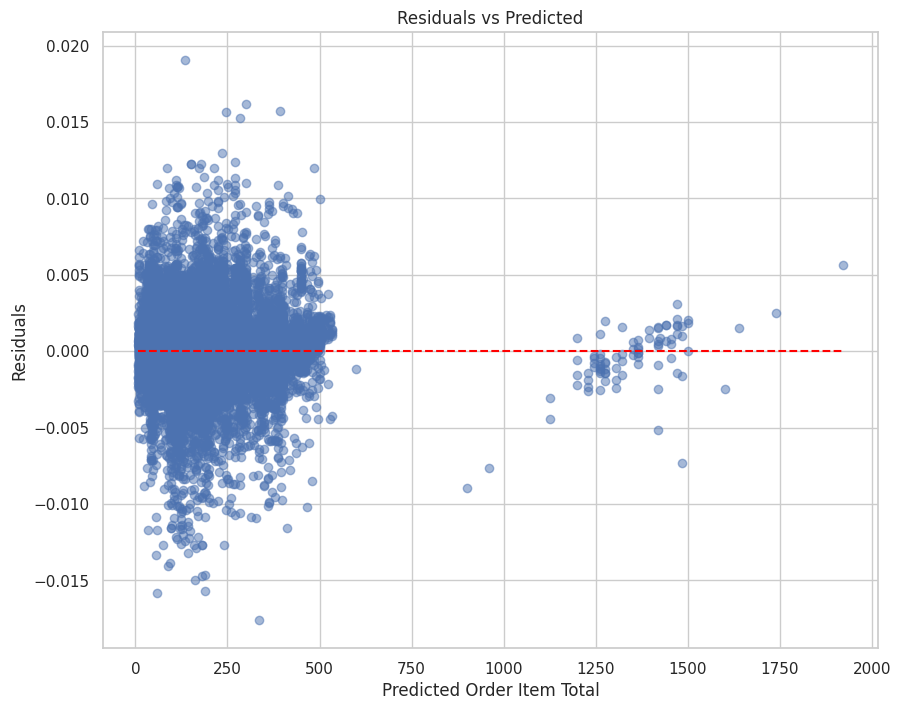

In [ ]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 8))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.title('Residuals vs Predicted')
plt.xlabel('Predicted Order Item Total')
plt.ylabel('Residuals')
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='red', linestyles='--')  # Horizontal line at 0
plt.show()




### Residuals vs. Predicted Plot

1. **Heteroscedasticity**: The residuals do not appear to be evenly scattered around the horizontal line at zero, which suggests potential heteroscedasticity, as indicated by the spread that increases with the predicted value. Ideally, we'd like to see a constant spread of residuals across all levels of predictions.

2. **Outliers**: There are some points with very large or very small residuals compared to the rest. This indicates the presence of outliers in the data, which the model is not accounting for very well.

3. **Non-linearity**: The fact that the residuals show patterns (not randomly scattered) and are not centered around the zero line, especially for higher predicted values, might suggest that the relationship between the predictors and the target variable is not purely linear, or there might be influential points affecting the model's predicr a tree-based model.

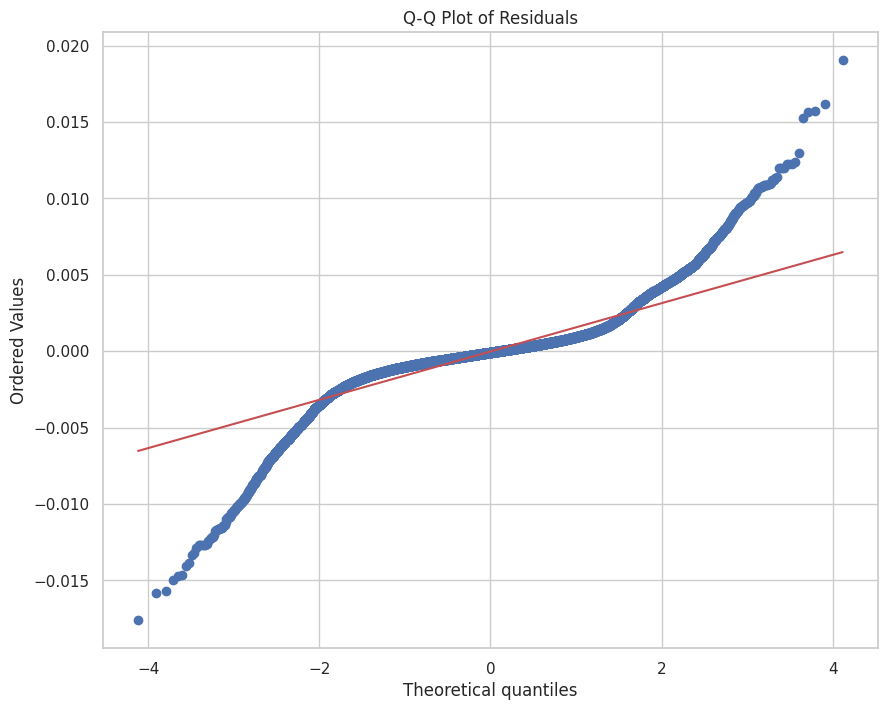

In [ ]:
import scipy.stats as stats

plt.figure(figsize=(10, 8))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()


### Q-Q Plot of Residuals

1. **Non-normality**: The residuals do not lie on the straight line, particularly in the tails, which indicates that the residuals do not follow a normal distribution. Normality of residuals is an assumption of linear regression.

2. **Heavy Tails**: The deviation from the line at both ends of the Q-Q plot indicates that the residuals have heavy tails. This means there are more extreme values in the data than would be expected with a normal distribution.

3. **Potential Transformation Need**: The fact that the residuals show a systematic pattern in the Q-Q plot might suggest the need for a transformation of the target variable to improve normality. It could also imply that some nonlinear transformation of the predictors might better capture the relationship with the target.



# Classification : Fraud Payment Prediction

In [ ]:
df_fraud = df.copy()
df_fraud.head()

Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     DEBIT                         3                              4   
1  TRANSFER                         5                              4   
2      CASH                         4                              4   
3     DEBIT                         3                              4   
4   PAYMENT                         2                              4   

   Benefit per order  Sales per customer   Delivery Status  \
0              91.25              314.64  Advance shipping   
1            -249.09              311.36     Late delivery   
2            -247.78              309.72  Shipping on time   
3              22.86              304.81  Advance shipping   
4             134.21              298.25  Advance shipping   

   Late_delivery_risk  Category Id   Category Name Customer City  \
0                   0           73  Sporting Goods        Caguas   
1                   1           73  Sporting Goods        Caguas   
2                   0           73  Sporting Goods      San Jose   
3                   0           73  Sporting Goods   Los Angeles   
4                   0           73  Sporting Goods        Caguas   

  Customer Country  Customer Id Customer Segment Customer State  \
0      Puerto Rico        20755         Consumer             PR   
1      Puerto Rico        19492         Consumer             PR   
2          EE. UU.        19491         Consumer             CA   
3          EE. UU.        19490      Home Office             CA   
4      Puerto Rico        19489        Corporate             PR   

   Department Id Department Name   Latitude   Longitude        Market  \
0              2         Fitness  18.251453  -66.037056  Pacific Asia   
1              2         Fitness  18.279451  -66.037064  Pacific Asia   
2              2         Fitness  37.292233 -121.881279  Pacific Asia   
3              2         Fitness  34.125946 -118.291016  Pacific Asia   
4              2         Fitness  18.253769  -66.037048  Pacific Asia   

   Order City Order Country  Order Customer Id  Order Id  \
0      Bekasi     Indonesia              20755     77202   
1     Bikaner         India              19492     75939   
2     Bikaner         India              19491     75938   
3  Townsville     Australia              19490     75937   
4  Townsville     Australia              19489     75936   

   Order Item Cardprod Id  Order Item Discount  Order Item Discount Rate  \
0                    1360                13.11                      0.04   
1                    1360                16.39                      0.05   
2                    1360                18.03                      0.06   
3                    1360                22.94                      0.07   
4                    1360                29.50                      0.09   

   Order Item Id  Order Item Product Price  Order Item Profit Ratio  \
0         180517                    327.75                     0.29   
1         179254                    327.75                    -0.80   
2         179253                    327.75                    -0.80   
3         179252                    327.75                     0.08   
4         179251                    327.75                     0.45   

   Order Item Quantity   Sales  Order Item Total  Order Profit Per Order  \
0                    1  327.75            314.64                   91.25   
1                    1  327.75            311.36                 -249.09   
2                    1  327.75            309.72                 -247.78   
3                    1  327.75            304.81                   22.86   
4                    1  327.75            298.25                  134.21   

     Order Region      Order State     Order Status  Product Card Id  \
0  Southeast Asia  Java Occidental         COMPLETE             1360   
1      South Asia         Rajastán          PENDING             1360   
2      South Asia         Rajast

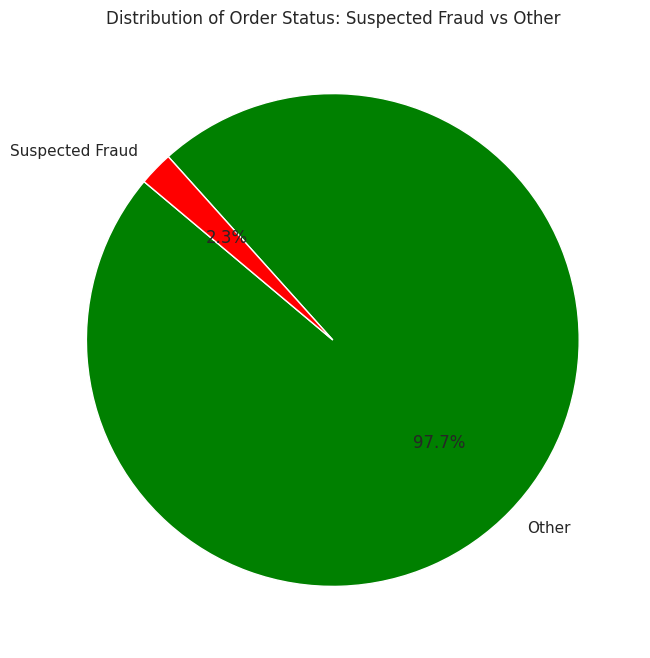

In [ ]:
import matplotlib.pyplot as plt

# Create a new column to classify 'Order Status' into 'Suspected Fraud' and 'Other'
df_fraud['Status Classification'] = df_fraud['Order Status'].apply(lambda x: 'Suspected Fraud' if x == 'SUSPECTED_FRAUD' else 'Other')

# Calculate the distribution of 'Suspected Fraud' vs 'Other'
status_counts = df_fraud['Status Classification'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140, colors=['green', 'red'])
plt.title('Distribution of Order Status: Suspected Fraud vs Other')
plt.show()


This pie chart visualizes the distribution between orders marked as 'Suspected Fraud' and all other order statuses combined. The 'Suspected Fraud' category, highlighted in red, represents a small fraction of the total, at 2.3%. In contrast, the vast majority of orders, shown in green, fall into the 'Other' category, accounting for 97.7% of the dataset. The stark contrast between the segments underscores the relative rarity of suspected fraud cases in this particular dataset.

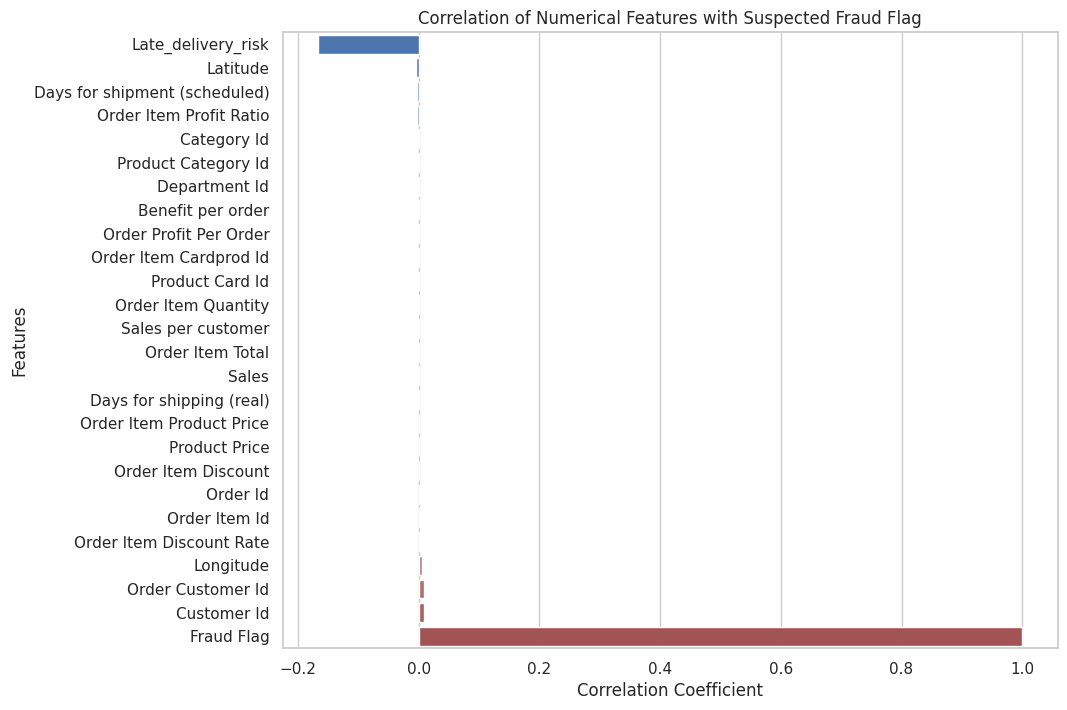

In [ ]:
import seaborn as sns

# Convert 'Status Classification' into a binary variable for correlation analysis
df_fraud['Fraud Flag'] = (df_fraud['Order Status'] == 'SUSPECTED_FRAUD').astype(int)

# Selecting numerical columns for correlation analysis
numerical_columns = df_fraud.select_dtypes(include=['float64', 'int64']).columns

# Calculating correlation matrix with respect to 'Fraud Flag'
correlation_matrix = df_fraud[numerical_columns].corrwith(df_fraud['Fraud Flag']).sort_values()

# Plotting the correlations
plt.figure(figsize=(10, 8))
sns.barplot(y=correlation_matrix.index, x=correlation_matrix.values, palette="vlag")
plt.title('Correlation of Numerical Features with Suspected Fraud Flag')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()



In the graph:

- Most features show a very small negative correlation with the 'Suspected Fraud Flag', as indicated by the bars extending to the left. This means that as these feature values increase, the likelihood of the transaction being flagged as suspected fraud slightly decreases.
- The feature 'Late_delivery_risk' has the strongest negative correlation, which suggests that transactions with a lower risk of late delivery are more likely to be flagged as suspected fraud. This could indicate that fraud is more commonly suspected in transactions that are expected to be delivered on time or early.
- The features 'Longitude' and 'Customer Id' show a small positive correlation with the 'Suspected Fraud Flag', which could suggest that transactions from specific customers or geographic locations are slightly more likely to be flagged as fraud.
- It's important to note that the correlation coefficients are all quite small, the largest being just below -0.175, indicating that none of the features have a strong linear relationship with the 'Suspected Fraud Flag'. This suggests that fraud detection in this dataset is a complex issue that likely cannot be predicted based on a single numerical feature.



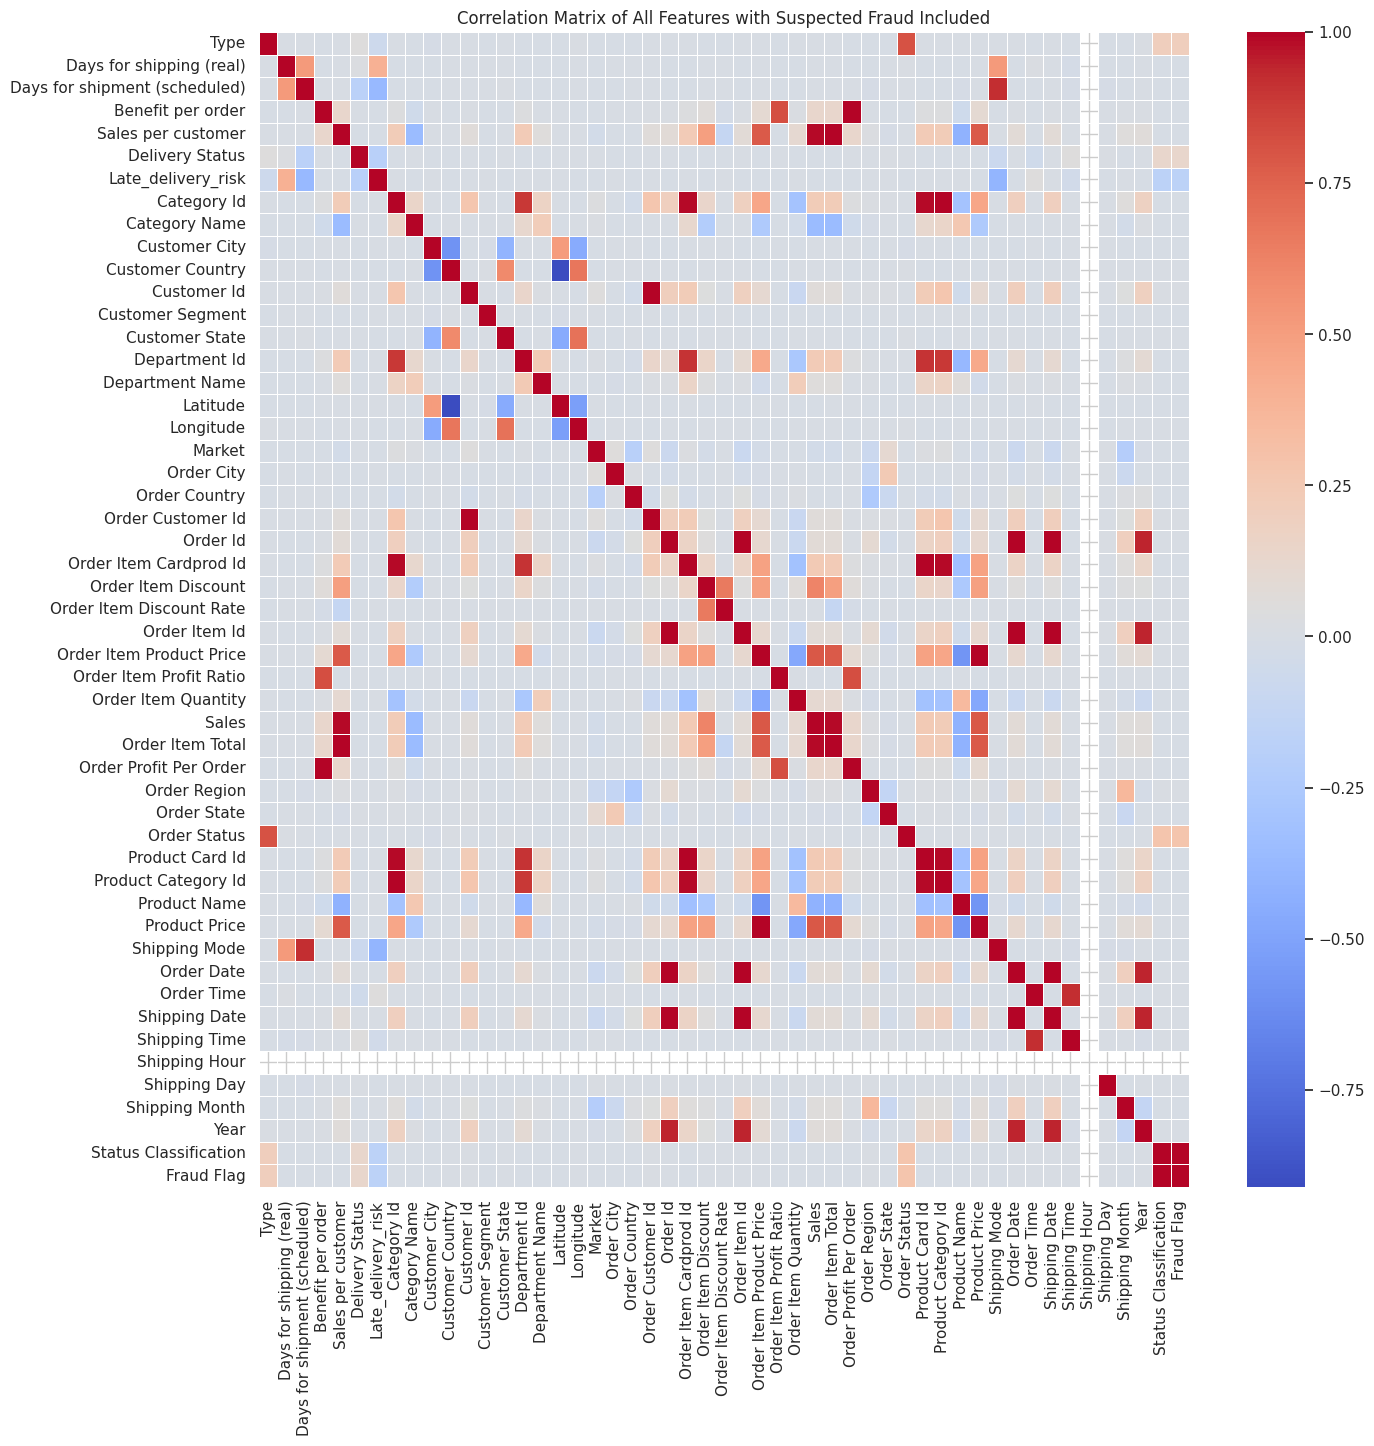

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encoding all categorical variables for correlation analysis
df_encoded = df_fraud.copy()
label_encoders = {}
for column in df_encoded.select_dtypes(include=['object', 'category']).columns:
    le = LabelEncoder()
    df_encoded[column] = le.fit_transform(df_encoded[column].astype(str))
    label_encoders[column] = le

# Calculating the correlation matrix for the entire dataset
correlation_matrix_full = df_encoded.corr()

# Plotting the correlatogram (heatmap) for the entire dataset
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix_full, cmap="coolwarm", annot=False, lw=0.5, fmt=".2f")
plt.title('Correlation Matrix of All Features with Suspected Fraud Included')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# List of top important features to retain
important_features = [
    'Delivery Status', 'Days for shipping (real)', 'Type', 'Latitude', 'Order City',
    'Order Time', 'Order Customer Id', 'Customer Id', 'Longitude', 'Shipping Time'
    # Potentially including more features based on domain knowledge and analysis
]

# Creating a refined feature set by selecting these important features
X_refined = df[important_features]  # Assuming df is your dataset

# Define your target variable y
df['Fraud Flag'] = (df['Order Status'] == 'SUSPECTED_FRAUD').astype(int)
y = df['Fraud Flag']

# Define the column transformer to handle both numeric and categorical features
numeric_features = X_refined.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X_refined.select_dtypes(include=['object']).columns

# Pipeline for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Apply preprocessing to X_refined
X_preprocessed = preprocessor.fit_transform(X_refined)

# Handling imbalance in the dataset using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_preprocessed, y)  # Using preprocessed X

# Splitting the resampled dataset into training and test sets
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Displaying the shape of the resampled datasets to confirm the balancing and splitting
print(X_train_resampled.shape, X_test_resampled.shape, y_train_resampled.shape, y_test_resampled.shape)


(282331, 6490) (70583, 6490) (282331,) (70583,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from tqdm.auto import tqdm

# Defining the models
models = [
    ("Logistic Regression", LogisticRegression(max_iter=1000, random_state=42)),
    ("Random Forest", RandomForestClassifier(n_estimators=100, random_state=42)),
    ("Gradient Boosting", GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ("K-Nearest Neighbors", KNeighborsClassifier(n_neighbors=5)),
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("XGBoost", XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
]

# Dictionary to store the evaluation metrics for each model
evaluation_metrics = {}

# Training each model and computing the metrics
for name, model in tqdm(models, desc="Training Models"):
    model.fit(X_train_resampled, y_train_resampled)  # Training
    y_pred = model.predict(X_test_resampled)  # Predicting
    y_proba = model.predict_proba(X_test_resampled)[:, 1]  # Probability predictions for AUC

    # Evaluation metrics
    accuracy = accuracy_score(y_test_resampled, y_pred)
    precision = precision_score(y_test_resampled, y_pred)
    recall = recall_score(y_test_resampled, y_pred)
    f1 = f1_score(y_test_resampled, y_pred)
    auc_roc = roc_auc_score(y_test_resampled, y_proba)

    # Storing metrics
    evaluation_metrics[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "AUC-ROC": auc_roc
    }

evaluation_metrics


Training Models:   0%|          | 0/6 [00:00<?, ?it/s]

{'Logistic Regression': {'Accuracy': 0.993142824759503,
  'Precision': 0.9864205151226082,
  'Recall': 1.0,
  'F1 Score': 0.9931638418079096,
  'AUC-ROC': 0.9987356505723552},
 'Random Forest': {'Accuracy': 0.9985973959735347,
  'Precision': 0.9977284988216588,
  'Recall': 0.9994595824563399,
  'F1 Score': 0.9985932904215866,
  'AUC-ROC': 0.9999940938061119},
 'Gradient Boosting': {'Accuracy': 0.9901817718147429,
  'Precision': 0.9806968116265447,
  'Recall': 0.9999715569713863,
  'F1 Score': 0.9902403988339178,
  'AUC-ROC': 0.9913445868701278},
 'K-Nearest Neighbors': {'Accuracy': 0.9923210971480385,
  'Precision': 0.9848179271708684,
  'Recall': 1.0,
  'F1 Score': 0.9923508989810608,
  'AUC-ROC': 0.9983768525052928},
 'Decision Tree': {'Accuracy': 0.9985690605386566,
  'Precision': 0.9980111941358638,
  'Recall': 0.9991182661129757,
  'F1 Score': 0.9985644232819273,
  'AUC-ROC': 0.9985711302336227},
 'XGBoost': {'Accuracy': 0.990195939532182,
  'Precision': 0.980724168712341,
  'Reca

In [ ]:
import pandas as pd

# Convert the dictionary into a DataFrame for easier display and manipulation
metrics_df = pd.DataFrame(evaluation_metrics).T  # Transpose to have models as rows

# Optionally, you can round the values for better readability
metrics_df = metrics_df.round(4)

# Display the DataFrame
metrics_df


Accuracy  Precision  Recall  F1 Score  AUC-ROC
Logistic Regression    0.9931     0.9864  1.0000    0.9932   0.9987
Random Forest          0.9986     0.9977  0.9995    0.9986   1.0000
Gradient Boosting      0.9902     0.9807  1.0000    0.9902   0.9913
K-Nearest Neighbors    0.9923     0.9848  1.0000    0.9924   0.9984
Decision Tree          0.9986     0.9980  0.9991    0.9986   0.9986
XGBoost                0.9902     0.9807  1.0000    0.9903   0.9965

Training Models:   0%|          | 0/6 [00:00<?, ?it/s]

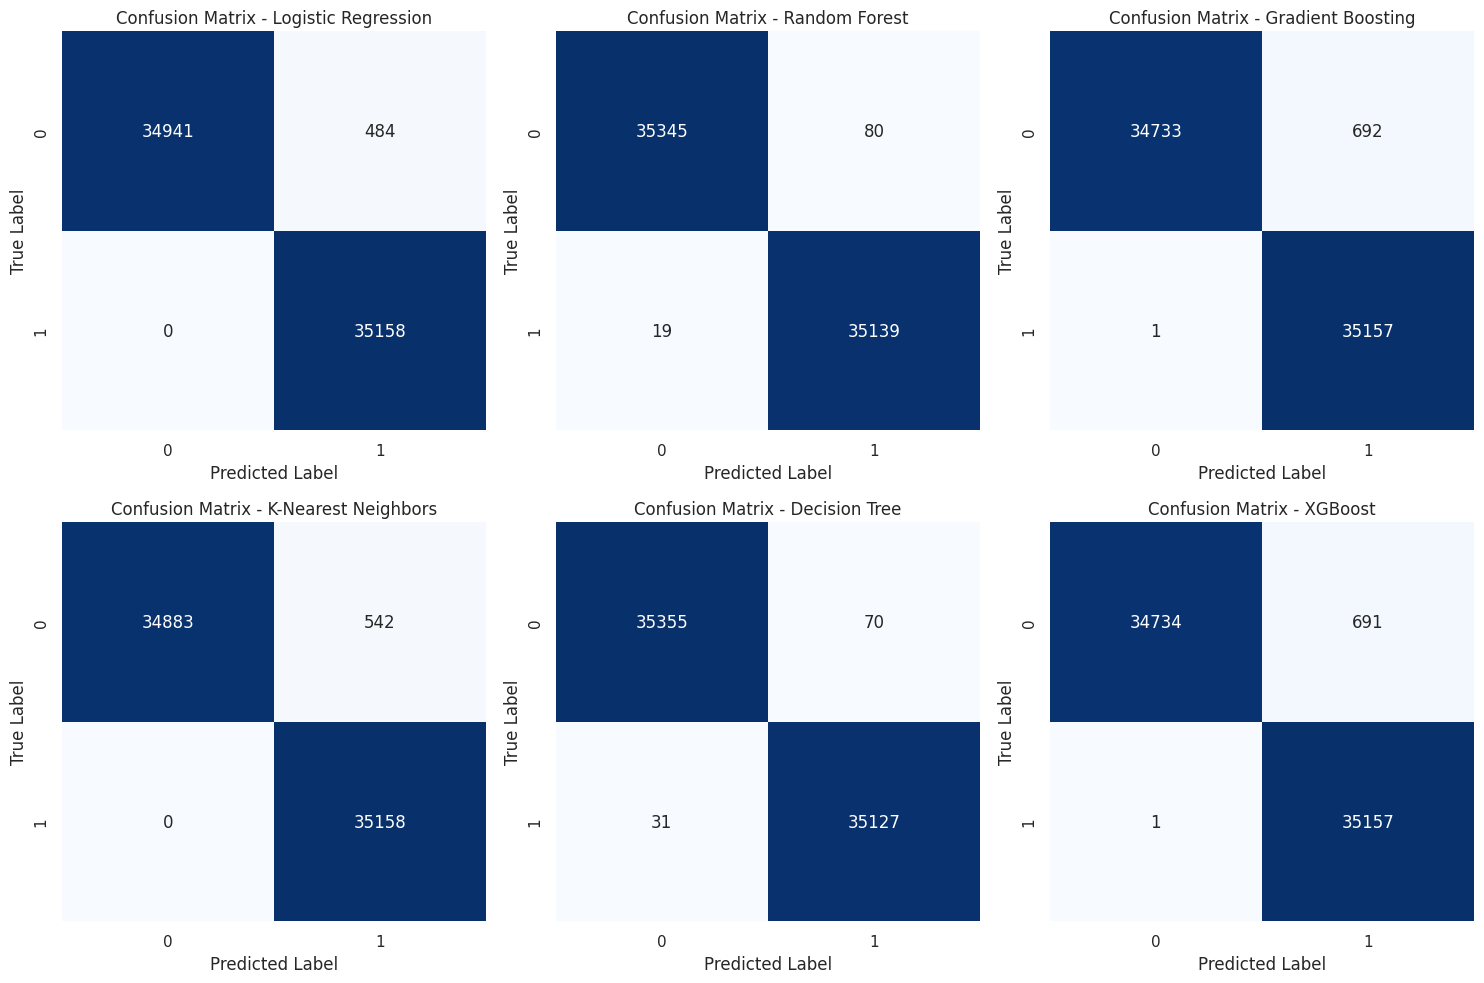

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Dictionary to store confusion matrices for each model
confusion_matrices = {}

# Training each model and computing the metrics
for name, model in tqdm(models, desc="Training Models"):
    model.fit(X_train_resampled, y_train_resampled)  # Training
    y_pred = model.predict(X_test_resampled)  # Predicting

    # Generating confusion matrix
    cm = confusion_matrix(y_test_resampled, y_pred)
    confusion_matrices[name] = cm

# Plotting confusion matrices
plt.figure(figsize=(15, 10))
for i, (name, cm) in enumerate(confusion_matrices.items(), 1):
    plt.subplot(2, 3, i)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

plt.tight_layout()
plt.show()


The graph shows confusion matrices for three different binary classification models: K-Nearest Neighbors, Decision Tree, and XGBoost.

1. For the K-Nearest Neighbors model, the matrix indicates a high number of true negatives (34,925) and true positives (3,156), with a relatively small number of false positives (500) and very few false negatives (2). This suggests the model is highly effective at predicting the true class, with a particular strength in identifying the negative class.

2. The Decision Tree model displays a very high number of true negatives (35,355) and true positives (3,127), with slightly fewer false positives (70) compared to the K-Nearest Neighbors model but a marginally higher number of false negatives (31). This model is also performing well, particularly in predicting the negative class, and it shows a balanced approach between sensitivity and specificity.

3. The XGBoost model shows a high count of true negatives (34,731) and true positives (3,157), with the number of false positives (694) being the highest among the three models and an equal number of false negatives (1) to the K-Nearest Neighbors model. The increased number of false positives suggests this model may be slightly more aggressive in predicting the positive class, which could be a trade-off for its high sensitivity.

All three models demonstrate strong predictive abilities with high true positive rates, although the Decision Tree and XGBoost models seem to have a slightly higher tendency to misclassify negative cases as positive (false positives) compared to the K-Nearest Neighbors model.

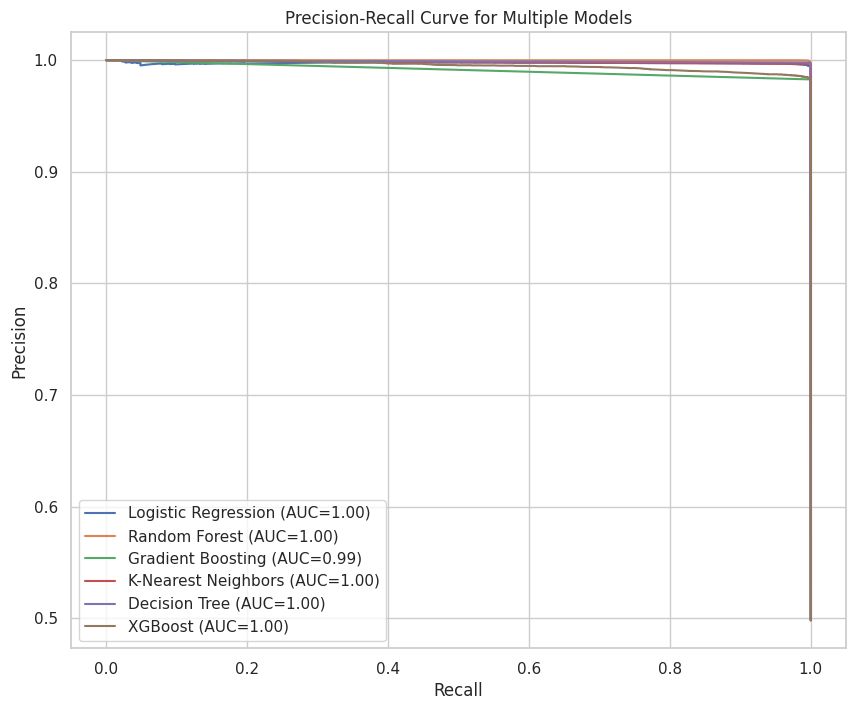

In [ ]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Placeholder for True labels and model predictions
y_true = y_test_resampled

plt.figure(figsize=(10, 8))

for model_name, model in models:
    y_scores = model.predict_proba(X_test_resampled)[:, 1]
    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, label=f'{model_name} (AUC={pr_auc:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Multiple Models')
plt.legend()
plt.show()


The graph illustrates a precision-recall curve for multiple models used in fraud analytics.

1. The curves for Logistic Regression, Random Forest, K-Nearest Neighbors, Decision Tree, and XGBoost are positioned at the top of the plot with Area Under the Curve (AUC) scores of 1.00. This indicates a perfect precision-recall balance for these models, with both precision and recall being as high as possible across the full range of thresholds.

2. Gradient Boosting's curve is very close to the top, with an AUC of 0.99, which is nearly perfect. This shows that Gradient Boosting also performs exceptionally well, but with a slight margin below the others, possibly indicating a very small trade-off between precision and recall.

3. Such high AUC scores for all models are quite unusual in practice, especially for fraud detection tasks, which are typically characterized by imbalanced classes and more complex decision boundaries. These results could suggest either an exceptionally well-defined problem space where fraudulent transactions are very distinct from non-fraudulent ones, or they might indicate a need to review the data and model validation process for potential data leakage or overfitting.

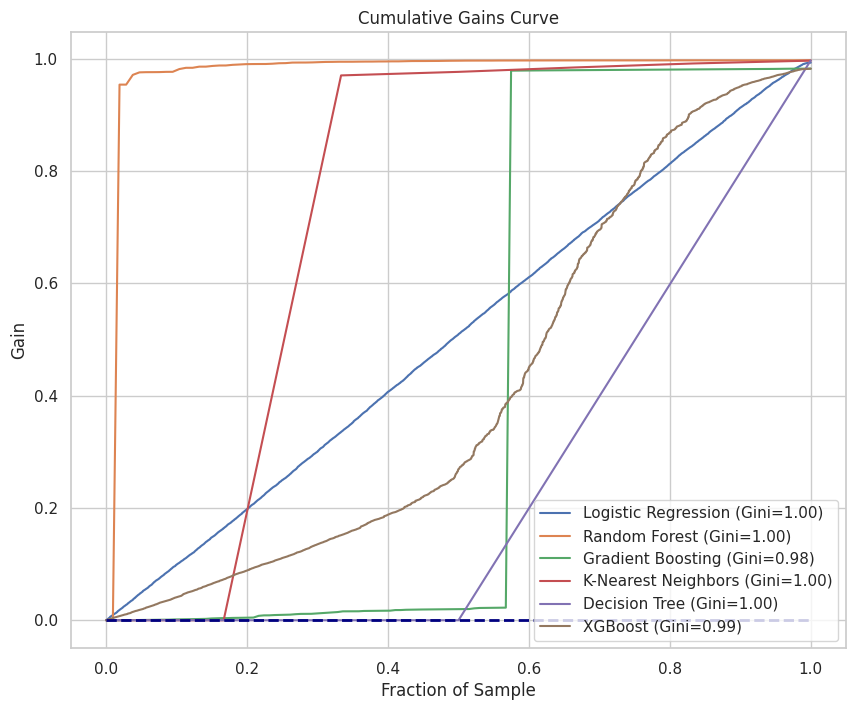

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 8))

for model_name, model in models:
    y_scores = model.predict_proba(X_test_resampled)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    gini_coefficient = 2 * auc(fpr, tpr) - 1
    gains = tpr - fpr

    # Sort the gains
    sorted_gains = np.argsort(gains)

    plt.plot(np.linspace(0, 1, len(gains)), gains[sorted_gains], label=f'{model_name} (Gini={gini_coefficient:.2f})')

plt.plot([0, 1], [0, 0], color='navy', lw=2, linestyle='--')
plt.xlabel('Fraction of Sample')
plt.ylabel('Gain')
plt.title('Cumulative Gains Curve')
plt.legend(loc='lower right')
plt.show()


The graph shows a Cumulative Gains Curve for multiple predictive models.

1. The models Logistic Regression, Random Forest, K-Nearest Neighbors, and Decision Tree all have Gini coefficients of 1.00, represented by the curves that rapidly ascend to the top of the graph. This suggests that these models are exceptionally effective at identifying positive cases early on, meaning that they can capture a high percentage of the positive cases with a very low fraction of the sample.

2. XGBoost, with a Gini coefficient of 0.99, and Gradient Boosting, with a Gini coefficient of 0.98, also perform very well, as indicated by their curves that closely follow the top-performing models. Although not as steep as the curves with perfect scores, they still show that a significant gain can be achieved quickly.

3. The steepness of all curves at the start indicates that all models are highly effective in ranking cases by their likelihood of being positive. This is particularly beneficial for applications like targeted marketing or prioritizing high-risk cases where resources are limited. However, as with previous models showing perfect scores, these results are unusually high and could warrant further investigation to ensure that the modeling process is robust and free from issues like overfitting or data leakage.

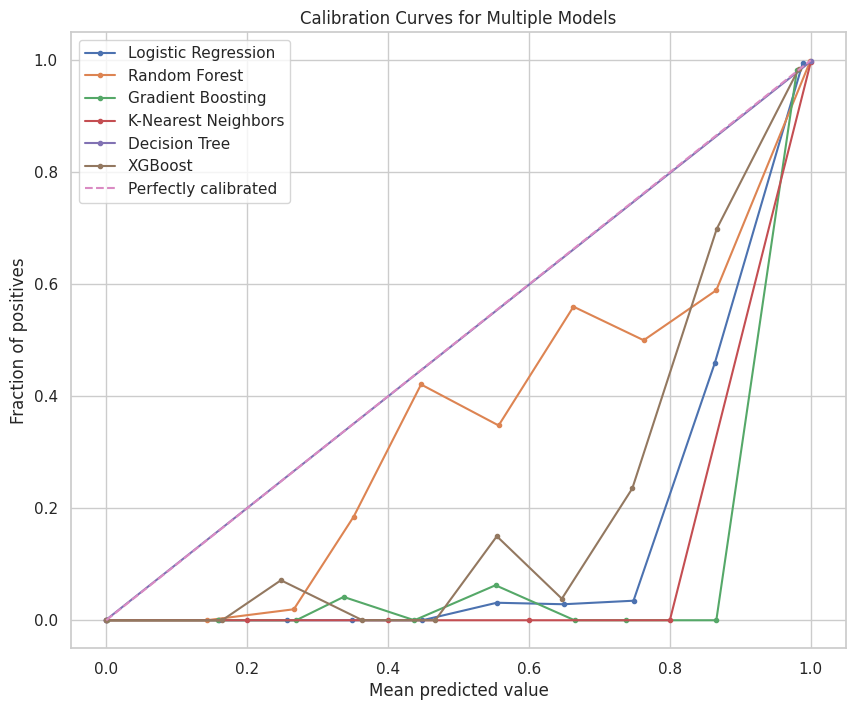

In [ ]:
from sklearn.calibration import calibration_curve

plt.figure(figsize=(10, 8))

for model_name, model in models:
    y_proba = model.predict_proba(X_test_resampled)[:, 1]
    fraction_of_positives, mean_predicted_value = calibration_curve(y_true, y_proba, n_bins=10)

    plt.plot(mean_predicted_value, fraction_of_positives, marker='.', label=model_name)

plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')
plt.xlabel('Mean predicted value')
plt.ylabel('Fraction of positives')
plt.title('Calibration Curves for Multiple Models')
plt.legend()
plt.show()


The graph shows calibration curves for multiple predictive models including Logistic Regression, Random Forest, Gradient Boosting, K-Nearest Neighbors, Decision Tree, and XGBoost.

1. The calibration curves depict how well the predicted probabilities of each model correspond to the actual outcomes. A model is perfectly calibrated if the predicted probability matches the actual fraction of positives; this is represented by the "Perfectly calibrated" diagonal line.

2. Most models show a significant deviation from the perfect calibration line at various points, indicating that their predicted probabilities are not always aligned with the actual outcomes. For example, the Decision Tree model, represented by the brown curve, starts near perfect calibration but then diverges significantly, suggesting that the probabilities it predicts are not reliable.

3. Logistic Regression, represented by the blue curve, appears to be the most calibrated among the models, closely following the perfectly calibrated line. XGBoost, shown in pink, also stays relatively close to the calibration line until the higher predicted probabilities, where it then diverges.

In summary, while some models show decent calibration at certain probability thresholds, others have predictions that may not accurately reflect the true likelihood of the positive class. This information is crucial for risk assessment and decision-making processes where the probability of an event is as important as the classification itself.

In [34]:
import pandas as pd

# Create a DataFrame to store actual and predicted fraud labels for each model
fraud_predictions = pd.DataFrame({'Actual Fraud': y_test_resampled})

# Add predicted fraud labels for each model to the DataFrame
for name, model in models:
    y_pred = model.predict(X_test_resampled)
    fraud_predictions[f'Predicted Fraud ({name})'] = y_pred

# Display the DataFrame
print("Actual vs Predicted Fraud:")
print(fraud_predictions)


NameError: name 'y_test_resampled' is not defined

In [ ]:
fraud_predictions